# Feature Engineering Notebook

## Introduction

In this notebook, we will focus on some **Feature Engineering**, an essential step in preparing our dataset for model training. The goal of feature engineering is to enhance the predictive power of our data by transforming it into a format that captures the most important information and relationships.

### Project Goal

The goal of this project is to build a machine learning model that can identify stocks that **outperform the S&P 500 by more than 2%**. By selecting high-performing stocks, we aim to create a portfolio capable of beating the market.

### Key Tasks in Feature Engineering

1. **Principal Component Analysis (PCA)**:
   - We will use PCA to reduce the dimensionality of the dataset. This technique helps in summarizing the most important features and eliminates redundancy by addressing multicollinearity. PCA will ensure that we retain only the most valuable information, which will improve model performance and efficiency.

2. **Clustering**:
   - Clustering will be applied to group stocks based on their similarities. This can help us uncover hidden patterns in the data and create additional features that represent stock groupings. These clusters can provide insights into different stock behaviors and trends.

3. **Target Variable Engineering**:
   - We will create a new target variable that identifies stocks that outperform the S&P 500 by more than 2%. This target will help guide the machine learning model to focus on the stocks that have the highest potential for significant returns.

4. **Next Steps**:
   
Through these steps, we aim to refine our dataset and ensure it is optimized for building a robust machine learning model capable of selecting a portfolio of stocks that outperforms the market.


### Importing Libraries

In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import yfinance as yf

import os

### Load Datasets

In [13]:
# Define the directory and scaling factors
input_dir = './data/cleaned_data/premodeling_data/outliers_data/'
scaling_factor = 2  # You only want scaling factor 2

# Dictionary to store loaded datasets for each year
full_df = {}

# Load datasets from 2000 to 2023 with the specific scaling factor
for year in range(2000, 2024):
    file_path = f'{input_dir}{year}_Capped_outliers_Scaling_{scaling_factor}.csv'
    try:
        # Load the CSV and store in the dictionary using only the year as the key
        df = pd.read_csv(file_path)
        full_df[year] = df
        print(f"Loaded data for {year}")
    except FileNotFoundError:
        print(f"File for {year} not found.")

# Print the head of each loaded dataset
for year, df in full_df.items():
    print(f"\nHead of {year}:")
    display(df.head())

Loaded data for 2000
Loaded data for 2001
Loaded data for 2002
Loaded data for 2003
Loaded data for 2004
Loaded data for 2005
Loaded data for 2006
Loaded data for 2007
Loaded data for 2008
Loaded data for 2009
Loaded data for 2010
Loaded data for 2011
Loaded data for 2012
Loaded data for 2013
Loaded data for 2014
Loaded data for 2015
Loaded data for 2016
Loaded data for 2017
Loaded data for 2018
Loaded data for 2019
Loaded data for 2020
Loaded data for 2021
Loaded data for 2022
Loaded data for 2023

Head of 2000:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0HRJ.L  2000.0            1.756821e+08              114315.0   
1  0HST.L  2000.0            2.700000e+07                   0.0   
2  0JVQ.L  2000.0            1.756821e+08              114315.0   
3  0KXA.L  2000.0            1.756821e+08                   0.0   
4  0LWH.L  2000.0            1.140000e+08                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  245707600.0     387966250.0          88063455.0   
1                   27000000.0     387966250.0          88063455.0   
2                  245707600.0     160985000.0          88063455.0   
3                  190000000.0     387966250.0          88063455.0   
4                  114000000.0     387966250.0          88063455.0   

   totalCurrentAssets  propertyPlantEquipmentNet  goodwill  ...     ipoDate  \
0        1.483007e+09                777669500.0       0.0  ...  2000-01-03   
1        1.168000e+09                777669500.0       0.0  ...  2000-01-03   
2        1.483007e+09                777669500.0       0.0  ...  2000-01-03   
3        1.483007e+09                777669500.0       0.0  ...  2000-01-03   
4        1.483007e+09                777669500.0       0.0  ...  2000-01-03   

   isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  inflationRate  \
0  False   False  False            0.0                 5.12            3.4   
1  False   False  False            0.0                 5.12            3.4   
2  False   False  False            0.0                 5.12            3.4   
3  False   False  False            0.0                 5.12            3.4   
4  False   False  False            0.0                 5.12            3.4   

   unemploymentRate  gdp_growth  class  
0          3.966667    4.077586    0.0  
1          3.966667    4.077586    0.0  
2          3.966667    4.077586    0.0  
3          3.966667    4.077586    0.0  
4          3.966667    4.077586    0.0  

[5 rows x 219 columns]


Head of 2001:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0HRJ.L  2001.0             137000000.0              77603.25   
1  0HST.L  2001.0              24000000.0                  0.00   
2  0JVQ.L  2001.0             204934680.5              77603.25   
3  0KXA.L  2001.0             121000000.0                  0.00   
4  0LWH.L  2001.0             204934680.5                  0.00   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 2.751968e+08     388476411.5          81241500.0   
1                 2.400000e+07     388476411.5          46000000.0   
2                 2.751968e+08     165578000.0          81241500.0   
3                 1.210000e+08     388476411.5          81241500.0   
4                 2.751968e+08     388476411.5          81241500.0   

   totalCurrentAssets  propertyPlantEquipmentNet  goodwill  ...     ipoDate  \
0        1.514585e+09                809529385.0       0.0  ...  2000-01-03   
1        1.221000e+09                809529385.0       0.0  ...  2000-01-03   
2        1.514585e+09                809529385.0       0.0  ...  2000-01-03   
3        1.514585e+09                809529385.0       0.0  ...  2000-01-03   
4        1.514585e+09                809529385.0       0.0  ...  2000-01-03   

   isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  inflationRate  \
0  False   False  False            0.0                 5.07            2.8   
1  False   False  False            0.0                 5.07            2.8   
2  False   False  False            0.0                 5.07            2.8   
3  False   False  False            0.0                 5.07            2.8   
4  False   False  False            0.0                 5.07            2.8   

   unemploymentRate  gdp_growth  class  
0          4.741667    0.955538    1.0  
1          4.741667    0.955538    1.0  
2          4.741667    0.955538    1.0  
3          4.741667    0.955538    1.0  
4          4.741667    0.955538    1.0  

[5 rows x 219 columns]


Head of 2002:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0HRJ.L  2002.0             247027228.0                   0.0   
1  0HST.L  2002.0              21000000.0                   0.0   
2  0JVQ.L  2002.0             247027228.0              480000.0   
3  0KXA.L  2002.0             247027228.0                   0.0   
4  0LWH.L  2002.0             192000000.0                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  264000000.0     370834000.0          72000000.0   
1                   21000000.0     370834000.0          72000000.0   
2                  295806000.0     172000000.0          72000000.0   
3                  289000000.0     370834000.0          72000000.0   
4                  192000000.0     370834000.0          72000000.0   

   totalCurrentAssets  propertyPlantEquipmentNet  goodwill  ...     ipoDate  \
0        1.513862e+09                769725000.0       0.0  ...  2000-01-03   
1        1.199000e+09                769725000.0       0.0  ...  2000-01-03   
2        1.513862e+09                769725000.0       0.0  ...  2000-01-03   
3        1.513862e+09                769725000.0       0.0  ...  2000-01-03   
4        1.513862e+09                769725000.0       0.0  ...  2000-01-03   

   isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  inflationRate  \
0  False   False  False            0.0                 3.83            1.6   
1  False   False  False            0.0                 3.83            1.6   
2  False   False  False            0.0                 3.83            1.6   
3  False   False  False            0.0                 3.83            1.6   
4  False   False  False            0.0                 3.83            1.6   

   unemploymentRate  gdp_growth  class  
0          5.783333    1.700447    0.0  
1          5.783333    1.700447    0.0  
2          5.783333    1.700447    0.0  
3          5.783333    1.700447    0.0  
4          5.783333    1.700447    0.0  

[5 rows x 219 columns]


Head of 2003:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0KXA.L  2003.0             226000000.0                   0.0   
1  0Q19.L  2003.0              59130000.0                   0.0   
2  0R3C.L  2003.0             269734000.0                   0.0   
3  7HP.DE  2003.0             269734000.0             2168142.0   
4       A  2003.0             269734000.0                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  226000000.0     375471382.0          90000000.0   
1                   59130000.0      12171000.0          90000000.0   
2                  328652811.0     375471382.0                 0.0   
3                  328652811.0     375471382.0          90000000.0   
4                  328652811.0     375471382.0          90000000.0   

   totalCurrentAssets  propertyPlantEquipmentNet  goodwill  ...     ipoDate  \
0        1.672938e+09                764101213.0       0.0  ...  2000-01-03   
1        7.130100e+07                  4792000.0       0.0  ...  2000-05-19   
2        1.672938e+09                764101213.0       0.0  ...  2000-01-03   
3        1.672938e+09                764101213.0       0.0  ...  1998-11-13   
4        1.672938e+09                764101213.0       0.0  ...  1999-11-18   

   isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  inflationRate  \
0  False   False  False      19.571684                 4.27            2.3   
1  False   False  False     -28.482972                 4.27            2.3   
2  False   False  False      -0.781250                 4.27            2.3   
3  False   False  False      35.242839                 4.27            2.3   
4  False   False  False      27.596968                 4.27            2.3   

   unemploymentRate  gdp_growth  class  
0          5.991667    2.795606    1.0  
1          5.991667    2.795606    0.0  
2          5.991667    2.795606    0.0  
3          5.991667    2.795606    1.0  
4          5.991667    2.795606    1.0  

[5 rows x 219 columns]


Head of 2004:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0Q19.L  2004.0              28844000.0             8973000.0   
1  0R3C.L  2004.0             273626562.0                   0.0   
2  7HP.DE  2004.0             273626562.0             8973000.0   
3       A  2004.0             273626562.0                   0.0   
4    AACS  2004.0                 63506.0                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                   59638000.0      11482000.0            828000.0   
1                  364231740.0     419340032.0                 0.0   
2                  364231740.0     419340032.0         100879500.0   
3                  364231740.0     419340032.0         100879500.0   
4                      63506.0        312282.0             38481.0   

   totalCurrentAssets  propertyPlantEquipmentNet  goodwill  ...     ipoDate  \
0        7.194800e+07                  4471000.0       0.0  ...  2000-05-19   
1        1.942033e+09                800490652.0       0.0  ...  2000-01-03   
2        1.942033e+09                800490652.0       0.0  ...  1998-11-13   
3        1.942033e+09                800490652.0       0.0  ...  1999-11-18   
4        5.555760e+05                  5517103.0       0.0  ...  1996-04-15   

   isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  inflationRate  \
0  False   False  False     -22.813688                 4.24            2.7   
1  False   False  False       2.966381                 4.24            2.7   
2  False   False  False      22.837924                 4.24            2.7   
3  False   False  False       9.991974                 4.24            2.7   
4  False   False  False      -3.703704                 4.24            2.7   

   unemploymentRate  gdp_growth  class  
0          5.541667    3.847772    0.0  
1          5.541667    3.847772    1.0  
2          5.541667    3.847772    1.0  
3          5.541667    3.847772    1.0  
4          5.541667    3.847772    0.0  

[5 rows x 219 columns]


Head of 2005:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0JCB.L  2005.0             308940141.0                   0.0   
1  0K6F.L  2005.0             193542000.0            19792500.0   
2  0Q19.L  2005.0              35111000.0            19792500.0   
3  0QAH.L  2005.0             308940141.0            19792500.0   
4  0R3C.L  2005.0             308940141.0                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  413212842.0     446839397.0         115000000.0   
1                  413212842.0     296885000.0          70056000.0   
2                   61620000.0       6159000.0           1042000.0   
3                  413212842.0     446839397.0         115480500.0   
4                  413212842.0     446839397.0                 0.0   

   totalCurrentAssets  propertyPlantEquipmentNet    goodwill  ...     ipoDate  \
0        2.175850e+09                857865950.0  21645000.0  ...  2006-03-10   
1        1.575889e+09                418749000.0  21645000.0  ...  2006-04-28   
2        7.046100e+07                  3226000.0  21645000.0  ...  2000-05-19   
3        2.175850e+09                857865950.0  21645000.0  ...  2006-03-06   
4        4.800000e+01                857865950.0         0.0  ...  2000-01-03   

   isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  inflationRate  \
0  False   False  False       4.377487                 4.39            3.4   
1  False   False  False     -53.785489                 4.39            3.4   
2  False   False  False      52.181818                 4.39            3.4   
3  False   False  False      24.187353                 4.39            3.4   
4  False   False  False      -4.620690                 4.39            3.4   

   unemploymentRate  gdp_growth  class  
0          5.083333     3.48355    1.0  
1          5.083333     3.48355    0.0  
2          5.083333     3.48355    1.0  
3          5.083333     3.48355    1.0  
4          5.083333     3.48355    0.0  

[5 rows x 219 columns]


Head of 2006:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0HPW.L  2006.0              50100000.0                   0.0   
1  0JQQ.L  2006.0             394086938.0            40342350.0   
2  0Q19.L  2006.0              37968000.0            26266000.0   
3  2XT.DE  2006.0             394086938.0                   0.0   
4  3LN.DE  2006.0             313880000.0                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                   50100000.0     404200000.0         140196000.0   
1                  533130500.0     534048210.0         140196000.0   
2                   64234000.0       9312000.0            999000.0   
3                  533130500.0     534048210.0         140196000.0   
4                  313880000.0     248772000.0          26150000.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        1.405900e+09               8.070000e+07  245103000.0  ...   
1        2.665826e+09               1.005307e+09  245103000.0  ...   
2        7.572200e+07               1.706000e+06   36498000.0  ...   
3        2.665826e+09               1.005307e+09  245103000.0  ...   
4        7.381090e+08               8.761720e+08  245103000.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False     -78.867624                 4.71   
1  2007-11-16  False   False  False      -5.050505                 4.71   
2  2000-05-19  False   False  False    -266.666667                 4.71   
3  2007-06-04  False   False  False     -23.228699                 4.71   
4  2007-01-24  False   False  False    -586.678395                 4.71   

   inflationRate  unemploymentRate  gdp_growth  class  
0            3.2          4.608333     2.78454    0.0  
1            3.2          4.608333     2.78454    0.0  
2            3.2          4.608333     2.78454    0.0  
3            3.2          4.608333     2.78454    0.0  
4            3.2          4.608333     2.78454    0.0  

[5 rows x 219 columns]


Head of 2007:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0   0HPW.L  2007.0              88600000.0            35929500.0   
1   0Q19.L  2007.0              40697000.0            35929500.0   
2   2XT.DE  2007.0             402308893.0                   0.0   
3   3LN.DE  2007.0             338991000.0                   0.0   
4  3V64.DE  2007.0             275379000.0            35929500.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  155000000.0     605499500.0          61100000.0   
1                   80608000.0       4893000.0           1765000.0   
2                  557659584.0     605499500.0         156882000.0   
3                  338991000.0     264316000.0          12446000.0   
4                  557659584.0     254716000.0          96147000.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        1.960000e+09               7.740000e+07  328521000.0  ...   
1        8.726600e+07               1.626000e+06   36498000.0  ...   
2        2.827002e+09               1.114429e+09  328521000.0  ...   
3        8.344080e+08               9.150450e+08  328521000.0  ...   
4        2.506939e+09               3.130920e+08          0.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False      44.414894                 4.04   
1  2000-05-19  False   False  False      76.923077                 4.04   
2  2007-06-04  False   False  False      15.658091                 4.04   
3  2007-01-24  False   False  False      95.190713                 4.04   
4  2008-03-31  False   False  False      36.708861                 4.04   

   inflationRate  unemploymentRate  gdp_growth  class  
0            2.8          4.616667    2.003858    1.0  
1            2.8          4.616667    2.003858    1.0  
2            2.8          4.616667    2.003858    1.0  
3            2.8          4.616667    2.003858    1.0  
4            2.8          4.616667    2.003858    1.0  

[5 rows x 219 columns]


Head of 2008:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0HPW.L  2008.0             198300000.0            15469500.0   
1  0Q19.L  2008.0              13328000.0            15469500.0   
2  0QAH.L  2008.0             421291500.0            15469500.0   
3  2XT.DE  2008.0             421291500.0                   0.0   
4  3LN.DE  2008.0             199660000.0                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  232000000.0     596074326.0          61900000.0   
1                   84629000.0       5390000.0           6006000.0   
2                  500801101.0     596074326.0         174299998.0   
3                  500801101.0     596074326.0         174299998.0   
4                  199660000.0     217286000.0          28517000.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        2.079200e+09               8.260000e+07  316566000.0  ...   
1        9.602500e+07               1.271000e+06   36498000.0  ...   
2        2.782522e+09               1.203180e+09  316566000.0  ...   
3        2.782522e+09               1.203180e+09  316566000.0  ...   
4        6.398180e+08               8.877350e+08  205296000.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False      -2.872777                 2.25   
1  2000-05-19  False   False  False      51.851852                 2.25   
2  2006-03-06  False   False  False      -3.022916                 2.25   
3  2007-06-04  False   False  False     -18.388060                 2.25   
4  2007-01-24  False   False  False      17.555373                 2.25   

   inflationRate  unemploymentRate  gdp_growth  class  
0            3.8               5.8    0.113587    0.0  
1            3.8               5.8    0.113587    1.0  
2            3.8               5.8    0.113587    0.0  
3            3.8               5.8    0.113587    0.0  
4            3.8               5.8    0.113587    1.0  

[5 rows x 219 columns]


Head of 2009:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0   0HPW.L  2009.0             280900000.0            23898000.0   
1   0JQQ.L  2009.0             553915000.0            23898000.0   
2   0Q19.L  2009.0              12104000.0            23898000.0   
3   0QAH.L  2009.0             553915000.0            23898000.0   
4  2025.TW  2009.0             176661000.0            23898000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  527400000.0     538890956.0          83900000.0   
1                  683091988.0     538890956.0         167079000.0   
2                  100598000.0       5995000.0           6441000.0   
3                  683091988.0     538890956.0         167079000.0   
4                  487507000.0     123847000.0          52653000.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        2.003600e+09               7.540000e+07  304029000.0  ...   
1        2.650612e+09               1.173730e+09  304029000.0  ...   
2        1.128500e+08               1.148000e+06   36498000.0  ...   
3        2.650612e+09               1.173730e+09  304029000.0  ...   
4        1.459166e+09               1.173730e+09          0.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False       2.749446                 3.85   
1  2007-11-16  False   False  False      -1.098901                 3.85   
2  2000-05-19  False   False  False      22.857143                 3.85   
3  2006-03-06  False   False  False      -9.943721                 3.85   
4  2000-01-03  False   False  False     -65.413534                 3.85   

   inflationRate  unemploymentRate  gdp_growth  class  
0           -0.4          9.283333     -2.5765    1.0  
1           -0.4          9.283333     -2.5765    0.0  
2           -0.4          9.283333     -2.5765    1.0  
3           -0.4          9.283333     -2.5765    0.0  
4           -0.4          9.283333     -2.5765    0.0  

[5 rows x 219 columns]


Head of 2010:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0   0HPW.L  2010.0             412600000.0                   0.0   
1   0JQQ.L  2010.0             562311001.0            19166340.0   
2   0Q19.L  2010.0              17098000.0            19166340.0   
3   0QAH.L  2010.0             562311001.0            19166340.0   
4  2025.TW  2010.0             147528000.0            19166340.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  412600000.0     354300000.0         165537249.5   
1                  710349000.0     562387500.0         165537249.5   
2                  115779000.0       5906000.0           5897000.0   
3                  710349000.0     562387500.0         165537249.5   
4                  413751000.0     212263000.0          43943000.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        9.924000e+08               8.740000e+07  282282750.0  ...   
1        2.944532e+09               1.096923e+09  282282750.0  ...   
2        1.275820e+08               1.348000e+06   36498000.0  ...   
3        2.944532e+09               1.096923e+09  282282750.0  ...   
4        1.259374e+09               1.096923e+09          0.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False       1.442308                  3.3   
1  2007-11-16  False   False  False      -9.638554                  3.3   
2  2000-05-19  False   False  False     -86.965812                  3.3   
3  2006-03-06  False   False  False      20.400944                  3.3   
4  2000-01-03  False   False  False       6.775701                  3.3   

   inflationRate  unemploymentRate  gdp_growth  class  
0            1.6          9.608333    2.695193    1.0  
1            1.6          9.608333    2.695193    0.0  
2            1.6          9.608333    2.695193    0.0  
3            1.6          9.608333    2.695193    1.0  
4            1.6          9.608333    2.695193    1.0  

[5 rows x 219 columns]


Head of 2011:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0   0HPW.L  2011.0             241500000.0                   0.0   
1   0JQQ.L  2011.0             571943536.0            17235000.0   
2   0Q19.L  2011.0              14954000.0            17235000.0   
3   0QAH.L  2011.0             571943536.0            17235000.0   
4  2025.TW  2011.0             116077000.0            17235000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  241500000.0    4.066000e+08         103300000.0   
1                  711704000.0    6.428061e+08         198491616.0   
2                  139412000.0    5.116000e+06           4568000.0   
3                  711704000.0    6.428061e+08         198491616.0   
4                  379668000.0    0.000000e+00         198491616.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        7.514000e+08               8.310000e+07  318300000.0  ...   
1        3.177648e+09               1.207690e+09  318300000.0  ...   
2        1.490960e+08               1.235000e+06   36498000.0  ...   
3        3.177648e+09               1.207690e+09  318300000.0  ...   
4        1.302080e+09               1.207690e+09          0.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False      42.105263                 1.89   
1  2007-11-16  False   False  False      31.177446                 1.89   
2  2000-05-19  False   False  False       8.145240                 1.89   
3  2006-03-06  False   False  False      18.034534                 1.89   
4  2000-01-03  False   False  False      -3.631961                 1.89   

   inflationRate  unemploymentRate  gdp_growth  class  
0            3.2          8.933333    1.564407    1.0  
1            3.2          8.933333    1.564407    1.0  
2            3.2          8.933333    1.564407    1.0  
3            3.2          8.933333    1.564407    1.0  
4            3.2          8.933333    1.564407    0.0  

[5 rows x 219 columns]


Head of 2012:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0HPW.L  2012.0             320500000.0                   0.0   
1  0JQQ.L  2012.0             534591000.0            48000000.0   
2  0Q16.L  2012.0             534591000.0                   0.0   
3  0Q1F.L  2012.0             534591000.0                   0.0   
4  0QAH.L  2012.0             534591000.0            48000000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  320500000.0     370700000.0          86200000.0   
1                  843645000.0     601092000.0         139863800.0   
2                  843645000.0             0.0                 0.0   
3                  843645000.0             0.0                 0.0   
4                  843645000.0     601092000.0         139863800.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        7.774000e+08               7.900000e+07  308700000.0  ...   
1        2.970092e+09               1.035090e+09  308700000.0  ...   
2        2.970092e+09               1.035090e+09  308700000.0  ...   
3        2.970092e+09               1.035090e+09  308700000.0  ...   
4        2.970092e+09               1.035090e+09  308700000.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False      14.421828                 1.78   
1  2007-11-16  False   False  False      29.785748                 1.78   
2  2004-12-20  False   False  False     -11.550862                 1.78   
3  2000-01-03  False   False  False       7.596553                 1.78   
4  2006-03-06  False   False  False      14.042124                 1.78   

   inflationRate  unemploymentRate  gdp_growth  class  
0            2.1             8.075    2.289113    1.0  
1            2.1             8.075    2.289113    1.0  
2            2.1             8.075    2.289113    0.0  
3            2.1             8.075    2.289113    1.0  
4            2.1             8.075    2.289113    1.0  

[5 rows x 219 columns]


Head of 2013:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0HPW.L  2013.0             266000000.0                   0.0   
1  0JQQ.L  2013.0             542061689.5            46983000.0   
2  0Q16.L  2013.0             542061689.5                   0.0   
3  0Q1F.L  2013.0             542061689.5                   0.0   
4  0QAH.L  2013.0             542061689.5            46983000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  266000000.0     442400000.0          98600000.0   
1                  846644479.5     580866171.5         142129534.0   
2                  846644479.5             0.0                 0.0   
3                  846644479.5             0.0                 0.0   
4                  846644479.5     580866171.5         142129534.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        8.070000e+08                 80900000.0  310475250.0  ...   
1        2.955717e+09                946524231.0  310475250.0  ...   
2        2.955717e+09                946524231.0  310475250.0  ...   
3        2.955717e+09                946524231.0  310475250.0  ...   
4        2.955717e+09                946524231.0  310475250.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False      14.051740                 3.04   
1  2007-11-16  False   False  False       2.564103                 3.04   
2  2004-12-20  False   False  False      -0.790241                 3.04   
3  2000-01-03  False   False  False       5.915916                 3.04   
4  2006-03-06  False   False  False     -10.294788                 3.04   

   inflationRate  unemploymentRate  gdp_growth  class  
0            1.5          7.358333     2.11783    1.0  
1            1.5          7.358333     2.11783    1.0  
2            1.5          7.358333     2.11783    0.0  
3            1.5          7.358333     2.11783    1.0  
4            1.5          7.358333     2.11783    0.0  

[5 rows x 219 columns]


Head of 2014:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0HPW.L  2014.0             347600000.0              100000.0   
1  0Q16.L  2014.0             526646476.0                   0.0   
2  0Q1F.L  2014.0             526646476.0                   0.0   
3  0QAH.L  2014.0             526646476.0            48807510.0   
4  0QCV.L  2014.0             526646476.0            26000000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  347600000.0     424800000.0         108200000.0   
1                  837638000.0             0.0                 0.0   
2                  837638000.0             0.0                 0.0   
3                  837638000.0     592929000.0         159482144.0   
4                  837638000.0     592929000.0         159482144.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        8.806000e+08                 88300000.0  322512000.0  ...   
1        2.890768e+09                967805186.0  322512000.0  ...   
2        2.890768e+09                967805186.0  322512000.0  ...   
3        2.890768e+09                967805186.0  322512000.0  ...   
4        2.890768e+09                967805186.0  322512000.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False      18.959276                 2.17   
1  2004-12-20  False   False  False      -1.455250                 2.17   
2  2000-01-03  False   False  False      22.880963                 2.17   
3  2006-03-06  False   False  False      10.671431                 2.17   
4  2013-04-08  False   False  False       9.299236                 2.17   

   inflationRate  unemploymentRate  gdp_growth  class  
0            1.6          6.158333     2.52382    1.0  
1            1.6          6.158333     2.52382    0.0  
2            1.6          6.158333     2.52382    1.0  
3            1.6          6.158333     2.52382    1.0  
4            1.6          6.158333     2.52382    1.0  

[5 rows x 219 columns]


Head of 2015:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0HPW.L  2015.0             324100000.0              100000.0   
1  0Q16.L  2015.0             475057334.0                   0.0   
2  0Q1F.L  2015.0             475057334.0                   0.0   
3  0QAH.L  2015.0             475057334.0            64563000.0   
4  0QCV.L  2015.0             475057334.0             8000000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  324100000.0     444500000.0          92800000.0   
1                  726752000.0             0.0                 0.0   
2                  726752000.0             0.0                 0.0   
3                  726752000.0     531876192.0         133926840.0   
4                  726752000.0     531876192.0         133926840.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        8.614000e+08                 97300000.0  315771000.0  ...   
1        2.576218e+09                943645246.0  315771000.0  ...   
2        2.576218e+09                943645246.0  315771000.0  ...   
3        2.576218e+09                943645246.0  315771000.0  ...   
4        2.576218e+09                943645246.0  315771000.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False      26.805034                 2.27   
1  2004-12-20  False   False  False      52.131564                 2.27   
2  2000-01-03  False   False  False       9.570681                 2.27   
3  2006-03-06  False   False  False      -4.525261                 2.27   
4  2013-04-08  False   False  False      34.185792                 2.27   

   inflationRate  unemploymentRate  gdp_growth  class  
0            0.1             5.275     2.94555    1.0  
1            0.1             5.275     2.94555    1.0  
2            0.1             5.275     2.94555    1.0  
3            0.1             5.275     2.94555    0.0  
4            0.1             5.275     2.94555    1.0  

[5 rows x 219 columns]


Head of 2016:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0HPW.L  2016.0             474026309.0              100000.0   
1  0Q16.L  2016.0             474026309.0                   0.0   
2  0Q1F.L  2016.0             474026309.0                   0.0   
3  0QAH.L  2016.0             474026309.0            66234000.0   
4  0QCV.L  2016.0             474026309.0            66234000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  726181000.0     453400000.0         108000000.0   
1                  726181000.0             0.0                 0.0   
2                  726181000.0             0.0                 0.0   
3                  726181000.0     502795694.0         178988339.5   
4                  726181000.0     502795694.0         178988339.5   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        1.289100e+09                112200000.0  371215500.0  ...   
1        2.435461e+09                960124628.0  371215500.0  ...   
2        2.435461e+09                960124628.0  371215500.0  ...   
3        2.435461e+09                960124628.0  371215500.0  ...   
4        2.435461e+09                960124628.0  371215500.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False       5.890909                 2.45   
1  2004-12-20  False   False  False      -3.384686                 2.45   
2  2000-01-03  False   False  False      13.094913                 2.45   
3  2006-03-06  False   False  False       3.358294                 2.45   
4  2013-04-08  False   False  False     -13.692843                 2.45   

   inflationRate  unemploymentRate  gdp_growth  class  
0            1.3             4.875    1.819451    1.0  
1            1.3             4.875    1.819451    0.0  
2            1.3             4.875    1.819451    1.0  
3            1.3             4.875    1.819451    1.0  
4            1.3             4.875    1.819451    0.0  

[5 rows x 219 columns]


Head of 2017:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0EDD.L  2017.0             603971470.0            66276000.0   
1  0H68.L  2017.0             603971470.0            66276000.0   
2  0H6E.L  2017.0             603971470.0            66276000.0   
3  0H6G.L  2017.0             603971470.0            66276000.0   
4  0H8I.L  2017.0              92913000.0                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  928341000.0     709060667.0         255395028.0   
1                  928341000.0     709060667.0         255395028.0   
2                  928341000.0     709060667.0         255395028.0   
3                  928341000.0     709060667.0         255395028.0   
4                   92913000.0      65994000.0          15569000.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        3.475137e+09               1.401653e+09  570000000.0  ...   
1        3.475137e+09               4.340000e+08          0.0  ...   
2        3.475137e+09              -9.342563e+08  526000000.0  ...   
3        3.475137e+09               1.401653e+09  595341000.0  ...   
4        2.830160e+08               2.369800e+07   57855000.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2018-01-29  False   False  False      16.027208                  2.4   
1  2018-01-29  False   False  False      17.719833                  2.4   
2  2018-01-29  False   False  False       1.297968                  2.4   
3  2018-01-29  False   False  False      23.467230                  2.4   
4  2018-01-29  False   False  False      13.100437                  2.4   

   inflationRate  unemploymentRate  gdp_growth  class  
0            2.1          4.358333    2.457622    1.0  
1            2.1          4.358333    2.457622    1.0  
2            2.1          4.358333    2.457622    1.0  
3            2.1          4.358333    2.457622    1.0  
4            2.1          4.358333    2.457622    1.0  

[5 rows x 219 columns]


Head of 2018:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0A26.L  2018.0              45081000.0            61274000.0   
1  0EDD.L  2018.0             332000000.0            65940000.0   
2  0H68.L  2018.0             587698750.0            65940000.0   
3  0H6E.L  2018.0             587698750.0            65940000.0   
4  0H6G.L  2018.0             587698750.0            65940000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 4.508100e+07     709860500.0         250209649.5   
1                 8.968055e+08     709860500.0          97000000.0   
2                 8.968055e+08     709860500.0         250209649.5   
3                 8.968055e+08     709860500.0         250209649.5   
4                 8.968055e+08     709860500.0         250209649.5   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        1.028252e+09               0.000000e+00          0.0  ...   
1        3.551242e+09               1.354447e+09  652087500.0  ...   
2        3.551242e+09               4.430000e+08          0.0  ...   
3        3.551242e+09              -9.028384e+08  526000000.0  ...   
4        3.551242e+09               1.354447e+09  652087500.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2019-08-30  False   False  False    -129.378802                 2.69   
1  2018-01-29  False   False  False      -4.116410                 2.69   
2  2018-01-29  False   False  False     -20.504587                 2.69   
3  2018-01-29  False   False  False     -15.064935                 2.69   
4  2018-01-29  False   False  False      18.867925                 2.69   

   inflationRate  unemploymentRate  gdp_growth  class  
0            2.4          3.891667    2.966505    0.0  
1            2.4          3.891667    2.966505    0.0  
2            2.4          3.891667    2.966505    0.0  
3            2.4          3.891667    2.966505    0.0  
4            2.4          3.891667    2.966505    1.0  

[5 rows x 219 columns]


Head of 2019:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2019.0             519100000.0                   0.0   
1  0A26.L  2019.0              72477000.0            43773000.0   
2  0A52.L  2019.0              12074000.0                   0.0   
3  0EDD.L  2019.0             560882152.0            43773000.0   
4  0H68.L  2019.0             560882152.0            43773000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                  519100000.0     621622340.0         182258080.0   
1                   72477000.0     202949000.0         182258080.0   
2                   12074000.0      19656000.0           7117000.0   
3                  847823874.0     621622340.0         182258080.0   
4                  847823874.0     621622340.0         182258080.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        2.793716e+09               1.148738e+09  552036000.0  ...   
1        1.778279e+09               0.000000e+00          0.0  ...   
2        6.413700e+07               1.341300e+07   33659000.0  ...   
3        2.793716e+09               1.148738e+09  552036000.0  ...   
4        2.793716e+09               5.810000e+08          0.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2020-01-20  False   False  False      49.674867                 1.92   
1  2019-08-30  False   False  False      65.725806                 1.92   
2  2020-11-27  False   False  False    -125.605469                 1.92   
3  2018-01-29  False   False  False       4.076000                 1.92   
4  2018-01-29  False   False  False      25.457343                 1.92   

   inflationRate  unemploymentRate  gdp_growth  class  
0            1.8             3.675    2.467038    1.0  
1            1.8             3.675    2.467038    1.0  
2            1.8             3.675    2.467038    0.0  
3            1.8             3.675    2.467038    1.0  
4            1.8             3.675    2.467038    1.0  

[5 rows x 219 columns]


Head of 2020:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2020.0             574000000.0                   0.0   
1  0A23.L  2020.0              90315000.0                   0.0   
2  0A26.L  2020.0             111822000.0            27214812.0   
3  0A52.L  2020.0              40015000.0             1544000.0   
4  0A6Y.L  2020.0             787792000.0                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 5.740000e+08     473908322.0         172631910.0   
1                 9.031500e+07      21978000.0          12368000.0   
2                 1.118220e+08     112464000.0         172631910.0   
3                 4.001500e+07      29940000.0          10201000.0   
4                 1.103378e+09     473908322.0         172631910.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        2.716116e+09                883121776.0  417912000.0  ...   
1        1.315380e+08                 14487000.0     250000.0  ...   
2        1.731885e+09                        0.0          0.0  ...   
3        1.141080e+08                 22791000.0   32511000.0  ...   
4        2.716116e+09                703000000.0  417912000.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2020-01-20  False   False  False      12.677452                 0.93   
1  2021-01-14  False   False  False     -17.708214                 0.93   
2  2019-08-30  False   False  False     -39.774557                 0.93   
3  2020-11-27  False   False  False    -398.914371                 0.93   
4  2021-02-05  False   False  False     -58.165393                 0.93   

   inflationRate  unemploymentRate  gdp_growth  class  
0            1.2          8.091667   -2.213469    0.0  
1            1.2          8.091667   -2.213469    0.0  
2            1.2          8.091667   -2.213469    0.0  
3            1.2          8.091667   -2.213469    0.0  
4            1.2          8.091667   -2.213469    0.0  

[5 rows x 219 columns]


Head of 2021:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2021.0             769500000.0                   0.0   
1  0A1O.L  2021.0             790585749.0            31040746.5   
2  0A23.L  2021.0             218781000.0                   0.0   
3  0A26.L  2021.0              92836000.0            31040746.5   
4  0A52.L  2021.0              49812000.0             1022999.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 7.695000e+08     492264531.0         182992645.0   
1                 1.064228e+09     419673000.0         135366000.0   
2                 2.187810e+08      29052000.0          15488000.0   
3                 9.283600e+07     215724000.0         182992645.0   
4                 4.981200e+07      35805000.0           4600000.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        2.794192e+09                813636000.0  396165000.0  ...   
1        2.794192e+09                318319000.0   27607000.0  ...   
2        2.722680e+08                 29314000.0    8307000.0  ...   
3        2.794192e+09                        0.0          0.0  ...   
4        1.276190e+08                 15941000.0   20336000.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2020-01-20  False   False  False      -6.145181                 1.52   
1  2019-05-02  False   False  False       7.081306                 1.52   
2  2021-01-14  False   False  False     -50.150927                 1.52   
3  2019-08-30  False   False  False       2.281668                 1.52   
4  2020-11-27  False   False  False    -163.551237                 1.52   

   inflationRate  unemploymentRate  gdp_growth  class  
0            4.7              5.35    5.800206    0.0  
1            4.7              5.35    5.800206    1.0  
2            4.7              5.35    5.800206    0.0  
3            4.7              5.35    5.800206    1.0  
4            4.7              5.35    5.800206    0.0  

[5 rows x 219 columns]


Head of 2022:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  0A1O.L  2022.0             700237820.0           141990000.0   
1  0A23.L  2022.0             313812000.0                   0.0   
2  0A26.L  2022.0             221869000.0           141990000.0   
3  0A3O.L  2022.0             338985000.0           141990000.0   
4  0A52.L  2022.0               7143000.0              829000.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 1.043069e+09     557404000.0         149951000.0   
1                 3.138120e+08      40262000.0          30633000.0   
2                 2.218690e+08     176174000.0         174880568.0   
3                 1.043069e+09     399551000.0          27303000.0   
4                 7.143000e+06      30858000.0           2379000.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        3.120488e+09                333727000.0  122641000.0  ...   
1        3.863490e+08                 36982000.0   33621000.0  ...   
2        3.120488e+09                  5244000.0          0.0  ...   
3        2.344234e+09                212975000.0  348277000.0  ...   
4        7.835600e+07                 12052000.0   21922000.0  ...   

      ipoDate  isEtf  isFund  isAdr  PRICE VAR [%]  10yr_treasury_yield  \
0  2019-05-02  False   False  False      -7.356013                 3.88   
1  2021-01-14  False   False  False       0.770218                 3.88   
2  2019-08-30  False   False  False       3.346008                 3.88   
3  2021-05-18  False   False  False      -6.744431                 3.88   
4  2020-11-27  False   False  False      87.928130                 3.88   

   inflationRate  unemploymentRate  gdp_growth  class  
0            8.0          3.633333    1.935496    0.0  
1            8.0          3.633333    1.935496    1.0  
2            8.0          3.633333    1.935496    1.0  
3            8.0          3.633333    1.935496    0.0  
4            8.0          3.633333    1.935496    1.0  

[5 rows x 219 columns]


Head of 2023:


symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0  02M.DE  2023.0             348800000.0                   0.0   
1  0A1O.L  2023.0             904293998.0           104817000.0   
2  0A1S.L  2023.0             904293998.0           104817000.0   
3  0A20.L  2023.0             190505000.0                   0.0   
4  0A23.L  2023.0             176683000.0                   0.0   

   cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                 3.488000e+08     908671738.4          50200000.0   
1                 1.048218e+09     536078000.0         212308000.0   
2                 1.048218e+09     908671738.4         249181592.0   
3                 1.905050e+08      31730000.0          20272999.0   
4                 1.766830e+08      51394000.0          33308000.0   

   totalCurrentAssets  propertyPlantEquipmentNet     goodwill  ...  \
0        3.791036e+09               1.556184e+09  879859500.0  ...   
1        3.791036e+09               3.526790e+08  307295000.0  ...   
2        3.791036e+09               1.556184e+09  879859500.0  ...   
3        3.728440e+08               3.245060e+08          0.0  ...   
4        2.624410e+08               2.223900e+07   33736000.0  ...   

               sector  country     ipoDate  isEtf  isFund  isAdr  \
0     Basic Materials       US  2020-01-20  False   False  False   
1          Technology       US  2019-05-02  False   False  False   
2     Basic Materials       US         NaN  False   False  False   
3  Consumer Defensive       US  2019-10-14  False   False  False   
4          Healthcare       US  2021-01-14  False   False  False   

   10yr_treasury_yield  inflationRate  unemploymentRate  gdp_growth  
0                 3.88            4.1             3.625      2.5427  
1                 3.88            4.1             3.625      2.5427  
2                 3.88            4.1             3.625      2.5427  
3                 3.88            4.1             3.625      2.5427  
4                 3.88            4.1             3.625      2.5427  

[5 rows x 217 columns]

##### Let's check if we still have any nan value

In [14]:
# Loop through each year's dataset in full_df
for year, df in full_df.items():
    print(f"Checking missing values for the year {year}:")
    
    # Check for columns that contain NaN values
    missing_columns = df.columns[df.isna().any()].tolist()
    
    if missing_columns:
        print(f"Columns with NaN values in {year}:")
        print(missing_columns)
    else:
        print(f"No columns with NaN values in {year}.")
    
    # Optionally, you can also print the number of missing values per column
    missing_counts = df.isna().sum()[df.isna().sum() > 0]
    if not missing_counts.empty:
        print(f"Number of missing values in {year}:")
        print(missing_counts)
    print("-" * 40)


Checking missing values for the year 2000:
No columns with NaN values in 2000.
----------------------------------------
Checking missing values for the year 2001:
No columns with NaN values in 2001.
----------------------------------------
Checking missing values for the year 2002:
No columns with NaN values in 2002.
----------------------------------------
Checking missing values for the year 2003:
No columns with NaN values in 2003.
----------------------------------------
Checking missing values for the year 2004:
Columns with NaN values in 2004:
['ipoDate']
Number of missing values in 2004:
ipoDate    1
dtype: int64
----------------------------------------
Checking missing values for the year 2005:
Columns with NaN values in 2005:
['ipoDate']
Number of missing values in 2005:
ipoDate    1
dtype: int64
----------------------------------------
Checking missing values for the year 2006:
Columns with NaN values in 2006:
['ipoDate']
Number of missing values in 2006:
ipoDate    1
dtype: 

## 1. Principal Component Analysis (PCA)

In this step, we will apply **Principal Component Analysis (PCA)** to reduce the dimensionality of our dataset while retaining the most important information. PCA is a statistical technique that transforms the original features into a set of new, uncorrelated variables called **principal components**. These components capture the maximum variance in the data, making it easier to focus on the most influential aspects of the dataset.

#### Why PCA?

- **Reduce Dimensionality**: By reducing the number of features, we can simplify the dataset without losing significant information, making it more manageable for the model.
- **Address Multicollinearity**: PCA helps to resolve issues of multicollinearity by combining correlated features into single principal components, which improves the performance of machine learning algorithms.
- **Improve Model Efficiency**: With fewer features, models can train faster and become less prone to overfitting, leading to more generalizable results.

#### Steps:
1. **Standardize the Data**: PCA works best when the data is standardized, as it relies on variance. We will scale the features to ensure that each one contributes equally.
2. **Determine Number of Principal Components**: We will use explained variance to decide how many principal components to retain, aiming to capture the majority of variance in the dataset.
3. **Transform the Dataset**: The data will be transformed into a lower-dimensional space using the selected principal components.

PCA will help us focus on the most critical components of the dataset, ensuring that we can capture meaningful patterns while reducing complexity.


In [15]:
# Your function
def perform_pca_analysis(data, num_top_features=10):
    """
    Perform PCA on the provided dataset and visualize the explained variance.
    Also, provide the loadings for the top features of each component.
    
    Parameters:
    - data (DataFrame): The dataset to perform PCA on.
    - num_top_features (int): Number of top features' loadings to return for each component.
    
    Returns:
    - pca: The PCA model.
    - explained_variance_plot: Matplotlib figure object for the explained variance plot.
    - loadings_dict: Dictionary containing the loadings for the top features of each component.
    """
    # Isolate numeric data for PCA
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Perform PCA
    pca = PCA()
    pca.fit(scaled_data)
    
    # Explained variance plot
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by PCA Components')
    plt.grid(True)
    explained_variance_plot = plt
    
    # Create a dictionary to store loadings for each component
    loadings_dict = {}
    for i in range(len(pca.components_)):
        loadings = pca.components_[i]
        loading_scores = pd.Series(loadings, index=numeric_data.columns)
        sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
        loadings_dict[f"Component {i+1}"] = sorted_loading_scores.head(num_top_features)
    
    return pca, explained_variance_plot, loadings_dict


Performing PCA analysis for 2000 dataset...

Explained variance plot for 2000:


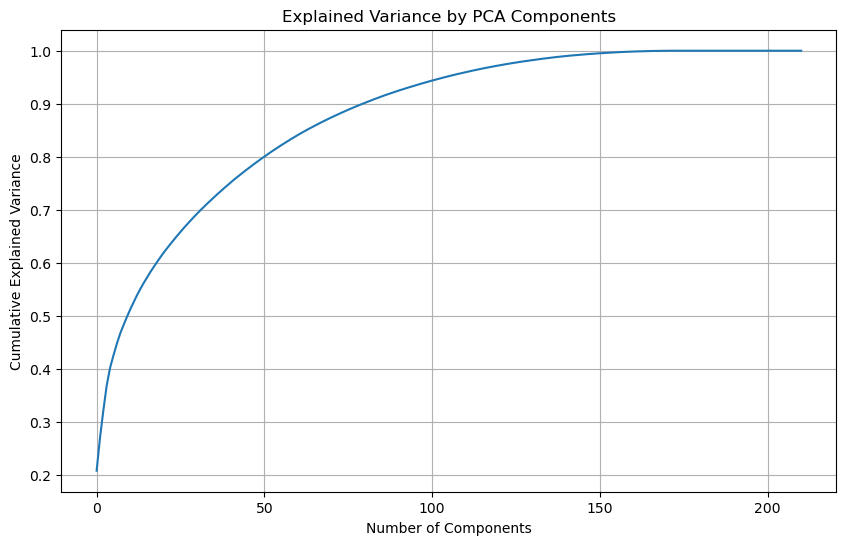

Top loadings for the first two PCA components in 2000:
Component 1:
grossProfit                    0.157025
revenue                        0.155982
totalEquity                    0.152254
totalStockholdersEquity        0.152135
depreciationAndAmortization    0.151060
totalNonCurrentAssets          0.149651
netReceivables                 0.149530
averageReceivables             0.149178
totalLiabilities               0.148866
totalCurrentAssets             0.147769
dtype: float64


Component 2:
growthTotalCurrentAssets             0.175729
growthTotalNonCurrentAssets          0.168427
growthTotalLiabilities               0.157616
growthPropertyPlantEquipmentNet      0.157249
commonStockIssued                    0.155441
researchAndDdevelopementToRevenue    0.149254
growthTotalCurrentLiabilities        0.148973
growthWeightedAverageShsOutDil       0.148518
growthWeightedAverageShsOut          0.146754
ResearchAndDevelopmentExpenses       0.145899
dtype: float64



Performing PCA analysis 

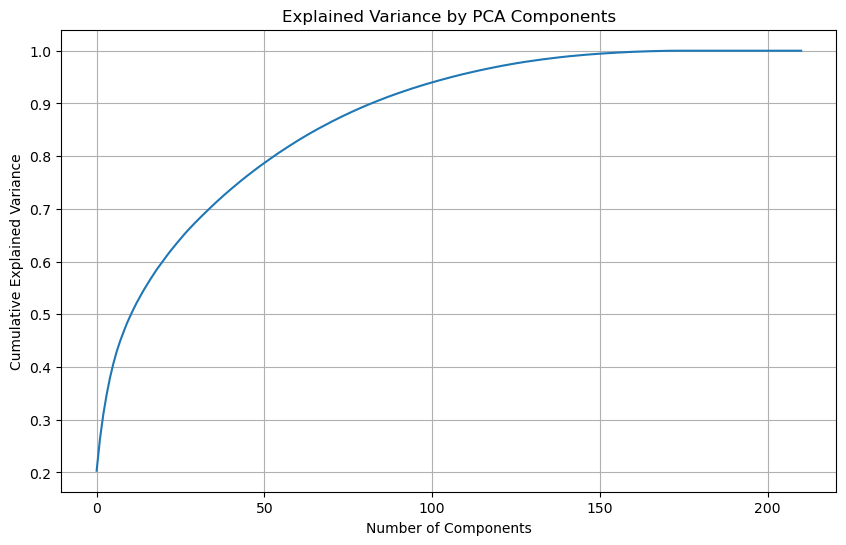

Top loadings for the first two PCA components in 2001:
Component 1:
grossProfit                    0.156880
revenue                        0.156728
totalEquity                    0.153539
totalStockholdersEquity        0.153338
totalNonCurrentAssets          0.150981
depreciationAndAmortization    0.150512
totalCurrentAssets             0.150298
totalLiabilities               0.150202
netReceivables                 0.149806
EBITDA                         0.149690
dtype: float64


Component 2:
growthNetIncome               0.214704
growthIncomeBeforeTax         0.207998
netProfitMargin               0.201321
growthEPSDiluted              0.198564
growthNetIncomeRatio          0.191203
earningsYield                 0.189498
growthIncomeBeforeTaxRatio    0.186195
growthOperatingIncome         0.183185
EPSDiluted                    0.174867
growthRetainedEarnings        0.174788
dtype: float64



Performing PCA analysis for 2002 dataset...

Explained variance plot for 2002:


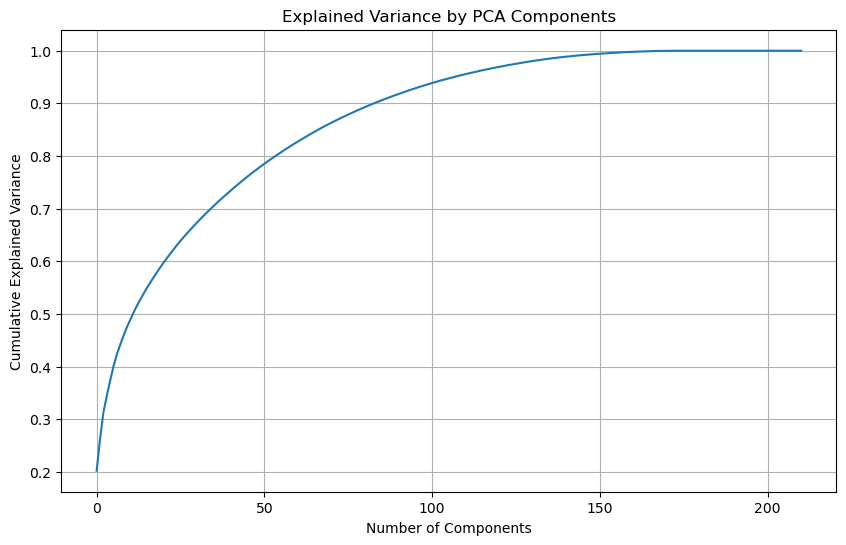

Top loadings for the first two PCA components in 2002:
Component 1:
revenue                        0.157368
grossProfit                    0.154517
totalCurrentLiabilities        0.153632
totalEquity                    0.152759
totalStockholdersEquity        0.152442
totalNonCurrentAssets          0.150862
depreciationAndAmortization    0.150348
EBITDA                         0.149357
averageReceivables             0.149280
netReceivables                 0.149253
dtype: float64


Component 2:
netProfitMargin           0.211398
earningsYield             0.195570
EPSDiluted                0.193097
growthNetIncome           0.185448
growthEPSDiluted          0.177558
growthNetIncomeRatio      0.171014
growthRetainedEarnings    0.169429
returnOnTangibleAssets    0.165482
growthIncomeBeforeTax     0.156566
grossProfitRatio          0.152660
dtype: float64



Performing PCA analysis for 2003 dataset...

Explained variance plot for 2003:


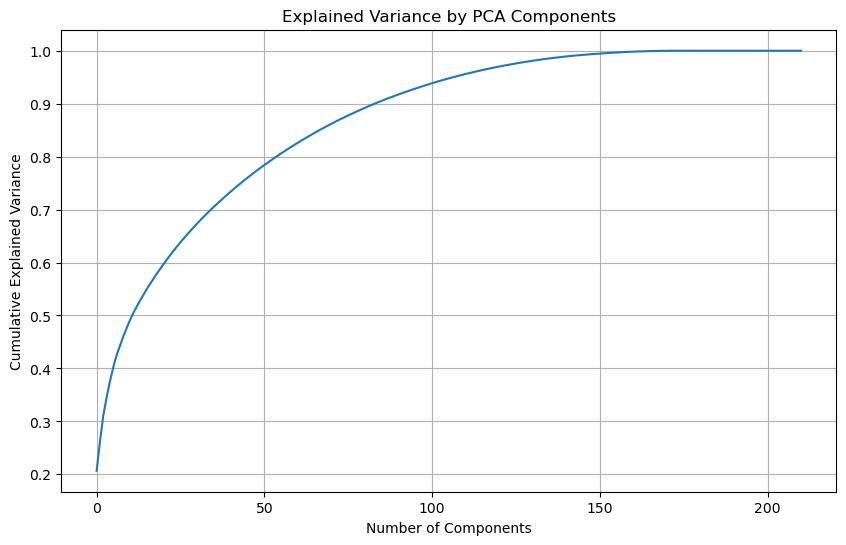

Top loadings for the first two PCA components in 2003:
Component 1:
revenue                        0.155911
grossProfit                    0.155502
totalEquity                    0.153174
totalStockholdersEquity        0.152966
totalCurrentLiabilities        0.151874
depreciationAndAmortization    0.149985
totalNonCurrentAssets          0.149802
EBITDA                         0.149722
netReceivables                 0.148634
averageReceivables             0.147943
dtype: float64


Component 2:
interestIncome                  0.207214
grossProfitRatio                0.202085
totalInvestments                0.197655
purchasesOfInvestments          0.195280
netProfitMargin                 0.187243
salesMaturitiesOfInvestments    0.184525
assetTurnover                   0.155423
interestExpense                 0.149834
debtRepayment                   0.143685
otherNonCurrentAssets           0.142680
dtype: float64



Performing PCA analysis for 2004 dataset...

Explained variance plot for 2

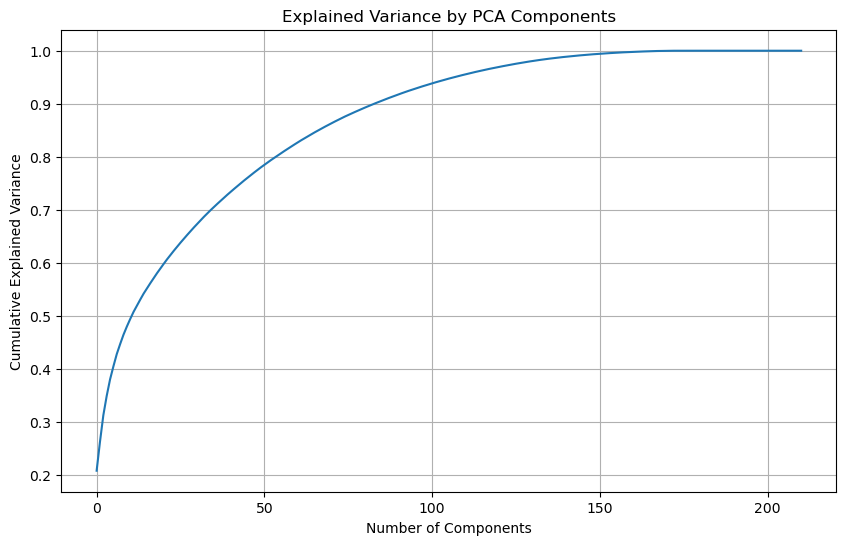

Top loadings for the first two PCA components in 2004:
Component 1:
revenue                        0.154811
grossProfit                    0.153598
totalEquity                    0.152967
totalStockholdersEquity        0.152366
totalCurrentLiabilities        0.151009
depreciationAndAmortization    0.150749
EBITDA                         0.150663
operatingIncome                0.147516
totalNonCurrentAssets          0.147466
averageReceivables             0.146928
dtype: float64


Component 2:
growthNetIncome               0.204684
growthIncomeBeforeTax         0.204515
growthEPSDiluted              0.199468
growthNetIncomeRatio          0.197963
growthIncomeBeforeTaxRatio    0.194249
growthOperatingIncome         0.191028
growthOperatingIncomeRatio    0.184401
growthEBITDA                  0.165303
assetTurnover                 0.157471
growthGrossProfit             0.148184
dtype: float64



Performing PCA analysis for 2005 dataset...

Explained variance plot for 2005:


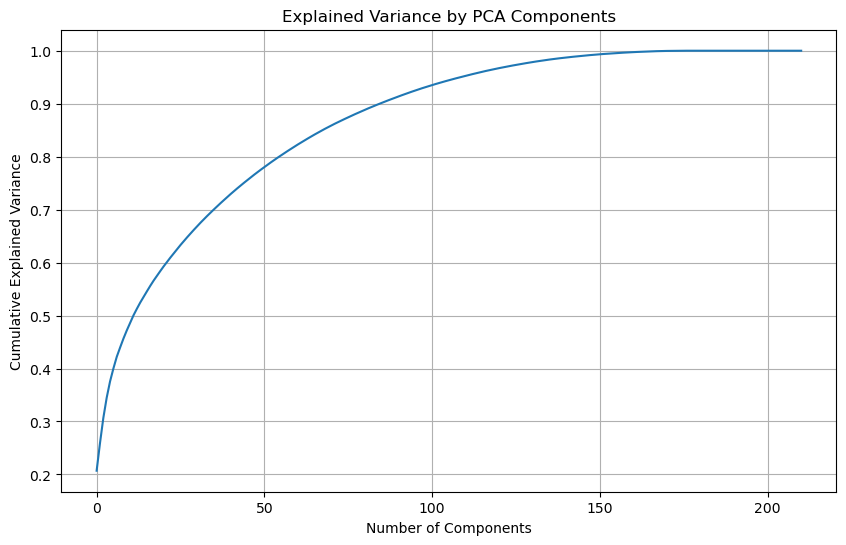

Top loadings for the first two PCA components in 2005:
Component 1:
revenue                        0.154656
grossProfit                    0.152550
totalEquity                    0.151410
totalCurrentLiabilities        0.150311
totalStockholdersEquity        0.150307
EBITDA                         0.149949
depreciationAndAmortization    0.148984
averageReceivables             0.147284
netReceivables                 0.147147
totalNonCurrentAssets          0.146734
dtype: float64


Component 2:
growthNetIncome               0.249032
growthIncomeBeforeTax         0.244999
growthEPSDiluted              0.234954
growthOperatingIncome         0.234365
growthNetIncomeRatio          0.220866
growthIncomeBeforeTaxRatio    0.216961
growthEBITDA                  0.202401
growthOperatingIncomeRatio    0.196525
returnOnTangibleAssets        0.184737
growthRetainedEarnings        0.178160
dtype: float64



Performing PCA analysis for 2006 dataset...

Explained variance plot for 2006:


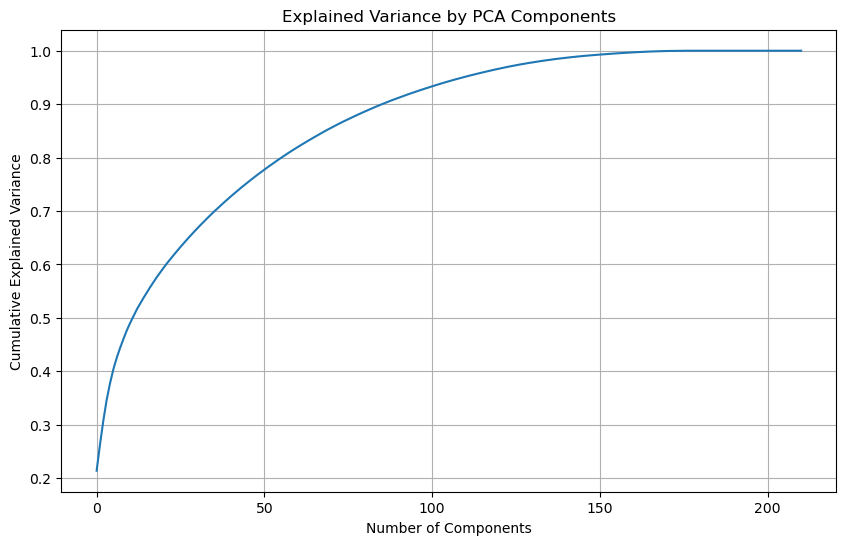

Top loadings for the first two PCA components in 2006:
Component 1:
revenue                        0.151573
grossProfit                    0.151363
totalEquity                    0.148686
EBITDA                         0.148189
totalCurrentLiabilities        0.148008
totalStockholdersEquity        0.147853
averageReceivables             0.145722
netReceivables                 0.145628
totalNonCurrentAssets          0.145512
depreciationAndAmortization    0.144947
dtype: float64


Component 2:
growthNetIncome               0.253694
growthIncomeBeforeTax         0.241823
growthOperatingIncome         0.241195
growthEPSDiluted              0.238129
growthNetIncomeRatio          0.223026
growthIncomeBeforeTaxRatio    0.213139
growthOperatingIncomeRatio    0.204822
growthEBITDA                  0.203810
earningsYield                 0.196778
netProfitMargin               0.196490
dtype: float64



Performing PCA analysis for 2007 dataset...

Explained variance plot for 2007:


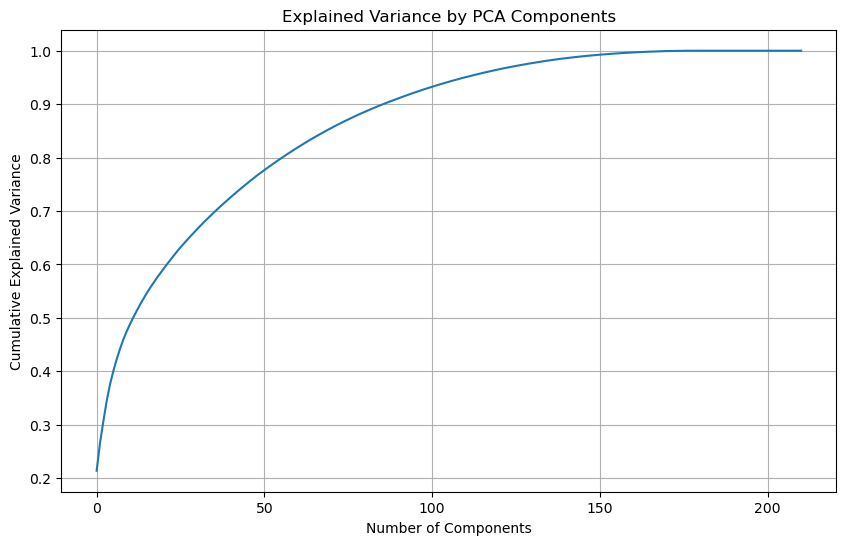

Top loadings for the first two PCA components in 2007:
Component 1:
revenue                        0.151035
grossProfit                    0.150295
totalEquity                    0.148192
totalCurrentLiabilities        0.147990
totalStockholdersEquity        0.147875
EBITDA                         0.147362
netReceivables                 0.146360
averageReceivables             0.145874
totalNonCurrentAssets          0.145281
depreciationAndAmortization    0.143641
dtype: float64


Component 2:
growthNetIncome               0.248517
growthIncomeBeforeTax         0.245457
growthEPSDiluted              0.238313
growthNetIncomeRatio          0.224087
growthIncomeBeforeTaxRatio    0.220990
growthOperatingIncome         0.210718
growthEBITDA                  0.177494
growthRetainedEarnings        0.171786
growthOperatingIncomeRatio    0.166603
returnOnTangibleAssets        0.152988
dtype: float64



Performing PCA analysis for 2008 dataset...

Explained variance plot for 2008:


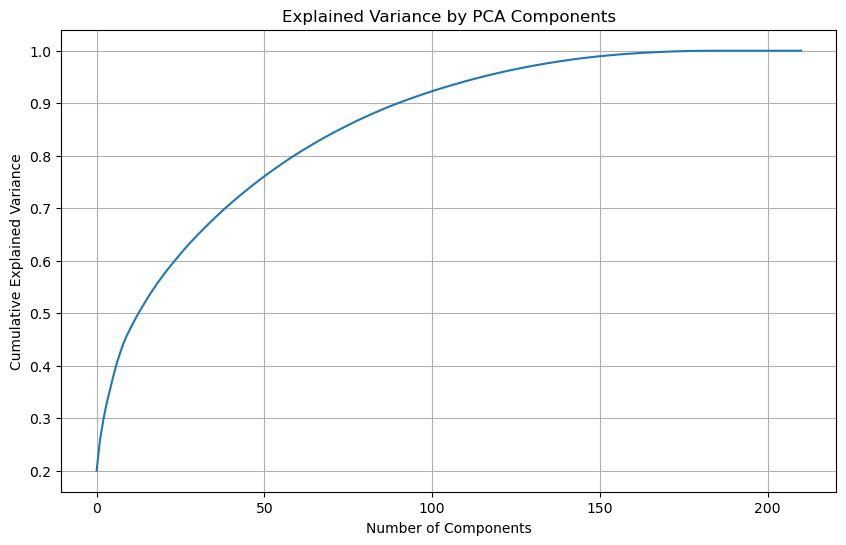

Top loadings for the first two PCA components in 2008:
Component 1:
revenue                                   0.151072
grossProfit                               0.149309
totalCurrentLiabilities                   0.147757
averageReceivables                        0.146803
netReceivables                            0.146692
totalNonCurrentAssets                     0.146526
depreciationAndAmortization               0.144635
investmentsInPropertyPlantAndEquipment    0.143409
totalLiabilities                          0.142876
totalCurrentAssets                        0.142410
dtype: float64


Component 2:
growthNetIncome               0.246071
growthIncomeBeforeTax         0.240578
growthEPSDiluted              0.239116
growthNetIncomeRatio          0.238237
growthIncomeBeforeTaxRatio    0.224444
growthOperatingIncome         0.215052
growthOperatingIncomeRatio    0.203462
growthRetainedEarnings        0.196932
earningsYield                 0.191300
EPSDiluted                    0.183972
dt

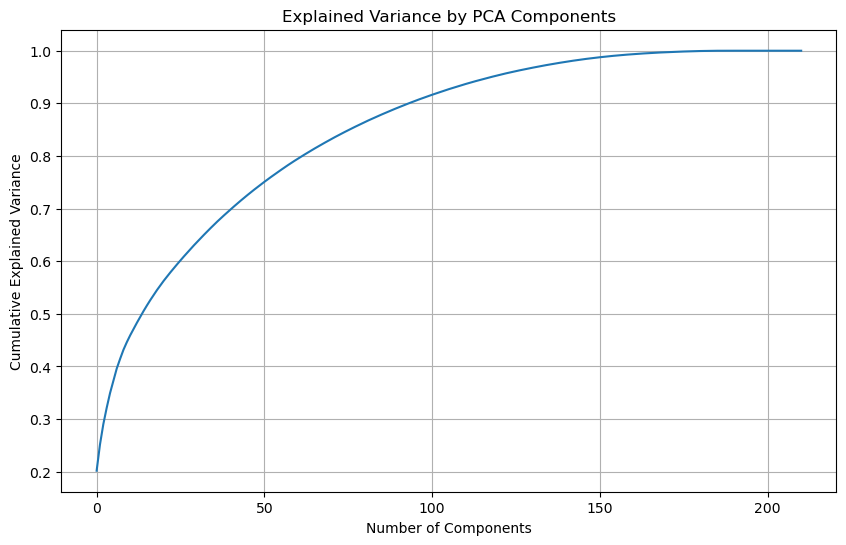

Top loadings for the first two PCA components in 2009:
Component 1:
revenue                    0.150228
grossProfit                0.147881
totalCurrentLiabilities    0.146644
totalNonCurrentAssets      0.146018
averageReceivables         0.145176
netReceivables             0.145144
totalEquity                0.142894
operatingCashFlow          0.142406
totalStockholdersEquity    0.142031
totalLiabilities           0.142009
dtype: float64


Component 2:
growthNetIncomeRatio          0.245871
growthIncomeBeforeTaxRatio    0.244786
growthNetIncome               0.242517
growthIncomeBeforeTax         0.239731
growthEPSDiluted              0.233038
growthOperatingIncome         0.221183
growthOperatingIncomeRatio    0.218739
growthRetainedEarnings        0.192531
growthEBITDA                  0.186962
earningsYield                 0.186224
dtype: float64



Performing PCA analysis for 2010 dataset...

Explained variance plot for 2010:


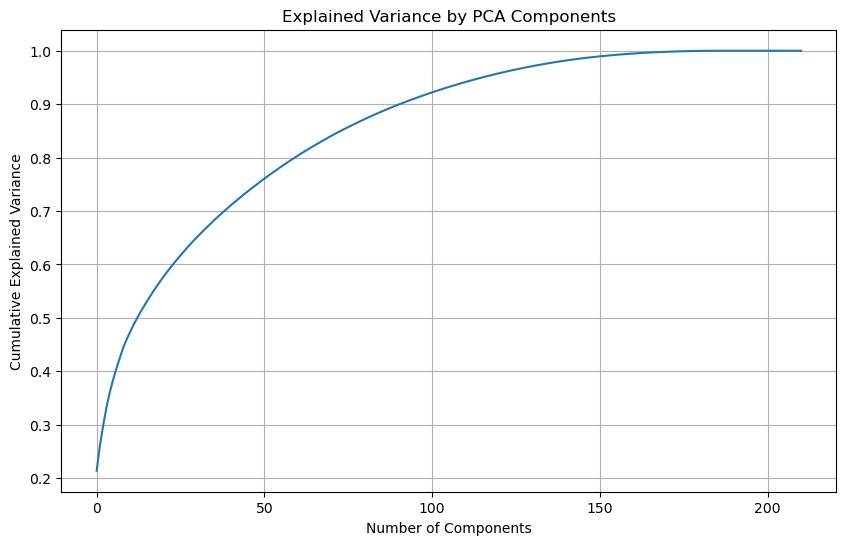

Top loadings for the first two PCA components in 2010:
Component 1:
revenue                    0.146918
EBITDA                     0.146527
grossProfit                0.145577
totalCurrentLiabilities    0.143504
averageReceivables         0.141915
netReceivables             0.141835
totalNonCurrentAssets      0.141428
operatingIncome            0.139268
totalLiabilities           0.138873
totalEquity                0.138627
dtype: float64


Component 2:
growthNetIncome               0.254462
growthIncomeBeforeTax         0.254257
growthEPSDiluted              0.245458
growthNetIncomeRatio          0.243364
growthIncomeBeforeTaxRatio    0.242204
growthOperatingIncome         0.230098
growthOperatingIncomeRatio    0.208893
growthEBITDA                  0.204455
growthEBITDARatio             0.181622
growthRetainedEarnings        0.171855
dtype: float64



Performing PCA analysis for 2011 dataset...

Explained variance plot for 2011:


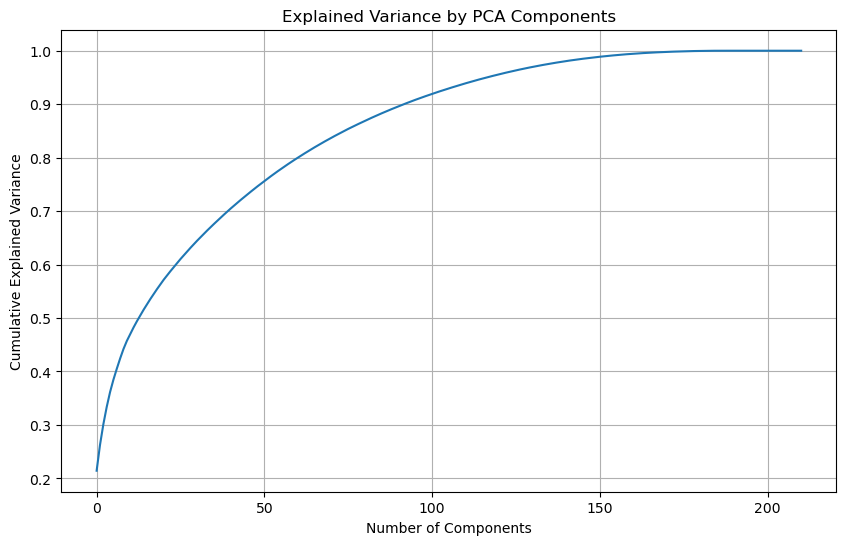

Top loadings for the first two PCA components in 2011:
Component 1:
EBITDA                         0.147106
revenue                        0.145539
grossProfit                    0.144632
totalCurrentLiabilities        0.141482
totalNonCurrentAssets          0.141110
operatingIncome                0.140945
averageReceivables             0.140662
netReceivables                 0.140195
depreciationAndAmortization    0.140080
operatingCashFlow              0.139881
dtype: float64


Component 2:
growthIncomeBeforeTax         0.242527
growthOperatingIncome         0.236289
growthEPSDiluted              0.231063
growthNetIncome               0.228472
growthNetIncomeRatio          0.221246
growthIncomeBeforeTaxRatio    0.220096
growthEBITDA                  0.217140
growthOperatingIncomeRatio    0.204423
growthEBITDARatio             0.179739
returnOnTangibleAssets        0.177031
dtype: float64



Performing PCA analysis for 2012 dataset...

Explained variance plot for 2012:


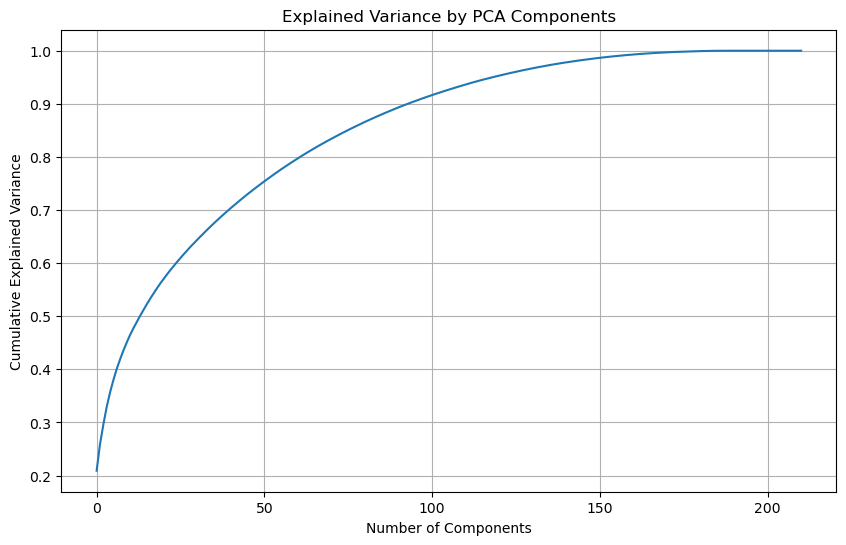

Top loadings for the first two PCA components in 2012:
Component 1:
revenue                    0.148280
grossProfit                0.147530
EBITDA                     0.145350
totalCurrentLiabilities    0.144304
netReceivables             0.142007
totalNonCurrentAssets      0.141844
totalLiabilities           0.141721
averageReceivables         0.141338
operatingCashFlow          0.141016
totalEquity                0.140486
dtype: float64


Component 2:
growthIncomeBeforeTax         0.244810
growthNetIncome               0.232886
growthEPSDiluted              0.224357
growthIncomeBeforeTaxRatio    0.216869
growthNetIncomeRatio          0.216469
growthOperatingIncome         0.206974
netProfitMargin               0.201923
earningsYield                 0.181463
growthEBITDA                  0.179084
growthOperatingIncomeRatio    0.170001
dtype: float64



Performing PCA analysis for 2013 dataset...

Explained variance plot for 2013:


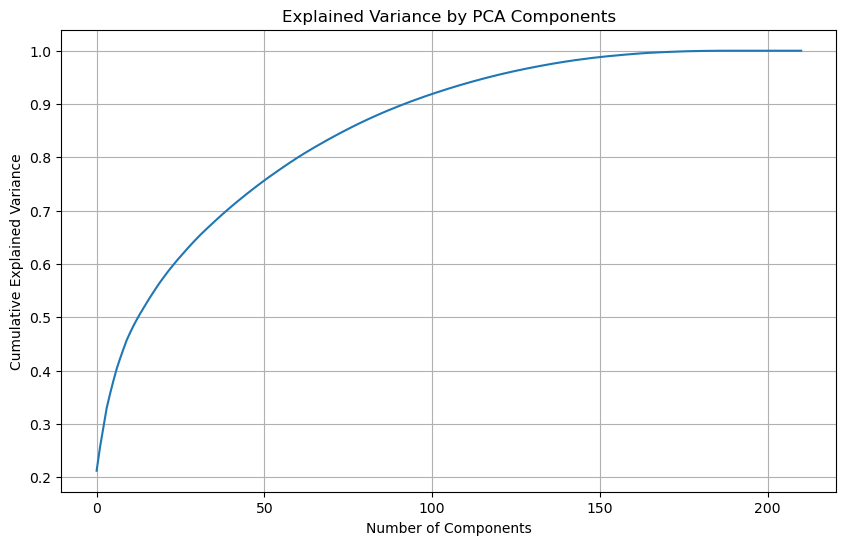

Top loadings for the first two PCA components in 2013:
Component 1:
grossProfit                0.148291
revenue                    0.148139
EBITDA                     0.144707
totalCurrentLiabilities    0.144147
operatingCashFlow          0.143277
operatingIncome            0.142594
totalLiabilities           0.142184
netReceivables             0.141636
totalNonCurrentAssets      0.141299
totalEquity                0.140123
dtype: float64


Component 2:
growthIncomeBeforeTax         0.267238
growthNetIncome               0.259601
growthIncomeBeforeTaxRatio    0.244445
growthNetIncomeRatio          0.238978
growthEPSDiluted              0.234396
growthOperatingIncome         0.232059
growthEBITDA                  0.208741
growthOperatingIncomeRatio    0.200193
growthEBITDARatio             0.181982
earningsYield                 0.168009
dtype: float64



Performing PCA analysis for 2014 dataset...

Explained variance plot for 2014:


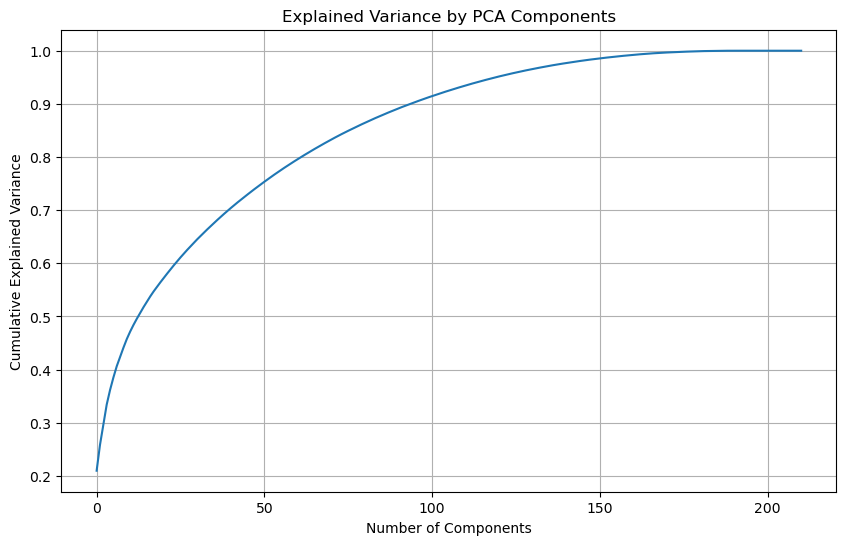

Top loadings for the first two PCA components in 2014:
Component 1:
grossProfit                0.148577
revenue                    0.147741
EBITDA                     0.145093
totalCurrentLiabilities    0.144126
operatingIncome            0.142312
totalLiabilities           0.141802
netReceivables             0.141313
totalNonCurrentAssets      0.141231
averageReceivables         0.140069
totalCurrentAssets         0.139933
dtype: float64


Component 2:
growthIncomeBeforeTax         0.257981
growthNetIncome               0.253998
growthEPSDiluted              0.235916
growthIncomeBeforeTaxRatio    0.222961
growthOperatingIncome         0.220560
growthNetIncomeRatio          0.217885
growthEBITDA                  0.208316
growthOperatingIncomeRatio    0.173847
growthEBITDARatio             0.172829
netProfitMargin               0.172454
dtype: float64



Performing PCA analysis for 2015 dataset...

Explained variance plot for 2015:


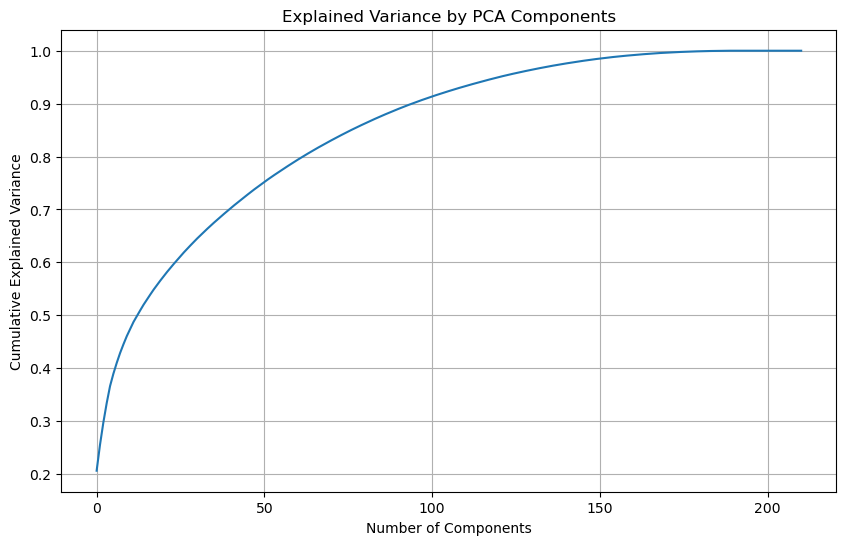

Top loadings for the first two PCA components in 2015:
Component 1:
revenue                       0.148708
grossProfit                   0.148169
EBITDA                        0.143923
totalCurrentLiabilities       0.143678
totalLiabilities              0.143081
totalNonCurrentAssets         0.142362
netReceivables                0.142143
totalNonCurrentLiabilities    0.140674
averageReceivables            0.140629
totalCurrentAssets            0.140302
dtype: float64


Component 2:
growthIncomeBeforeTax         0.219919
growthNetIncome               0.215068
growthIncomeBeforeTaxRatio    0.210644
growthNetIncomeRatio          0.207453
growthEPSDiluted              0.202782
growthOperatingIncome         0.199327
netProfitMargin               0.179157
growthOperatingIncomeRatio    0.179015
growthEBITDA                  0.173512
earningsYield                 0.167425
dtype: float64



Performing PCA analysis for 2016 dataset...

Explained variance plot for 2016:


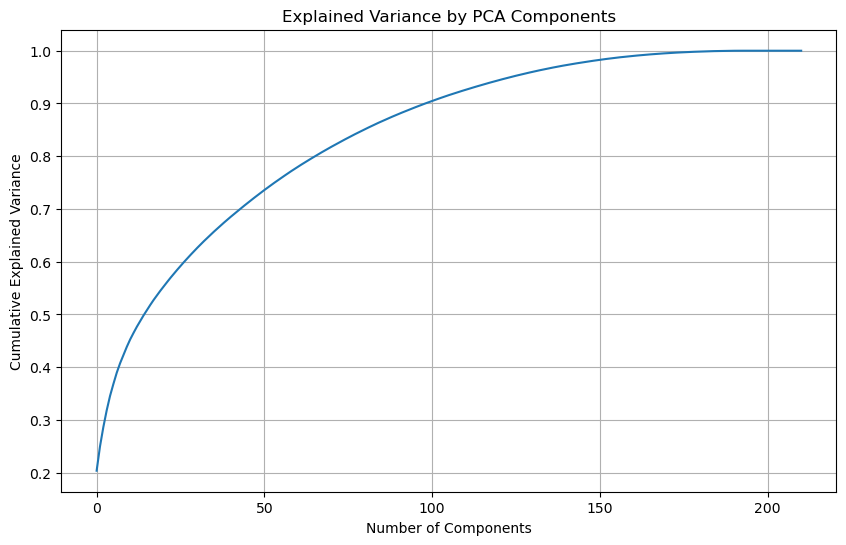

Top loadings for the first two PCA components in 2016:
Component 1:
revenue                       0.148087
grossProfit                   0.147881
EBITDA                        0.145233
totalLiabilities              0.144777
totalNonCurrentAssets         0.144010
totalCurrentLiabilities       0.142522
totalNonCurrentLiabilities    0.142300
netReceivables                0.142120
totalCurrentAssets            0.141208
marketCap                     0.140649
dtype: float64


Component 2:
growthIncomeBeforeTax         0.259814
growthNetIncome               0.255105
growthEPSDiluted              0.238253
growthIncomeBeforeTaxRatio    0.233246
growthNetIncomeRatio          0.231148
growthOperatingIncome         0.221826
growthEBITDA                  0.206490
netProfitMargin               0.196821
growthOperatingIncomeRatio    0.185442
growthEBITDARatio             0.169329
dtype: float64



Performing PCA analysis for 2017 dataset...

Explained variance plot for 2017:


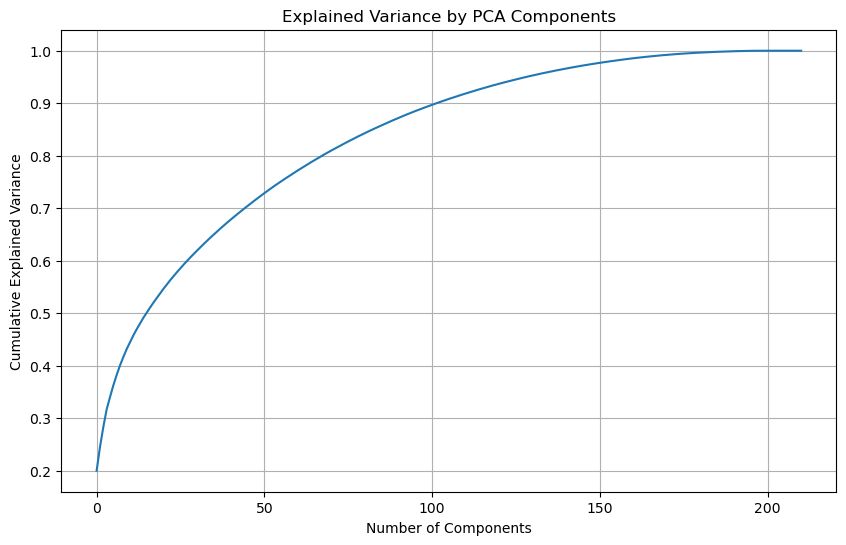

Top loadings for the first two PCA components in 2017:
Component 1:
grossProfit                   0.147016
revenue                       0.146704
totalLiabilities              0.143385
totalNonCurrentAssets         0.142869
EBITDA                        0.142491
totalNonCurrentLiabilities    0.142410
totalCurrentLiabilities       0.142158
marketCap                     0.140897
totalDebt                     0.140468
netReceivables                0.139847
dtype: float64


Component 2:
growthIncomeBeforeTax         0.224778
netProfitMargin               0.215851
growthNetIncome               0.213067
growthOperatingIncome         0.198593
growthEBITDA                  0.187414
growthIncomeBeforeTaxRatio    0.181614
growthEPSDiluted              0.179992
growthNetIncomeRatio          0.177411
returnOnTangibleAssets        0.173383
earningsYield                 0.172025
dtype: float64



Performing PCA analysis for 2018 dataset...

Explained variance plot for 2018:


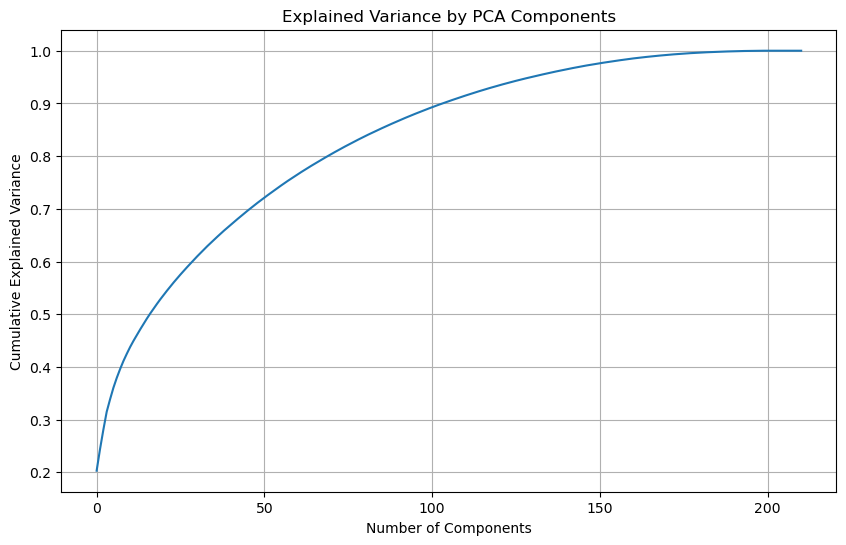

Top loadings for the first two PCA components in 2018:
Component 1:
grossProfit                   0.146338
revenue                       0.145538
totalNonCurrentAssets         0.141813
totalLiabilities              0.141653
EBITDA                        0.141569
totalNonCurrentLiabilities    0.140990
totalCurrentLiabilities       0.140904
operatingIncome               0.140547
operatingCashFlow             0.140095
netReceivables                0.139210
dtype: float64


Component 2:
growthNetIncome               0.228925
growthIncomeBeforeTax         0.225768
growthEPSDiluted              0.209191
growthOperatingIncome         0.205532
growthNetIncomeRatio          0.203500
growthIncomeBeforeTaxRatio    0.189210
netProfitMargin               0.176496
growthOperatingIncomeRatio    0.169274
growthEBITDA                  0.168853
earningsYield                 0.164926
dtype: float64



Performing PCA analysis for 2019 dataset...

Explained variance plot for 2019:


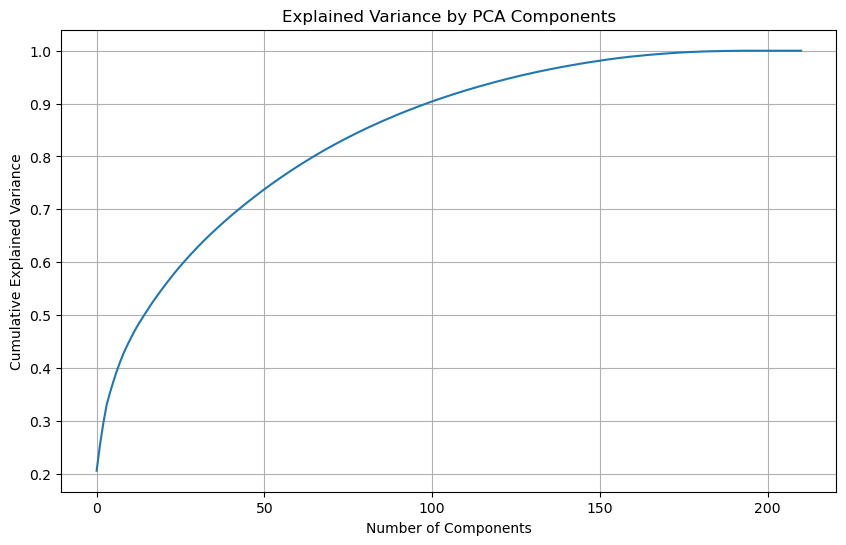

Top loadings for the first two PCA components in 2019:
Component 1:
grossProfit                   0.147658
revenue                       0.147003
totalNonCurrentAssets         0.144755
totalLiabilities              0.144202
totalNonCurrentLiabilities    0.143497
totalCurrentAssets            0.143321
totalDebt                     0.141992
totalCurrentLiabilities       0.141538
netReceivables                0.139719
averageReceivables            0.139686
dtype: float64


Component 2:
growthIncomeBeforeTax         0.214657
growthNetIncome               0.209897
netProfitMargin               0.201055
growthEPSDiluted              0.189602
growthRetainedEarnings        0.161665
growthNetIncomeRatio          0.157484
growthIncomeBeforeTaxRatio    0.156687
earningsYield                 0.149835
tangibleBookValuePerShare     0.149472
growthOperatingIncome         0.147718
dtype: float64



Performing PCA analysis for 2020 dataset...

Explained variance plot for 2020:


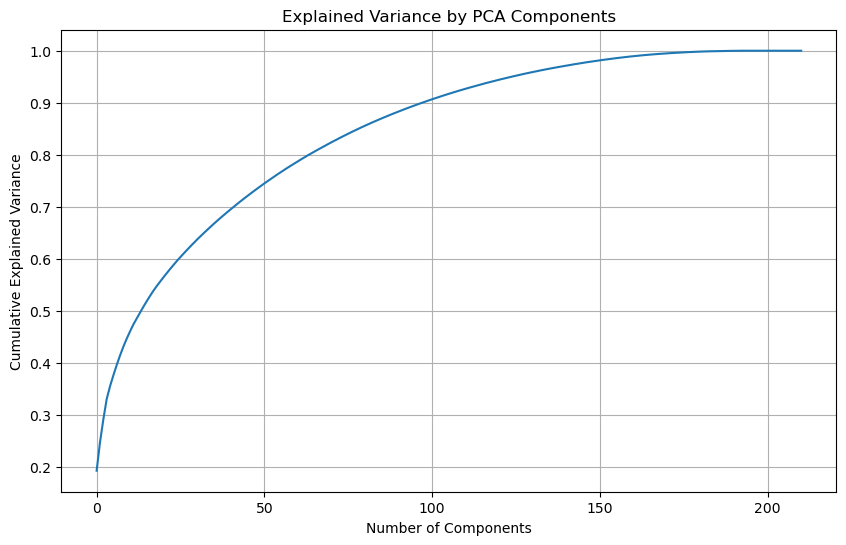

Top loadings for the first two PCA components in 2020:
Component 1:
revenue                       0.150543
totalNonCurrentAssets         0.147971
totalLiabilities              0.147819
totalCurrentAssets            0.147636
totalNonCurrentLiabilities    0.146896
grossProfit                   0.145797
totalDebt                     0.145292
totalCurrentLiabilities       0.145200
netReceivables                0.144157
averageReceivables            0.143837
dtype: float64


Component 2:
growthIncomeBeforeTax         0.221647
growthNetIncome               0.218317
growthIncomeBeforeTaxRatio    0.212648
growthEPSDiluted              0.211527
growthNetIncomeRatio          0.211364
growthOperatingIncome         0.188034
growthRetainedEarnings        0.179397
EPSDiluted                    0.177625
earningsYield                 0.176873
growthEBITDA                  0.173254
dtype: float64



Performing PCA analysis for 2021 dataset...

Explained variance plot for 2021:


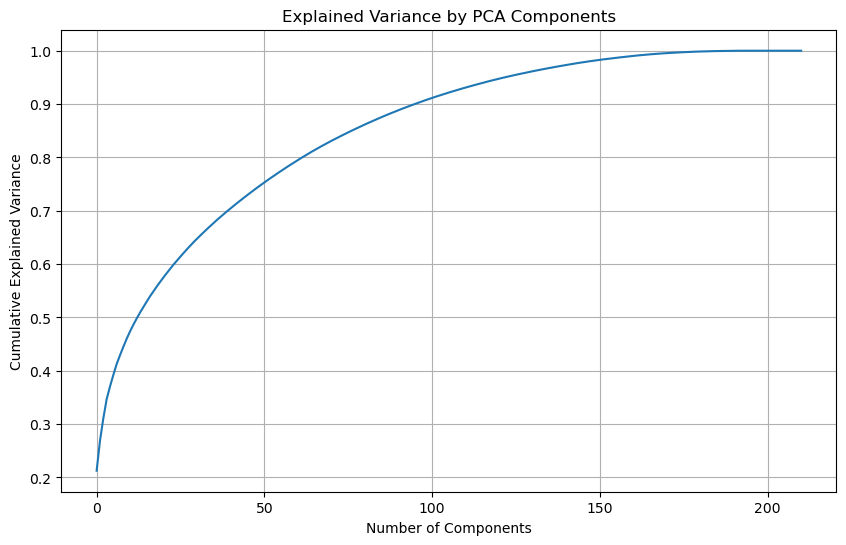

Top loadings for the first two PCA components in 2021:
Component 1:
revenue                       0.144779
grossProfit                   0.143736
totalLiabilities              0.141515
totalNonCurrentAssets         0.141368
totalNonCurrentLiabilities    0.140246
totalCurrentAssets            0.139984
totalDebt                     0.138964
totalCurrentLiabilities       0.138196
netReceivables                0.137564
averageReceivables            0.135036
dtype: float64


Component 2:
netProfitMargin                       0.174138
growthIncomeBeforeTax                 0.161438
growthNetIncome                       0.160840
stockBasedCompensationToRevenue       0.153196
earningsYield                         0.148376
growthOperatingIncome                 0.147443
growthEPSDiluted                      0.142598
growthEBITDA                          0.138178
growthRetainedEarnings                0.138035
growthOthertotalStockholdersEquity    0.136097
dtype: float64



Performing PCA analysis 

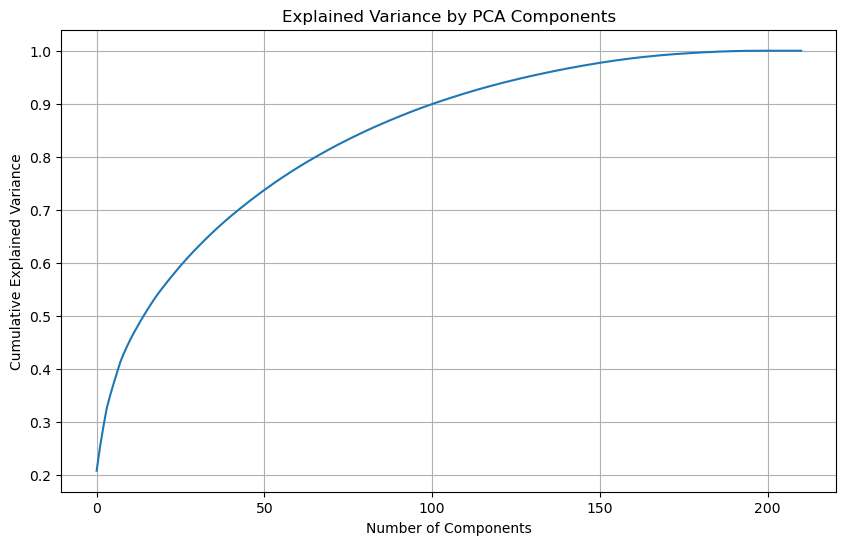

Top loadings for the first two PCA components in 2022:
Component 1:
revenue                       0.145175
grossProfit                   0.144495
totalLiabilities              0.140750
totalCurrentAssets            0.140558
totalNonCurrentAssets         0.140285
totalCurrentLiabilities       0.139772
totalDebt                     0.139735
totalNonCurrentLiabilities    0.138851
averageReceivables            0.138064
netReceivables                0.138043
dtype: float64


Component 2:
growthIncomeBeforeTax              0.208670
growthNetIncome                    0.205437
growthIncomeBeforeTaxRatio         0.193003
growthEPSDiluted                   0.192556
growthNetIncomeRatio               0.191965
netProfitMargin                    0.191535
growthOperatingIncomeRatio         0.166090
stockBasedCompensationToRevenue    0.165030
returnOnTangibleAssets             0.163193
growthRetainedEarnings             0.162472
dtype: float64



Performing PCA analysis for 2023 dataset...

Explained

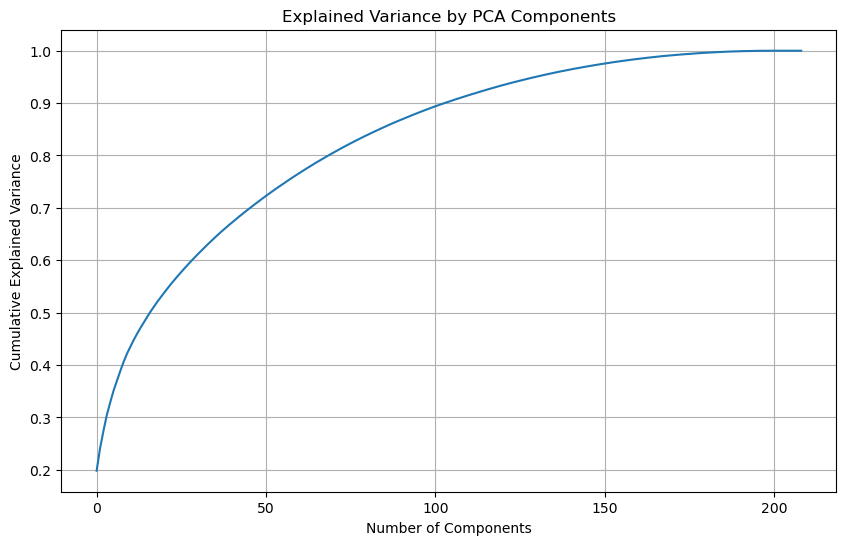

Top loadings for the first two PCA components in 2023:
Component 1:
revenue                       0.149072
grossProfit                   0.146893
totalCurrentAssets            0.144824
totalLiabilities              0.144384
totalNonCurrentLiabilities    0.142750
totalNonCurrentAssets         0.142460
totalDebt                     0.142206
netReceivables                0.140544
marketCap                     0.139125
operatingCashFlow             0.137977
dtype: float64


Component 2:
growthIncomeBeforeTax         0.249095
growthNetIncome               0.242681
growthEPSDiluted              0.228567
netProfitMargin               0.221752
growthIncomeBeforeTaxRatio    0.214221
growthNetIncomeRatio          0.213398
growthOperatingIncome         0.188117
earningsYield                 0.180520
growthOperatingIncomeRatio    0.166287
returnOnTangibleAssets        0.162859
dtype: float64




In [16]:
# Initialize the dictionary to store PCA results
pca_analysis_results = {}

# Loop through each dataset and perform PCA analysis
for year, df in full_df.items():
    try:
        print(f"\nPerforming PCA analysis for {year} dataset...\n")
        
        # Perform PCA analysis
        pca, explained_variance_plot, loadings_dict = perform_pca_analysis(df, num_top_features=10)
        
        # Store the PCA results
        pca_analysis_results[year] = {
            'pca_model': pca,
            'explained_variance_plot': explained_variance_plot,
            'loadings': loadings_dict
        }
        
        # Show explained variance plot
        print(f"Explained variance plot for {year}:")
        explained_variance_plot.show()
        plt.close()  # Close the figure to prevent too many open figures

        # Print only the first two PCA components and their top loadings
        print(f"Top loadings for the first two PCA components in {year}:")
        for component in list(loadings_dict.keys())[:2]:  # Get only the first two components
            print(f"{component}:")
            print(loadings_dict[component])
            print("\n")
    
    except Exception as e:
        print(f"Error performing PCA analysis on {year}: {e}")


### **Conclusions from the PCA Analysis**

---

1. **Key Drivers of Variance (Component 1)**:
   - Across all datasets from 2000 to 2023, the first principal component (Component 1) consistently identifies core financial metrics as the primary drivers of variance. These features include:
     - **Revenue**
     - **Gross Profit**
     - **EBITDA**
     - **Net Receivables**
     - **Total Current and Non-Current Liabilities**
   - These features dominate the first component, reflecting that overall financial performance and balance sheet health are critical in explaining the majority of the variance in the dataset year over year.

2. **Growth Metrics Influence on Component 2**:
   - The second principal component (Component 2) largely captures growth-related variables, such as:
     - **Growth in Net Income**
     - **Growth in EPS**
     - **Growth in Operating Income**
     - **Growth in Retained Earnings**
   - This suggests that the variance explained by the second component is driven by changes in a company's growth over time, indicating that the performance dynamics are split between absolute financial performance (Component 1) and growth trajectories (Component 2).

3. **Industry and Cluster Effects**:
   - In several years, the **Cluster** variable significantly influences the second principal component. This implies that clustering (potentially based on industries, sectors, or other groupings) plays a role in explaining the differences in variance for the dataset.
   - Companies within certain clusters may have different financial performance behaviors compared to others, highlighting how grouping plays a part in the variance breakdown.

4. **Consistent Patterns Across Years**:
   - There is a noticeable consistency across the years regarding the top loadings for both Component 1 and Component 2. This indicates that the financial performance and growth metrics remain fundamental explanatory variables of variance over time. 
   - While there are shifts in some metrics' influence, the core financial indicators (e.g., revenue, gross profit) are consistently dominant, reflecting stable patterns in explaining variance across time.

## 2. Clustering

In this step, we will apply **Clustering** techniques to group stocks with similar characteristics. These clusters can be used to create new features that capture the behavior of similar stocks, providing additional insights for the machine learning model.


In [17]:
# Make clustering
def kmeans_clustering_analysis(data, pca_components=2, num_clusters=4):
    """
    Perform K-means clustering on the provided dataset and visualize the clusters.
    
    Parameters:
    - data (DataFrame): The dataset to perform clustering on.
    - pca_components (int): Number of PCA components to use for clustering.
    - num_clusters (int): Number of clusters to form.
    
    Returns:
    - clusters: The cluster labels for each data point.
    - cluster_plot: Matplotlib figure object for the cluster plot.
    """
    # Isolate numeric data for clustering
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=pca_components)
    pca_data = pca.fit_transform(scaled_data)
    
    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(pca_data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 15), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method to Determine Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

    # Apply K-means clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(pca_data)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(pca_data, clusters)
    silhouette_values = silhouette_samples(pca_data, clusters)
    
    # Add cluster labels to the original data
    data['Cluster'] = clusters
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    cluster_plot = plt
    
    return clusters, cluster_plot, silhouette_avg, silhouette_values

# Run silhouette
def plot_silhouette_scores(clusters, silhouette_values, num_clusters, silhouette_avg):
    """
    Plot silhouette scores for each sample in each cluster.
    
    Parameters:
    - clusters: Cluster labels for each data point.
    - silhouette_values: Silhouette values for each data point.
    - num_clusters: Number of clusters.
    - silhouette_avg: Average silhouette score.
    
    Returns:
    - silhouette_plot: Matplotlib figure object for the silhouette plot.
    """
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_silhouette_values = silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values)
        
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10

    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.title("Silhouette plot for the various clusters")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()


Performing K-means clustering for 2000 dataset...



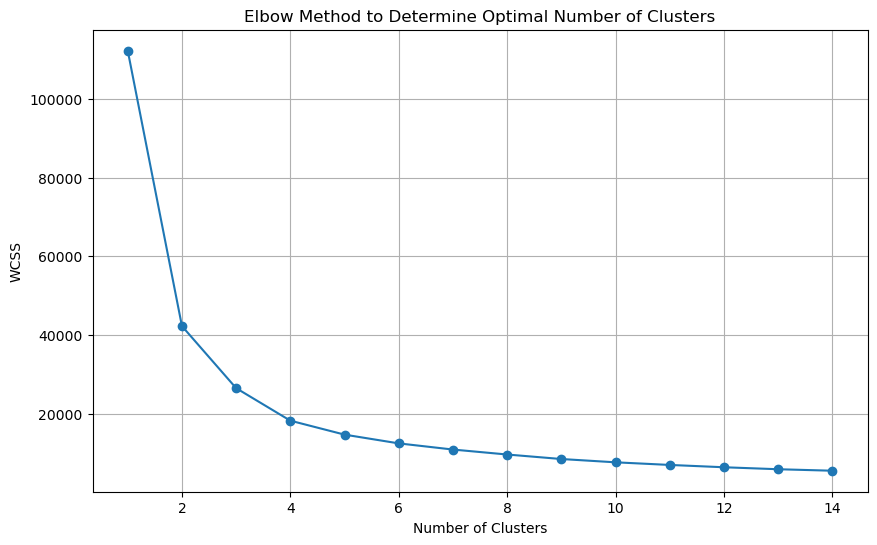

Cluster plot for 2000:


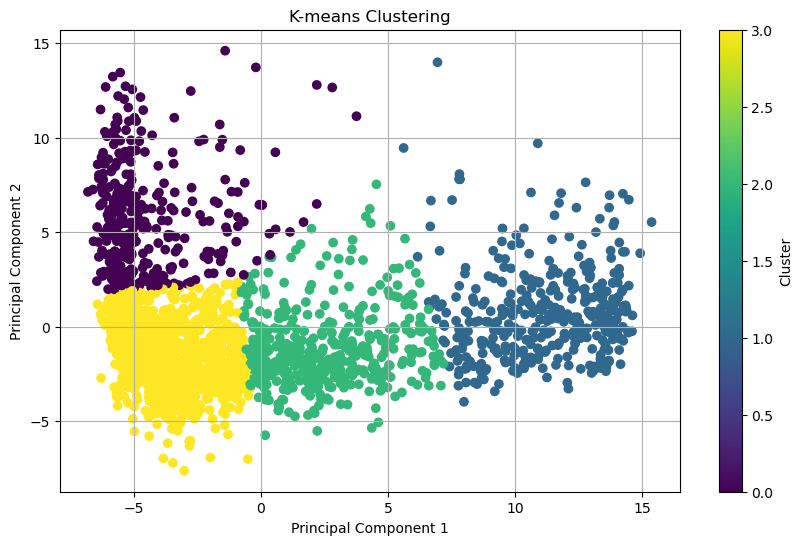

Silhouette plot for 2000:


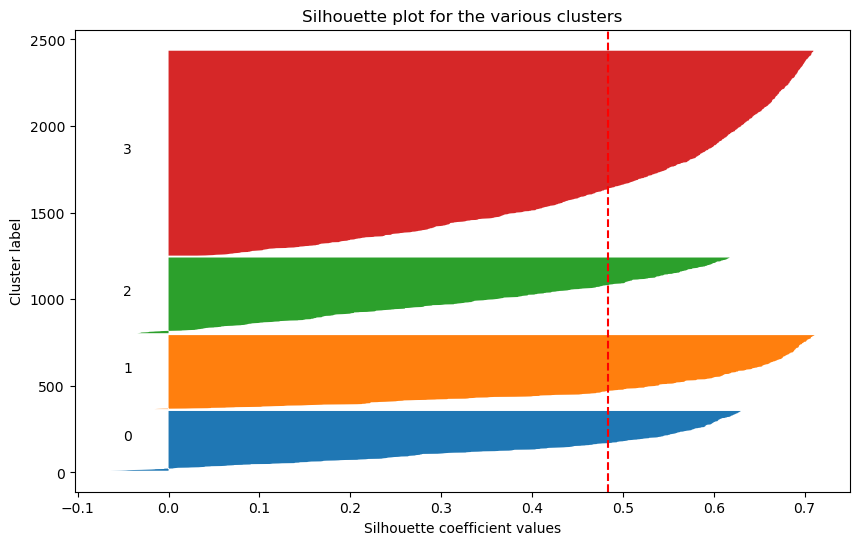


Performing K-means clustering for 2001 dataset...



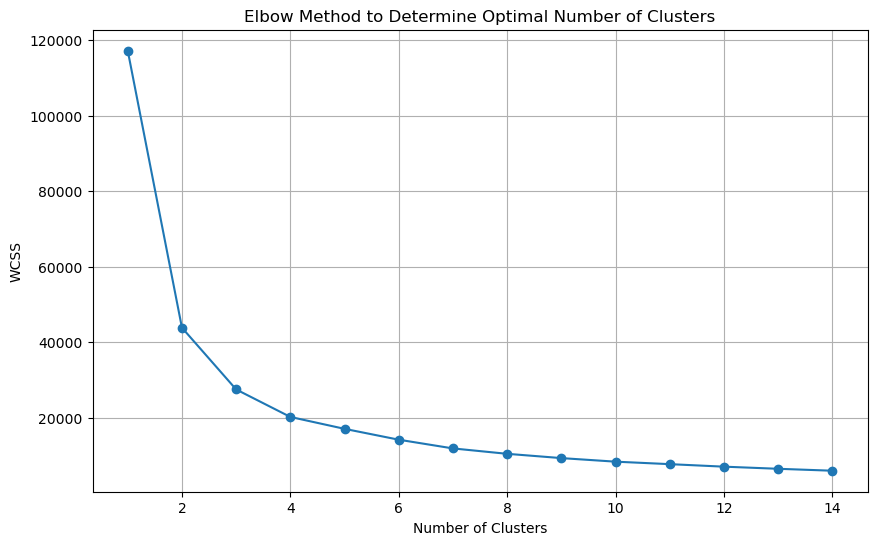

Cluster plot for 2001:


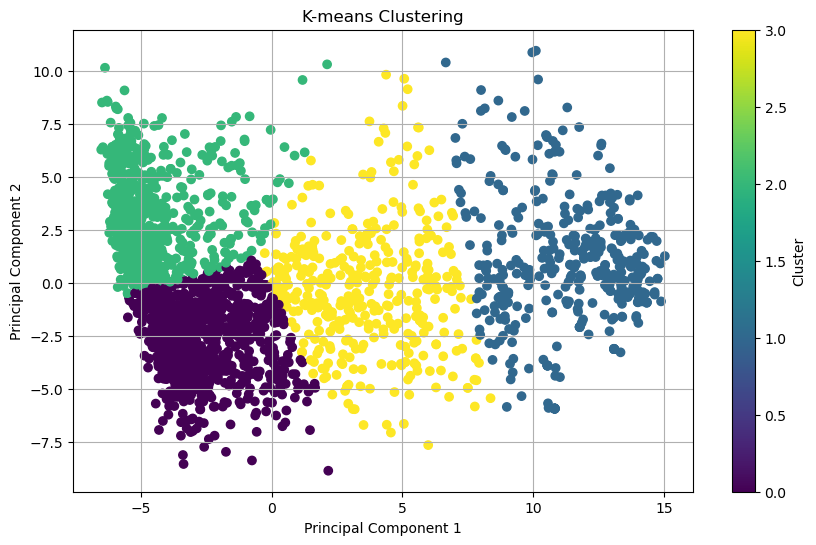

Silhouette plot for 2001:


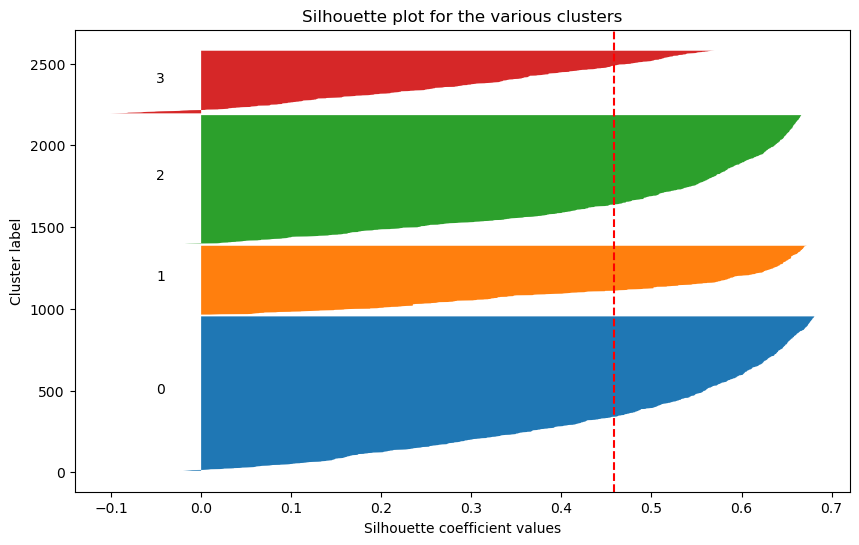


Performing K-means clustering for 2002 dataset...



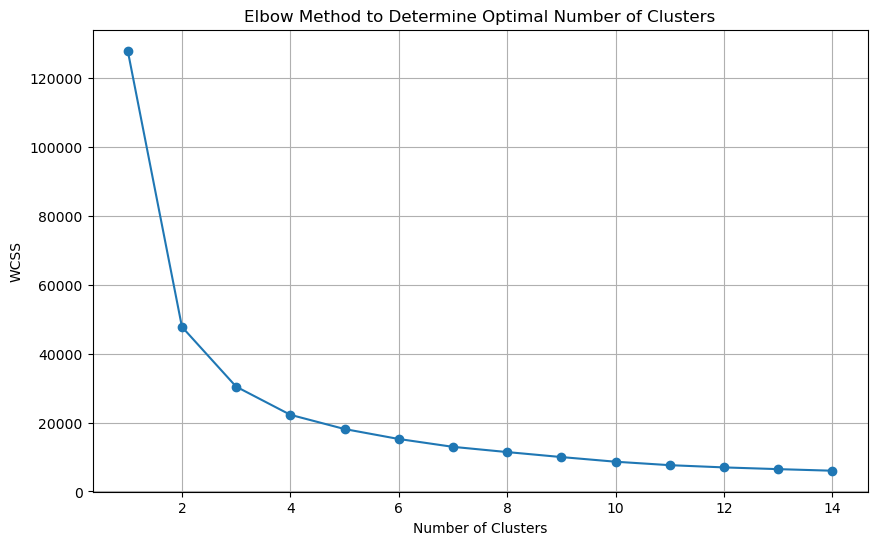

Cluster plot for 2002:


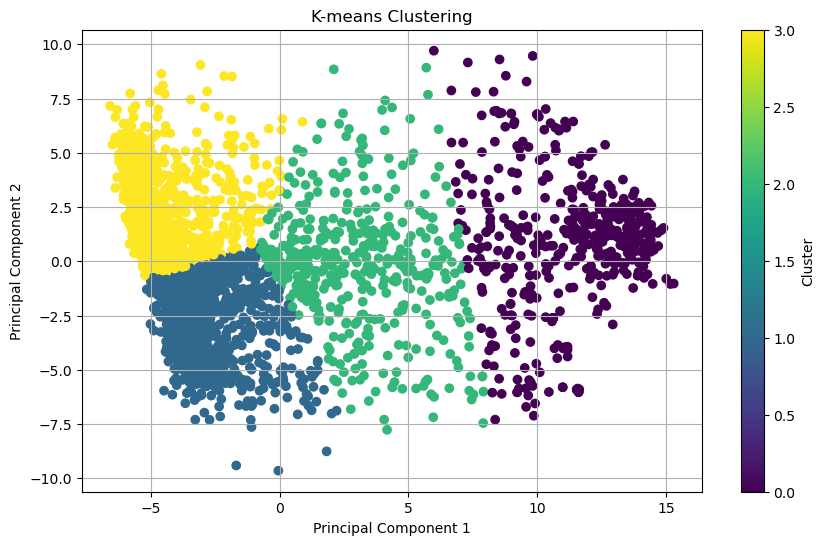

Silhouette plot for 2002:


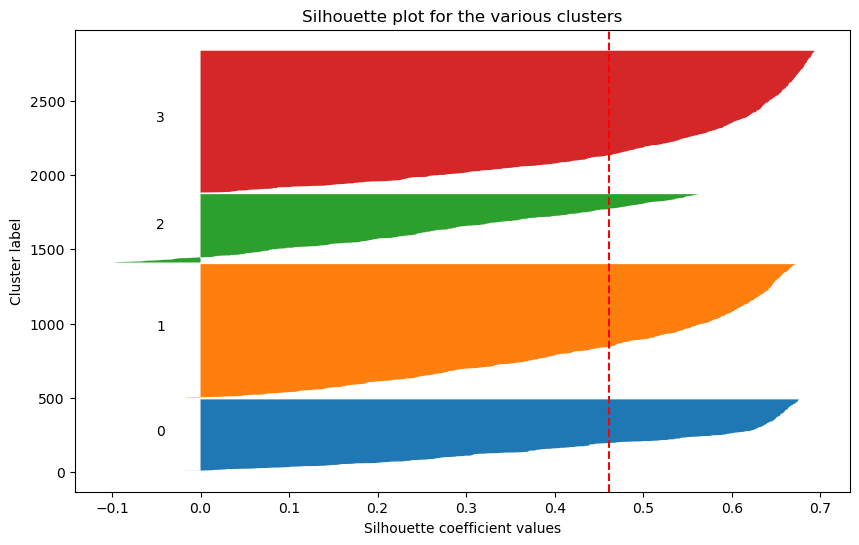


Performing K-means clustering for 2003 dataset...



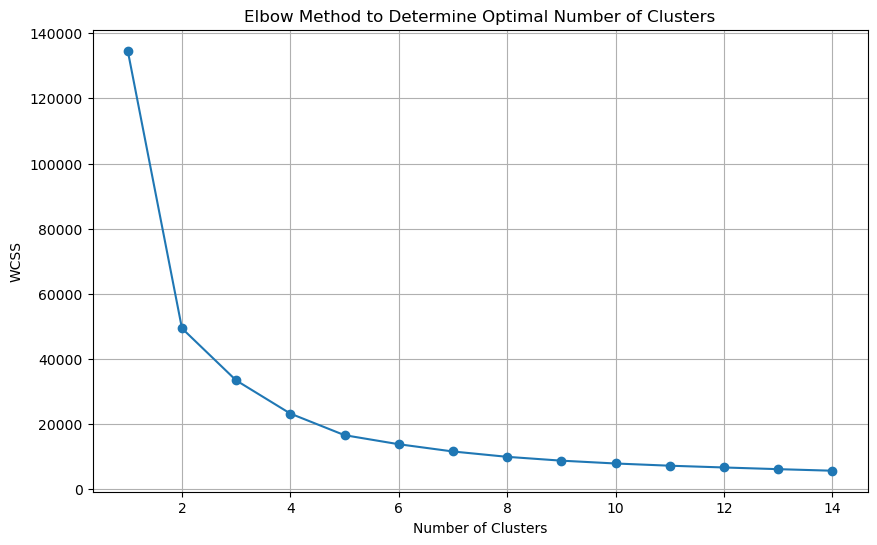

Cluster plot for 2003:


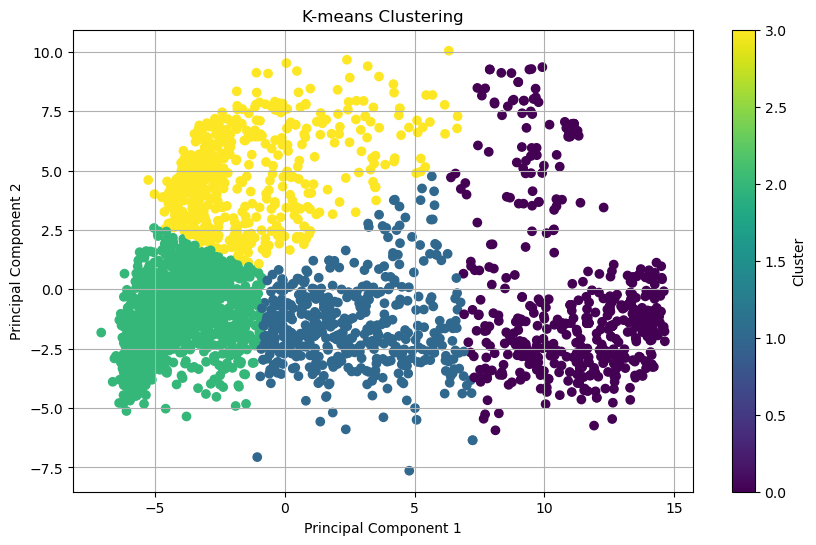

Silhouette plot for 2003:


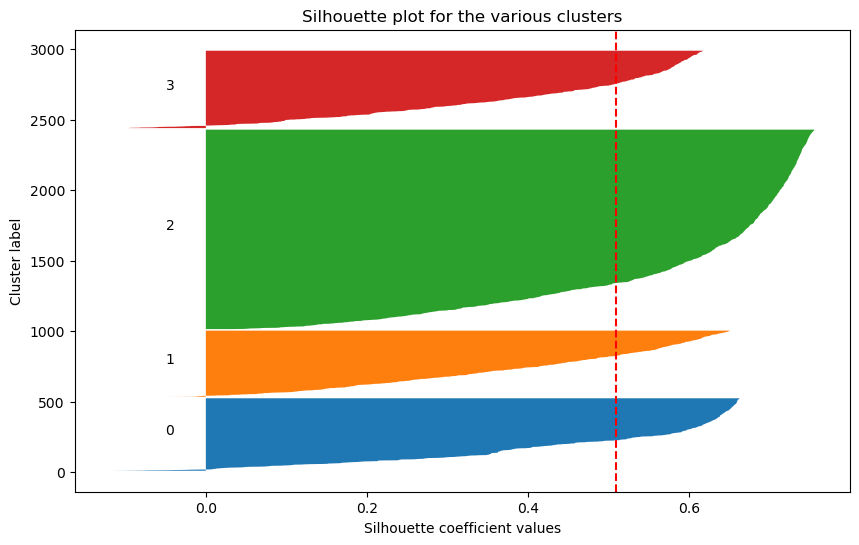


Performing K-means clustering for 2004 dataset...



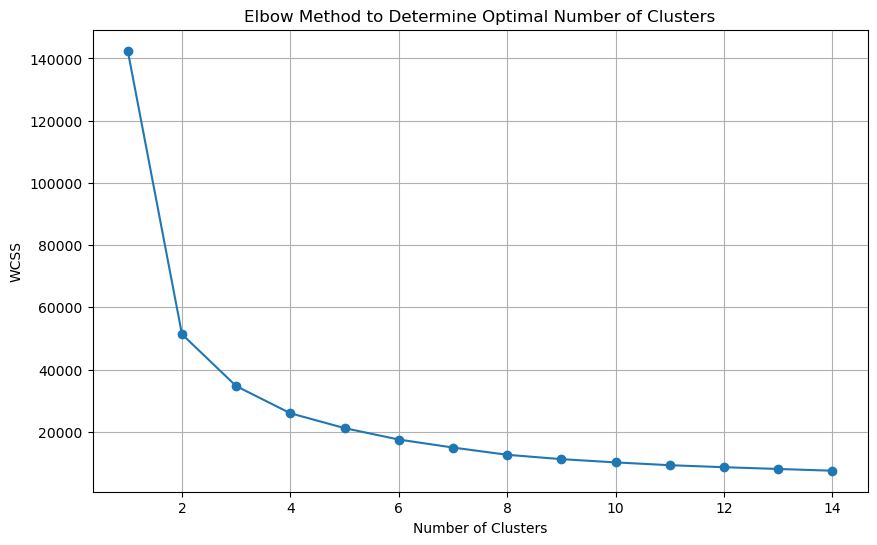

Cluster plot for 2004:


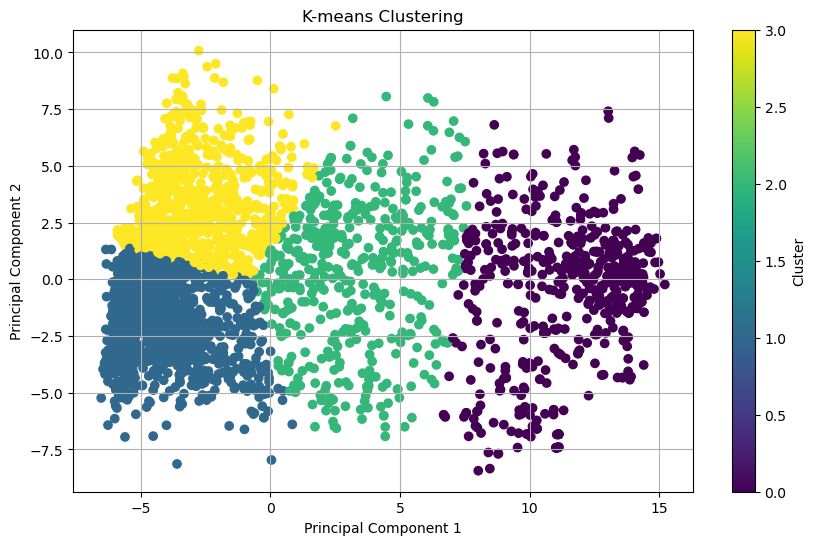

Silhouette plot for 2004:


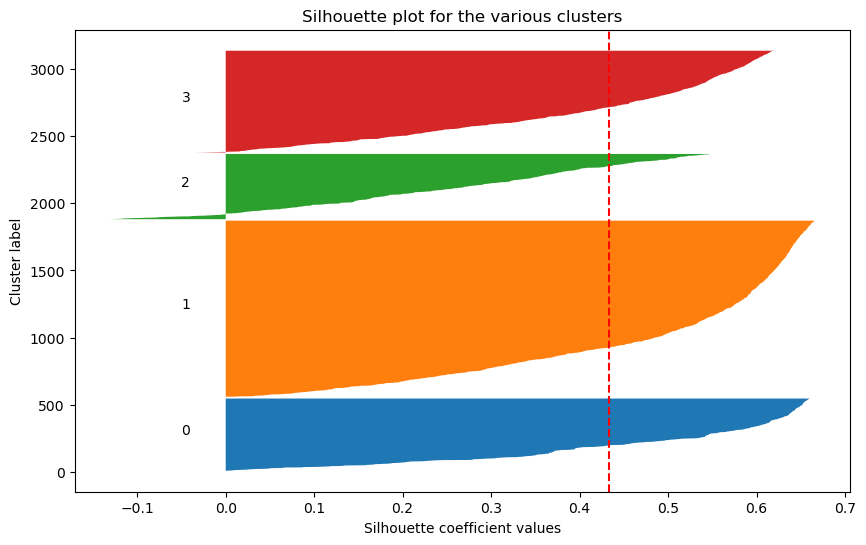


Performing K-means clustering for 2005 dataset...



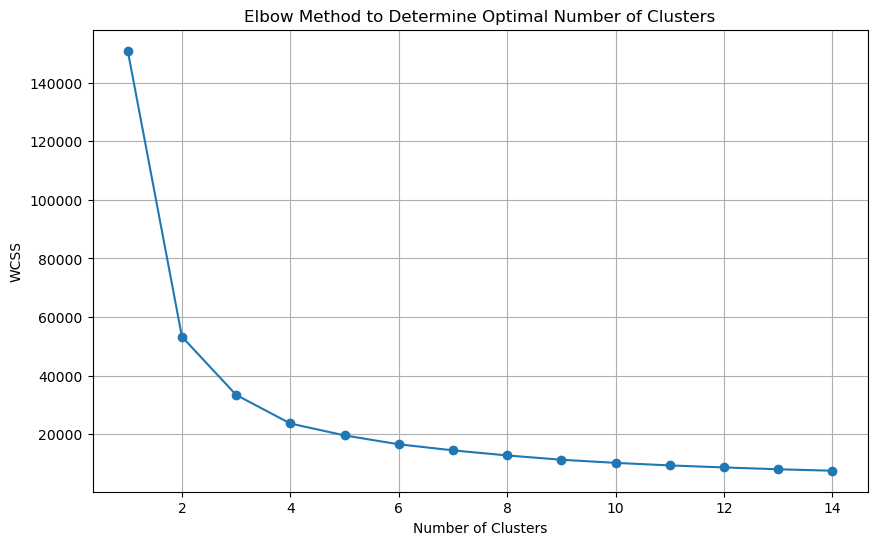

Cluster plot for 2005:


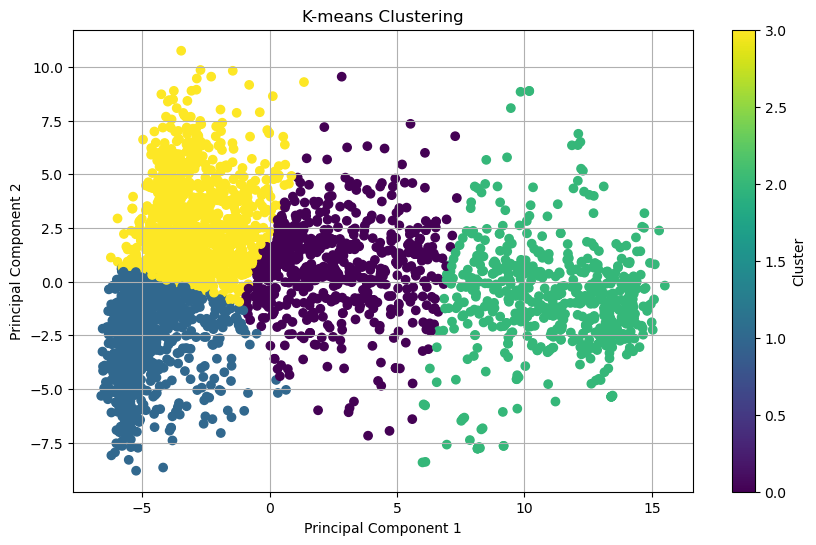

Silhouette plot for 2005:


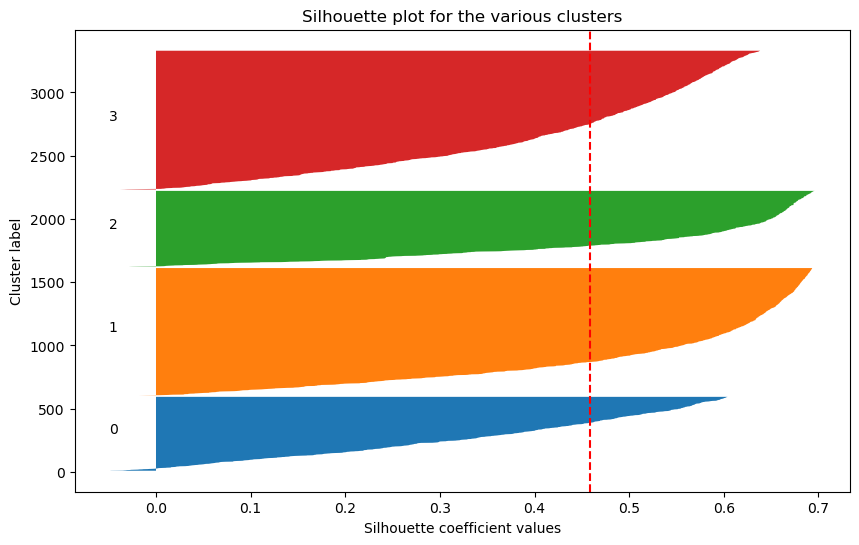


Performing K-means clustering for 2006 dataset...



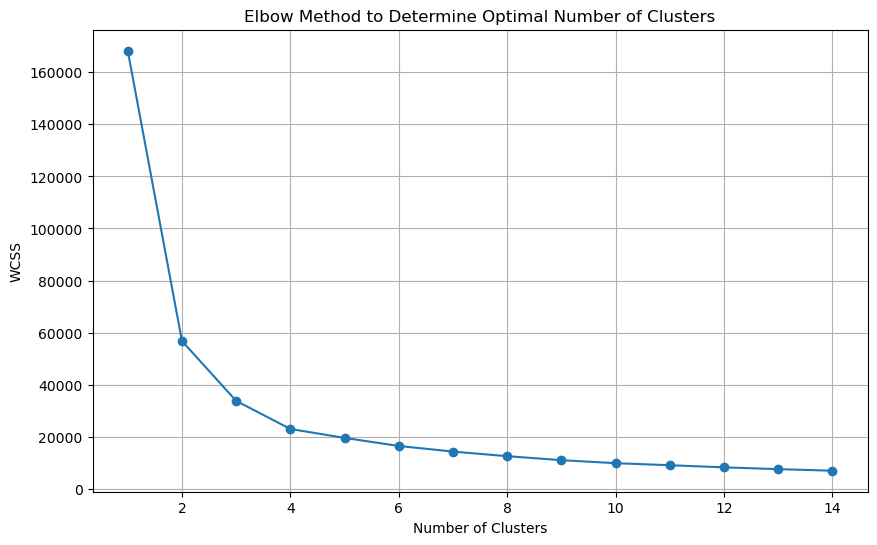

Cluster plot for 2006:


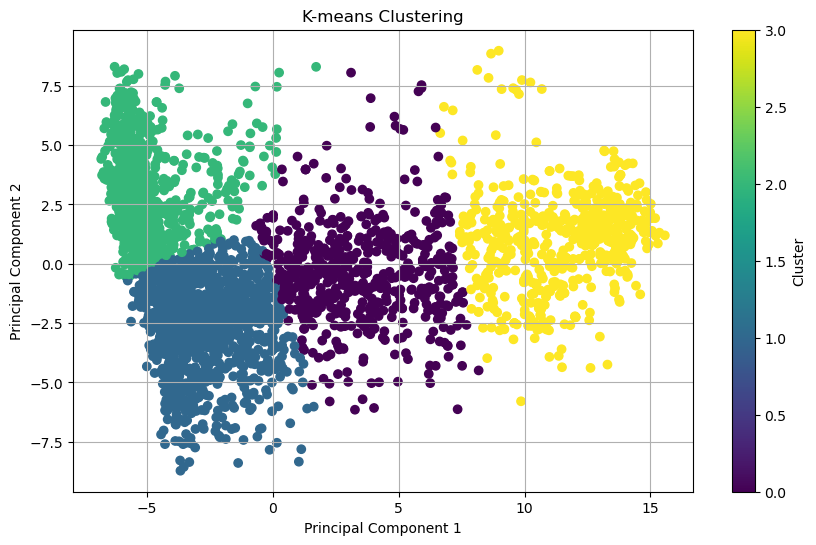

Silhouette plot for 2006:


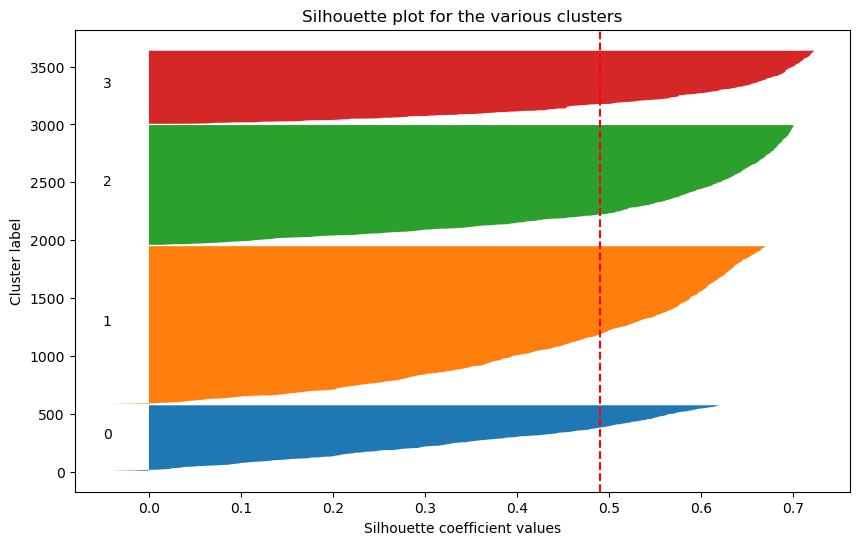


Performing K-means clustering for 2007 dataset...



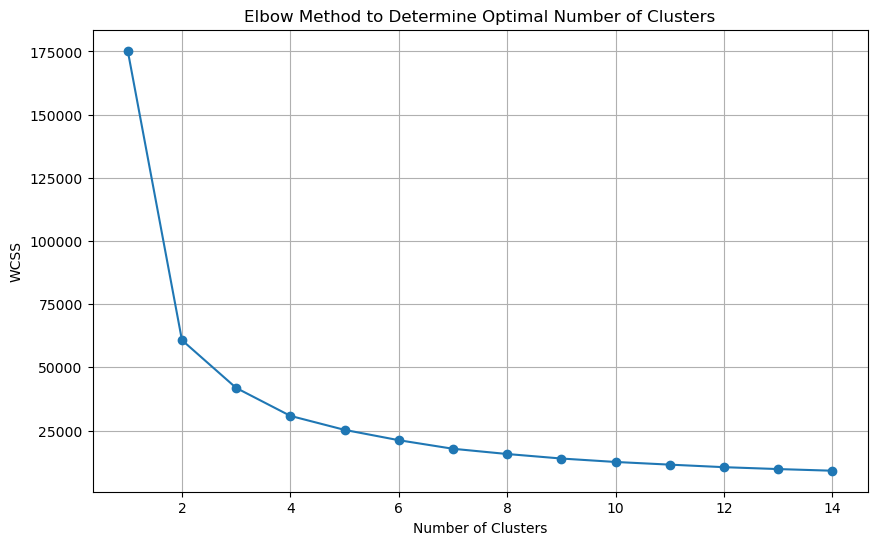

Cluster plot for 2007:


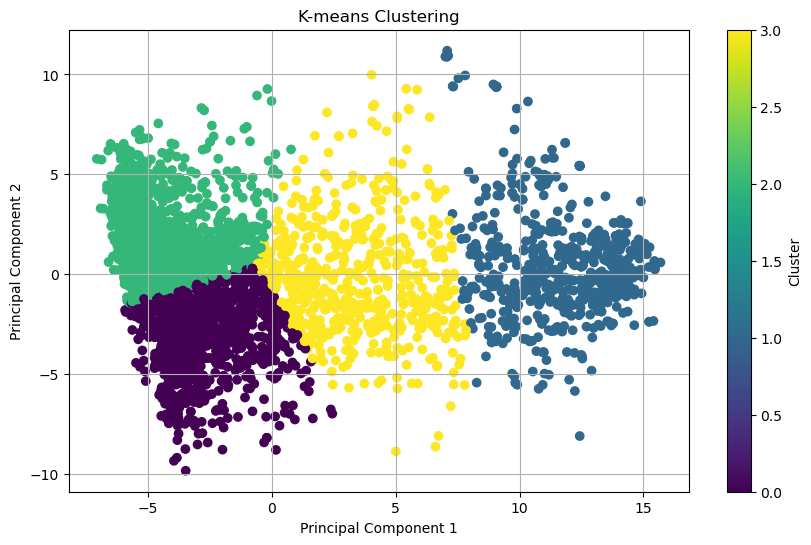

Silhouette plot for 2007:


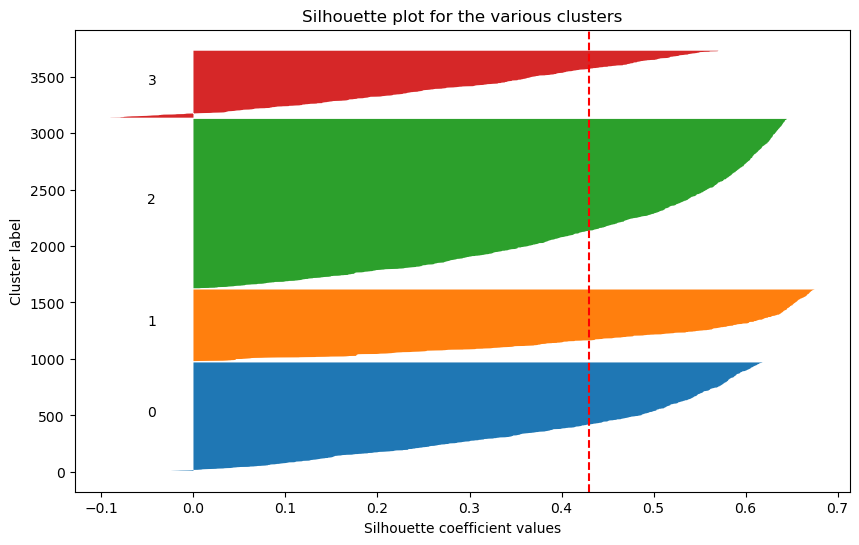


Performing K-means clustering for 2008 dataset...



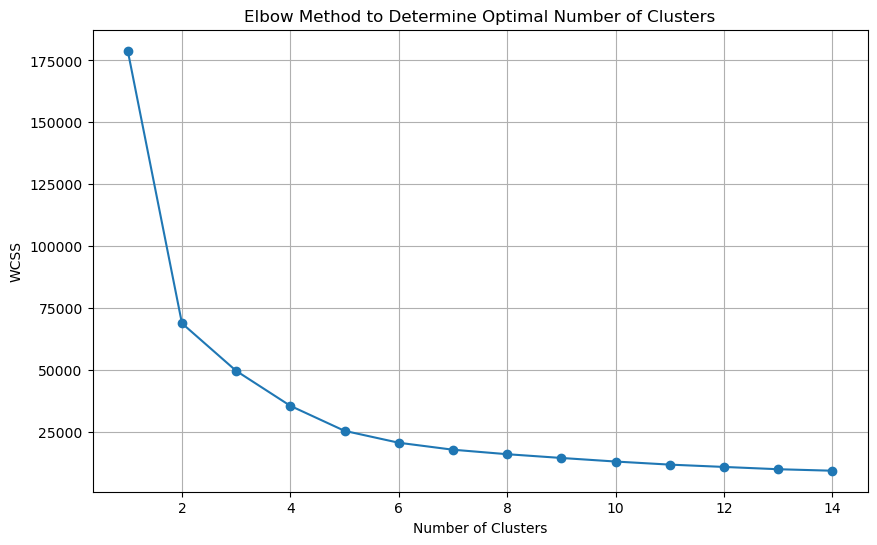

Cluster plot for 2008:


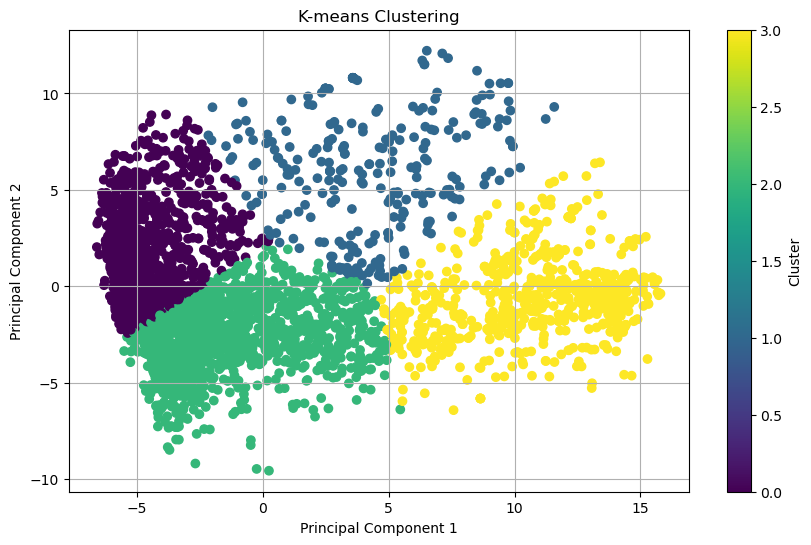

Silhouette plot for 2008:


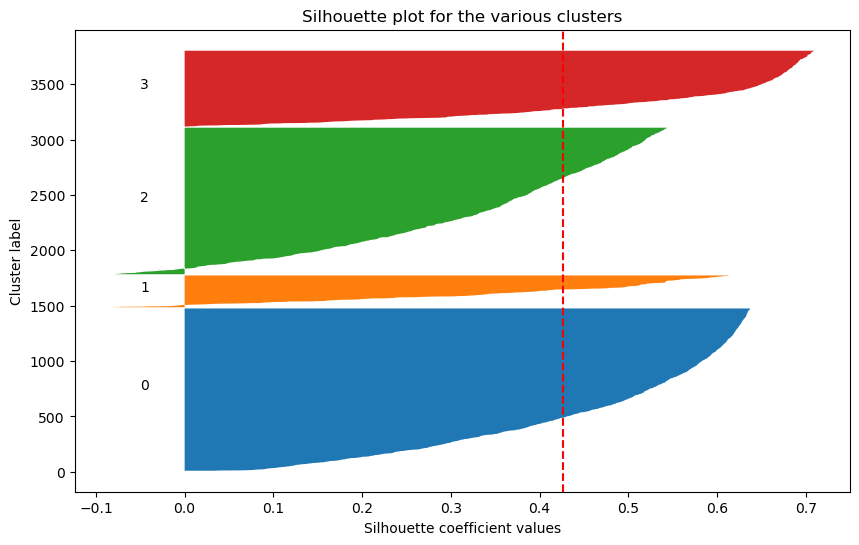


Performing K-means clustering for 2009 dataset...



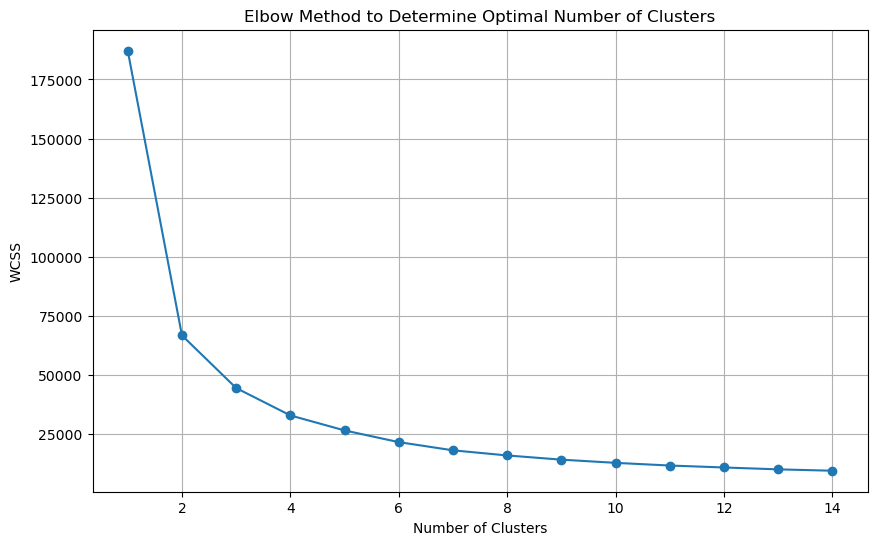

Cluster plot for 2009:


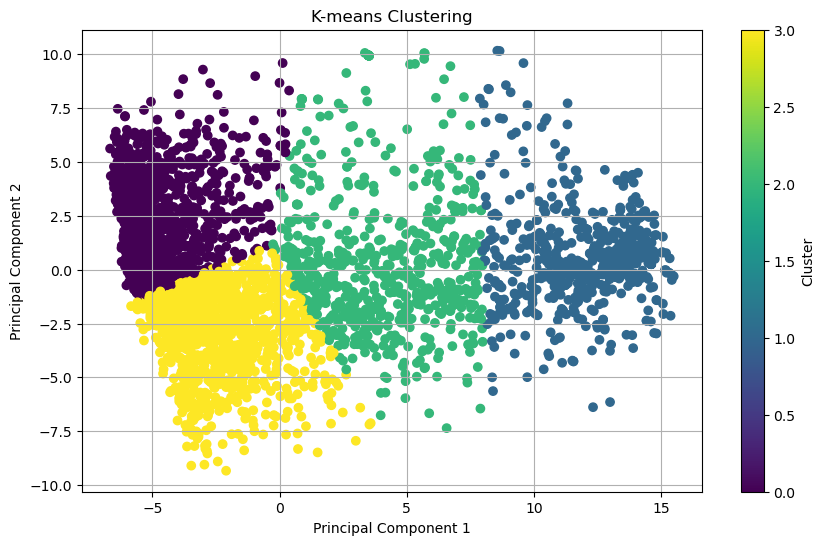

Silhouette plot for 2009:


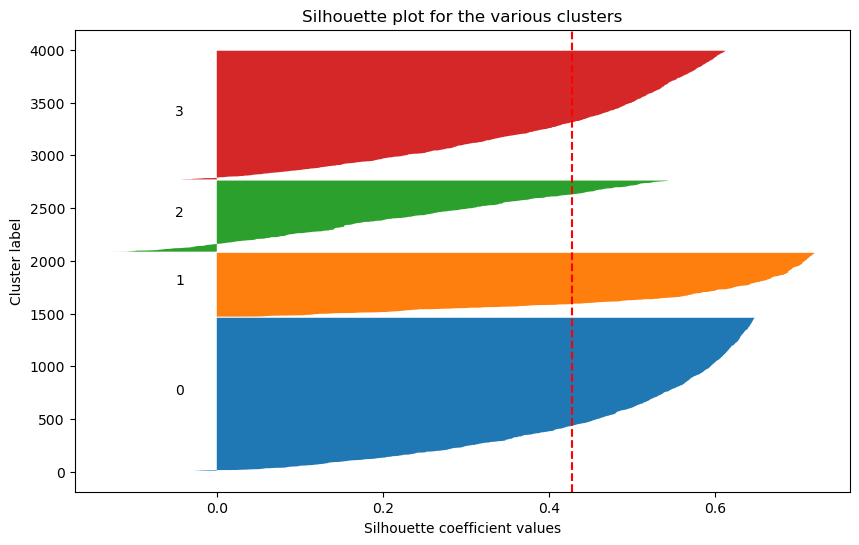


Performing K-means clustering for 2010 dataset...



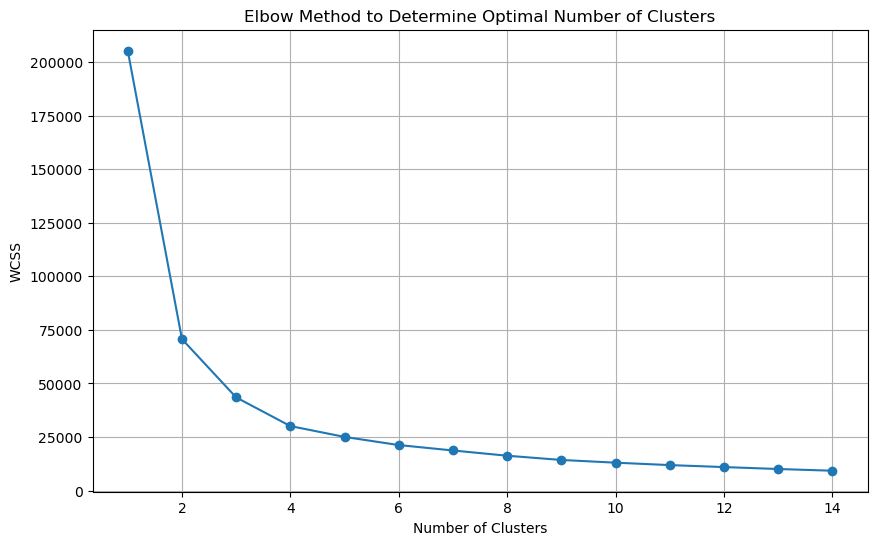

Cluster plot for 2010:


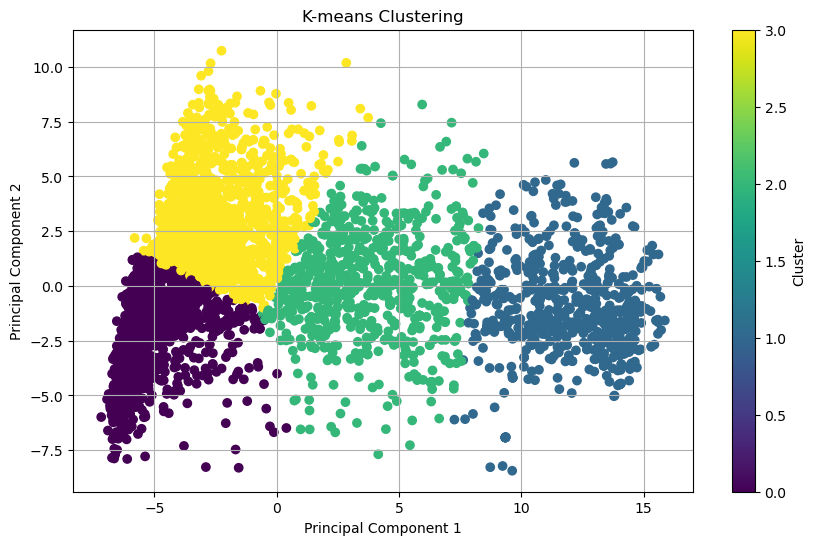

Silhouette plot for 2010:


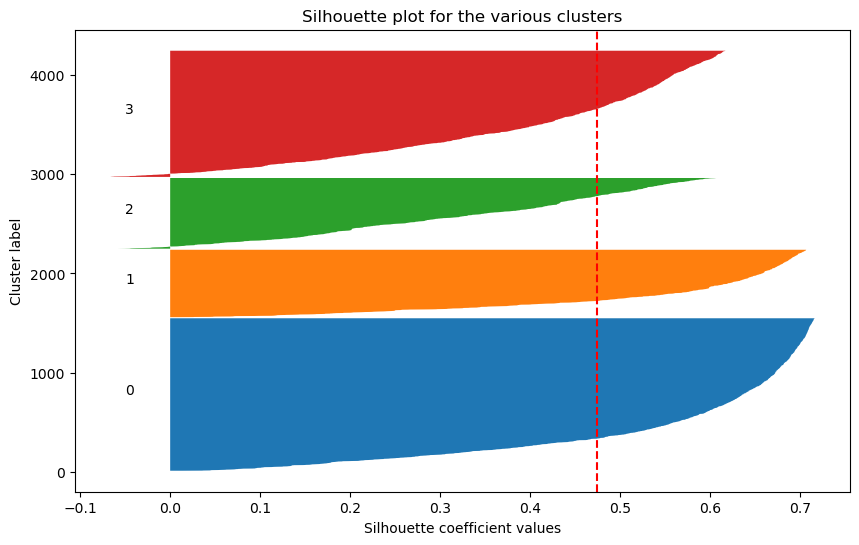


Performing K-means clustering for 2011 dataset...



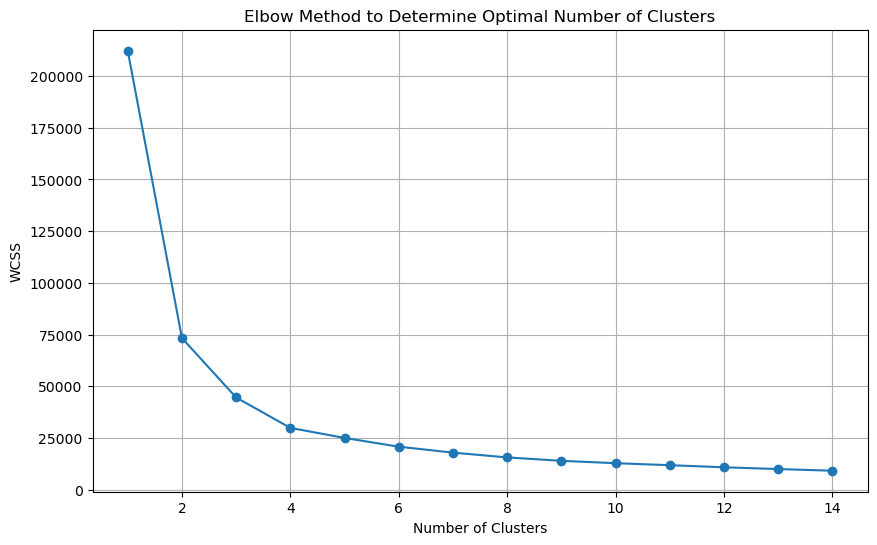

Cluster plot for 2011:


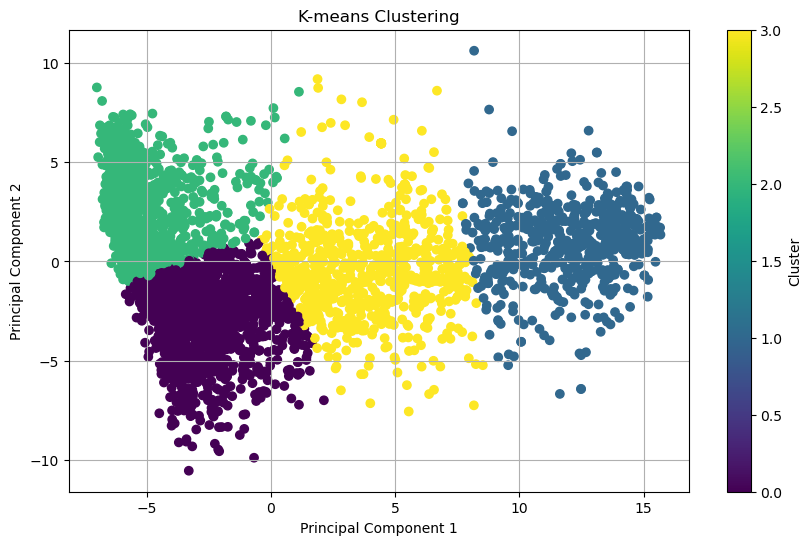

Silhouette plot for 2011:


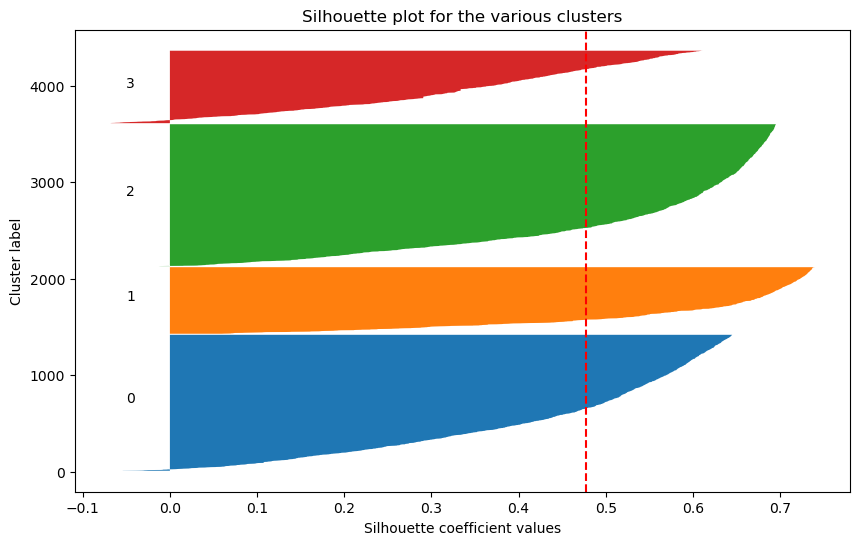


Performing K-means clustering for 2012 dataset...



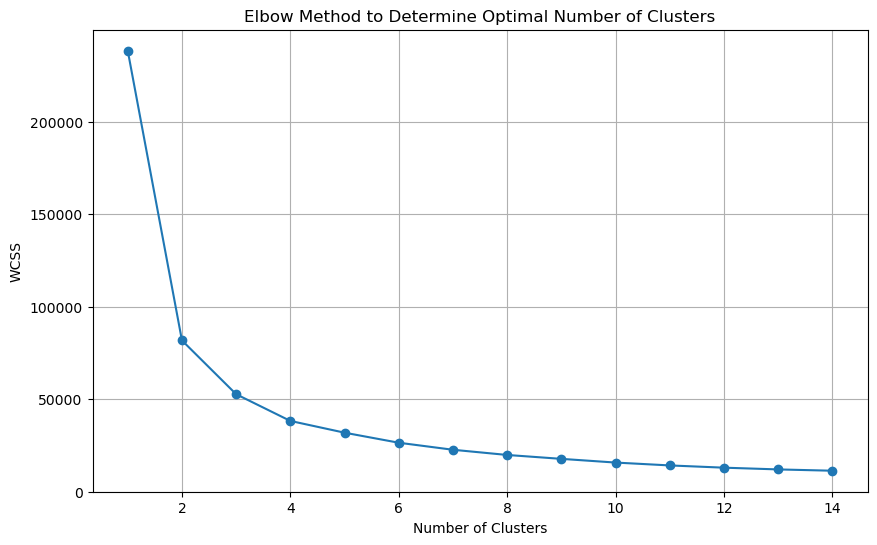

Cluster plot for 2012:


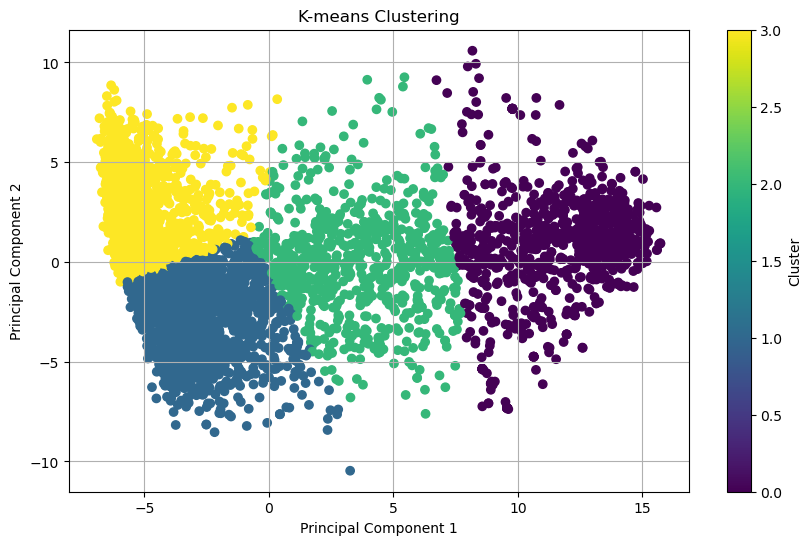

Silhouette plot for 2012:


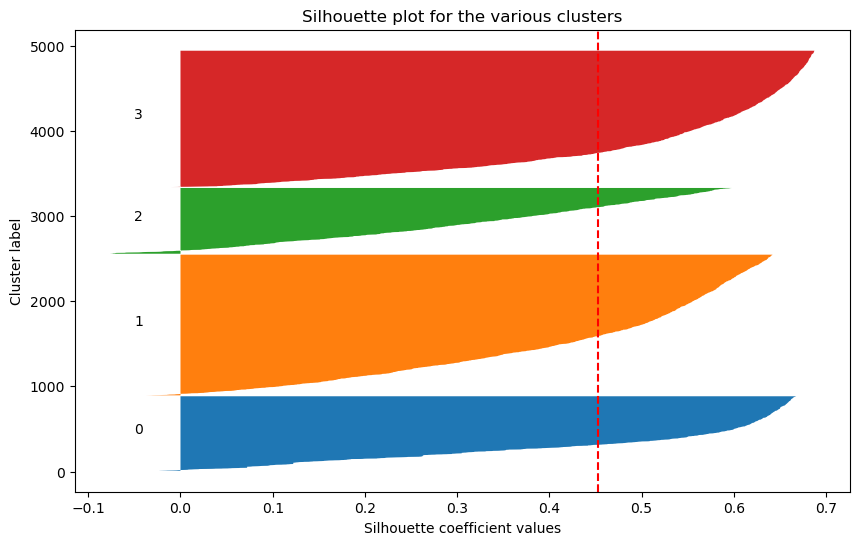


Performing K-means clustering for 2013 dataset...



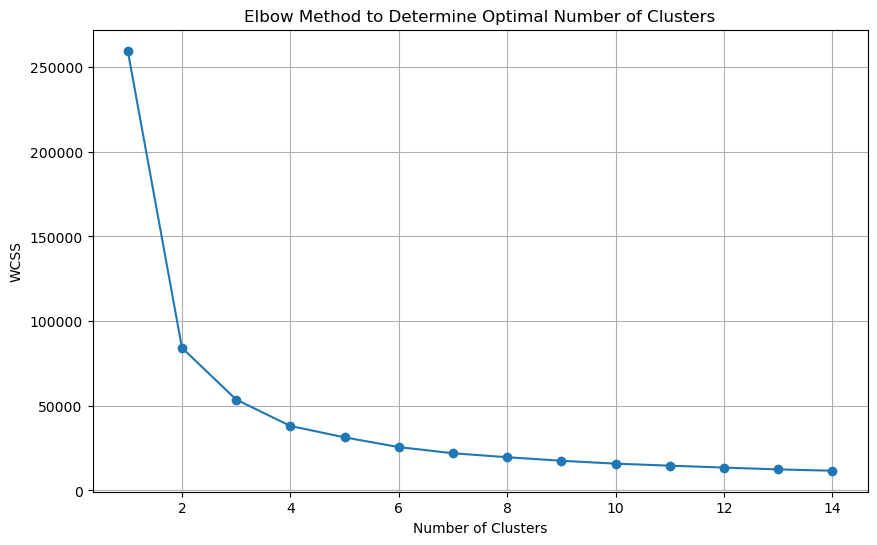

Cluster plot for 2013:


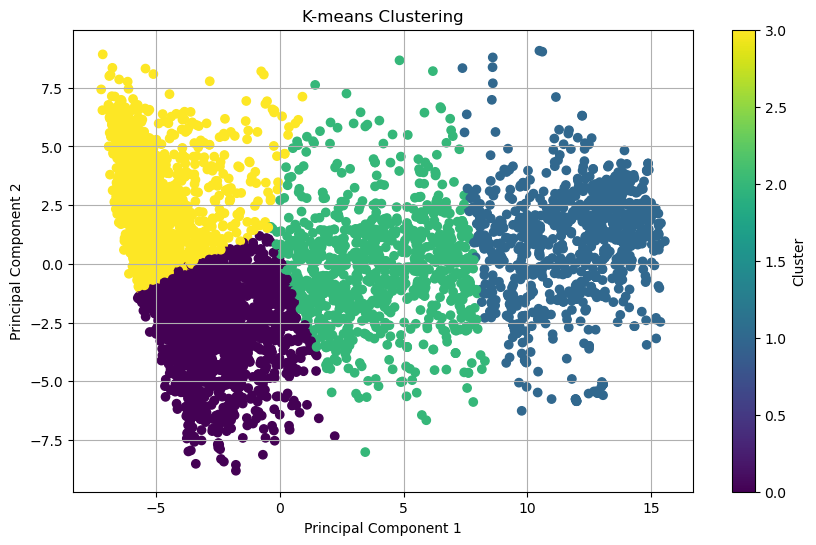

Silhouette plot for 2013:


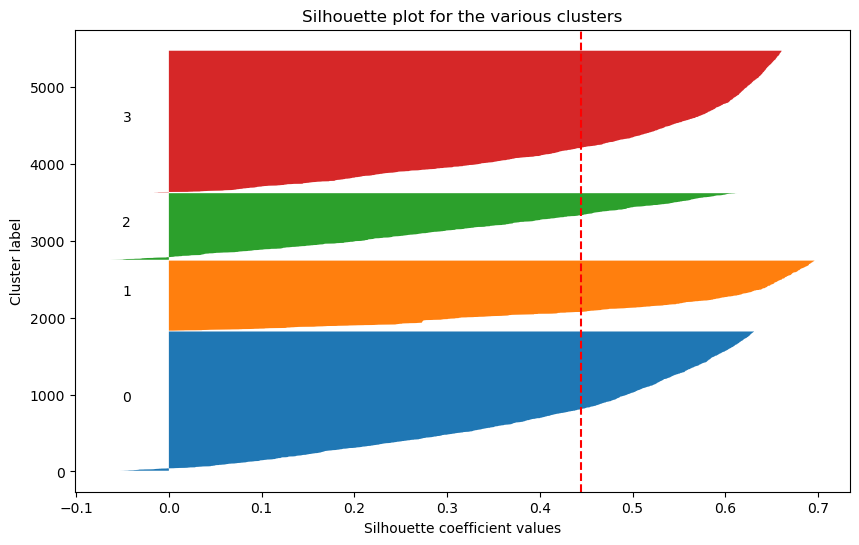


Performing K-means clustering for 2014 dataset...



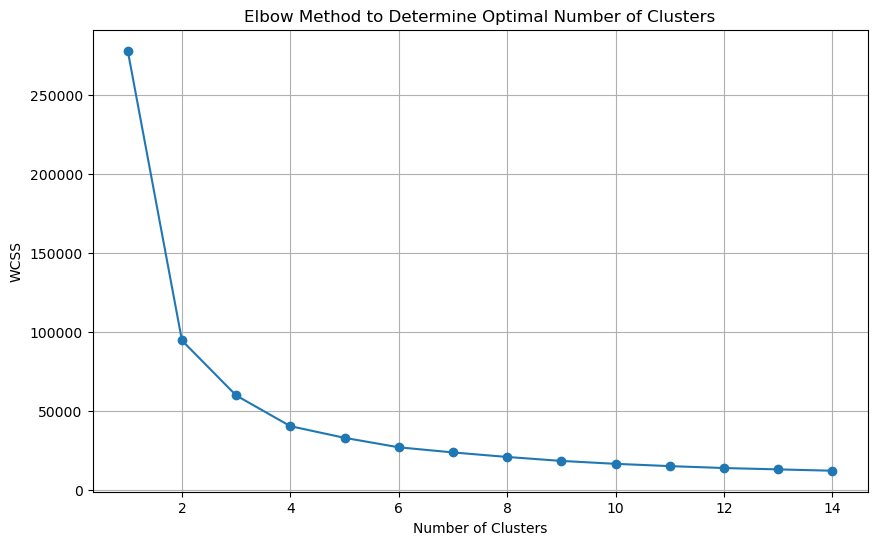

Cluster plot for 2014:


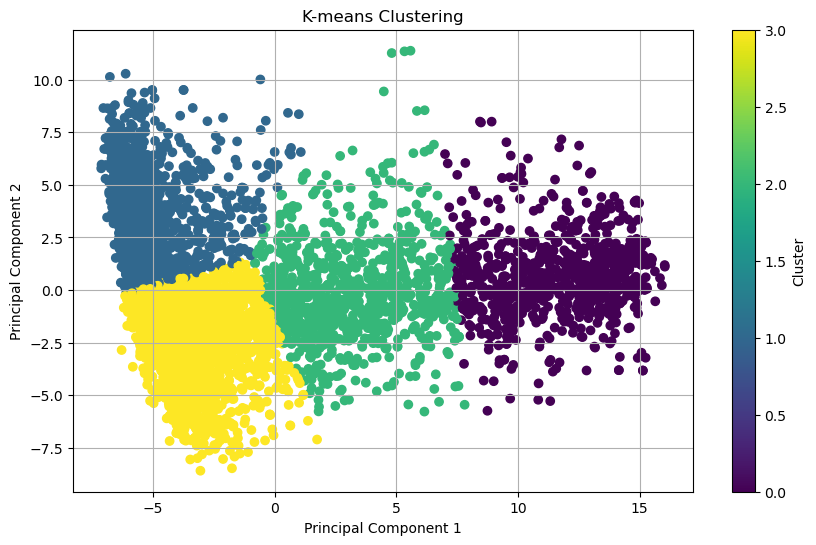

Silhouette plot for 2014:


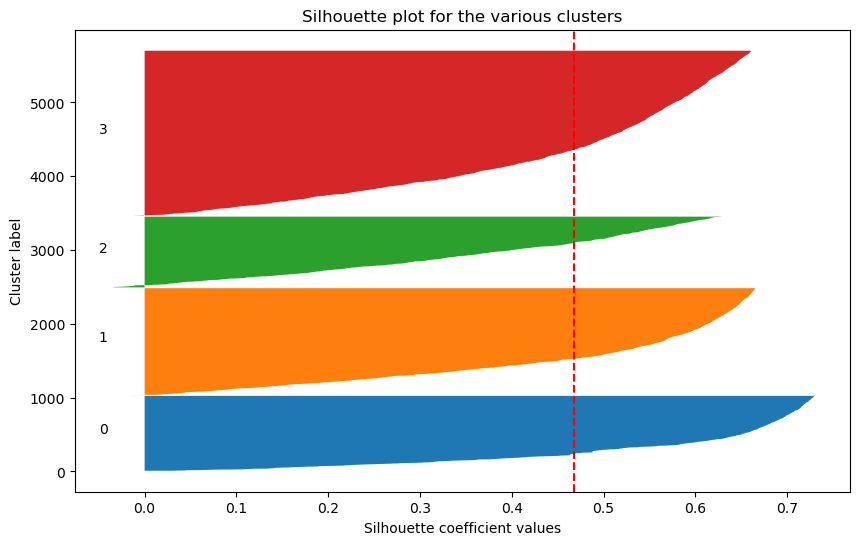


Performing K-means clustering for 2015 dataset...



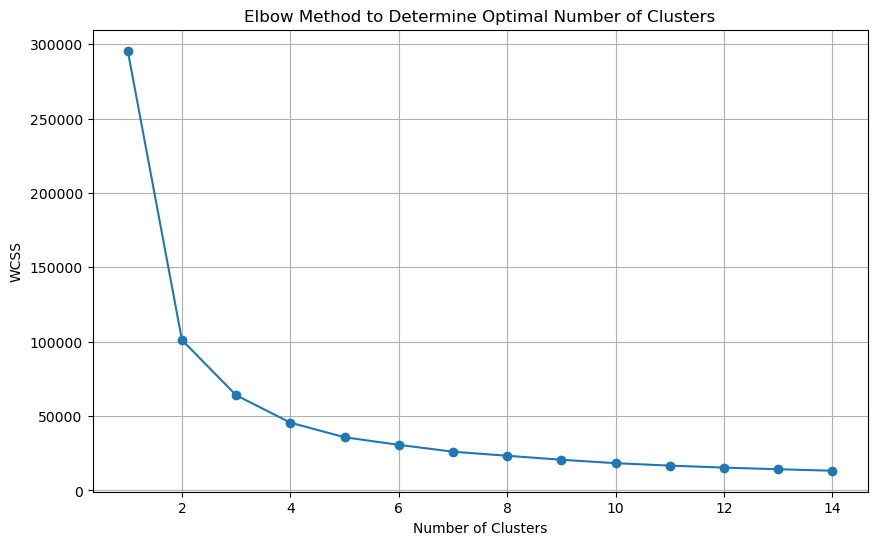

Cluster plot for 2015:


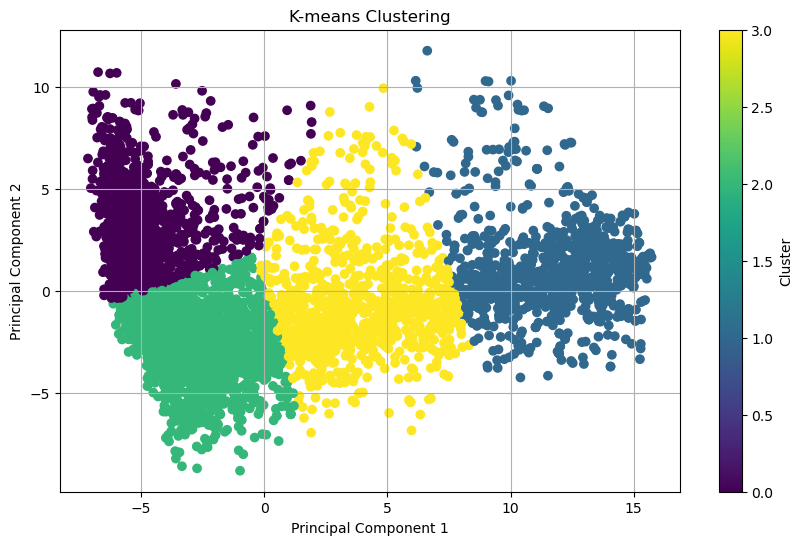

Silhouette plot for 2015:


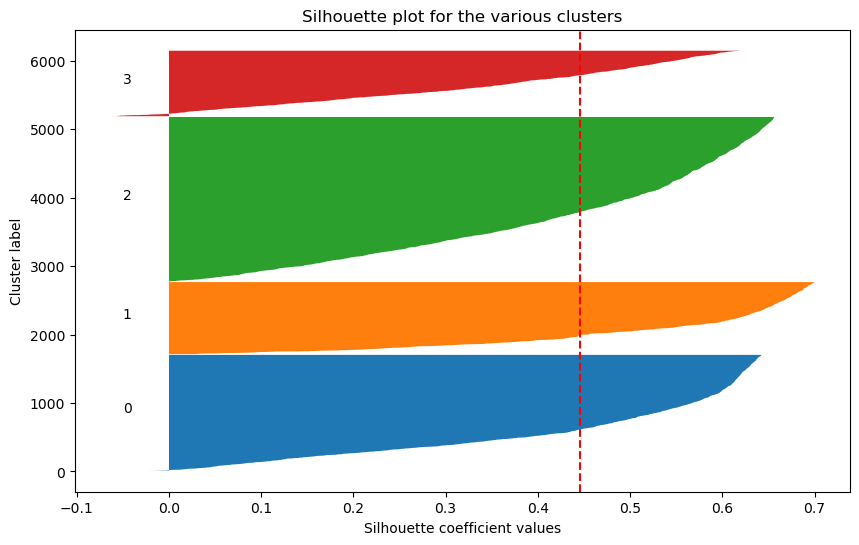


Performing K-means clustering for 2016 dataset...



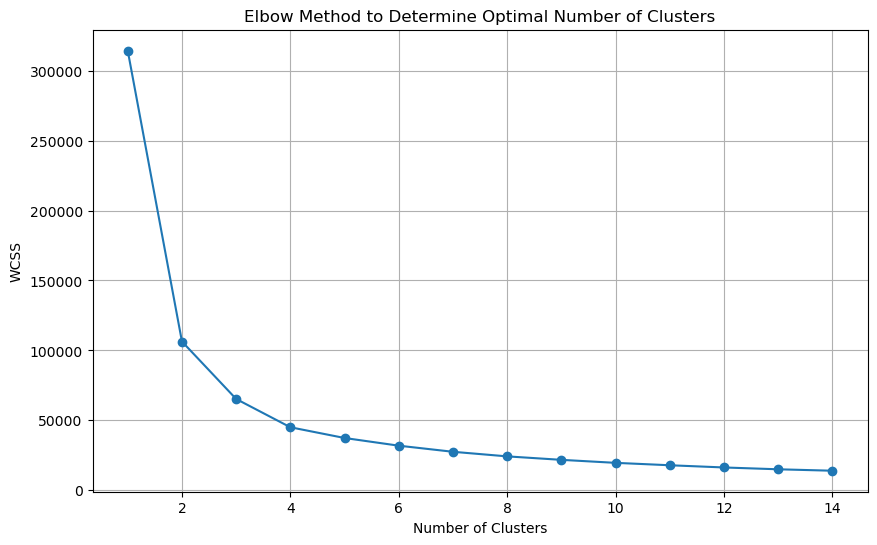

Cluster plot for 2016:


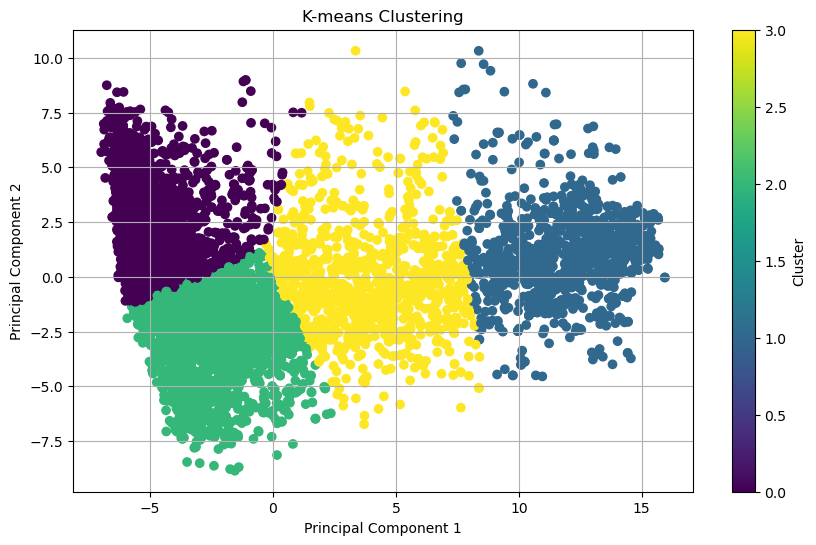

Silhouette plot for 2016:


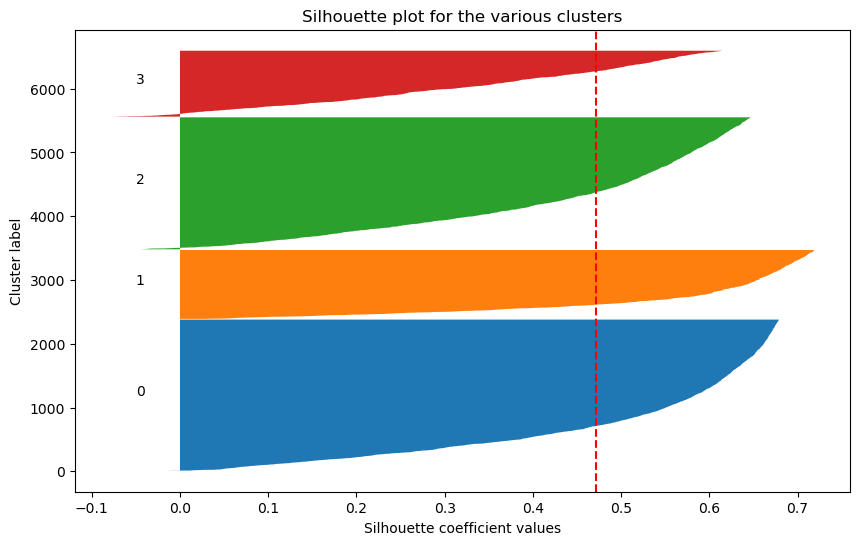


Performing K-means clustering for 2017 dataset...



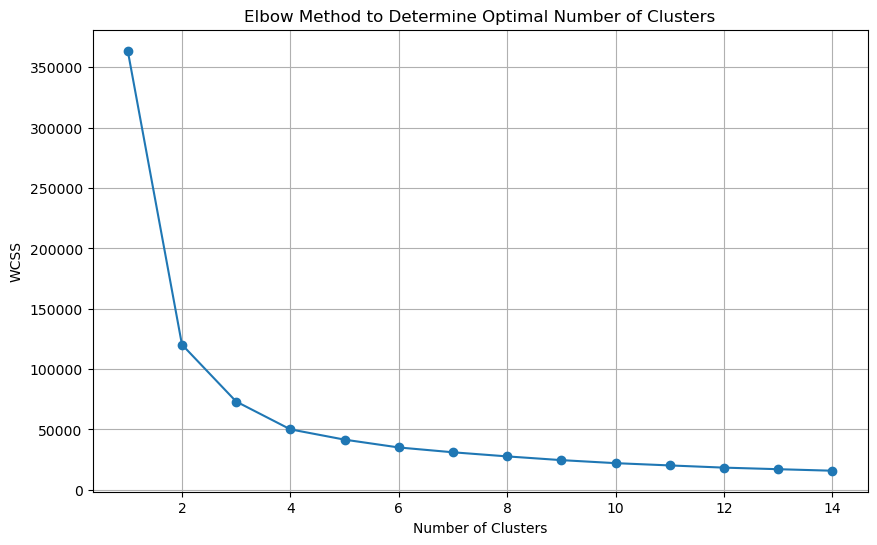

Cluster plot for 2017:


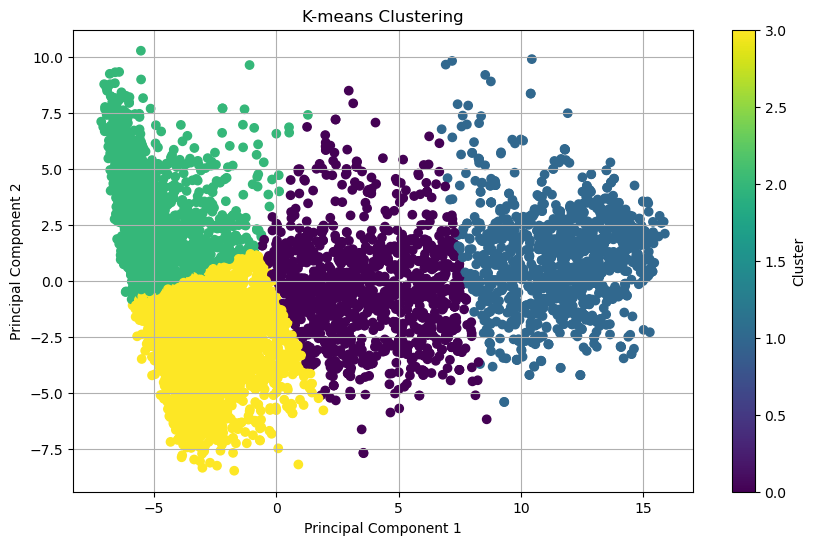

Silhouette plot for 2017:


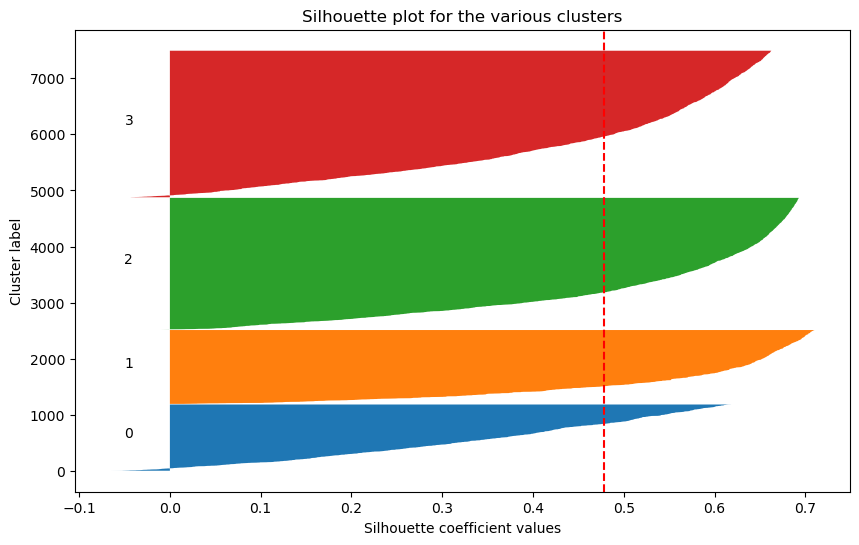


Performing K-means clustering for 2018 dataset...



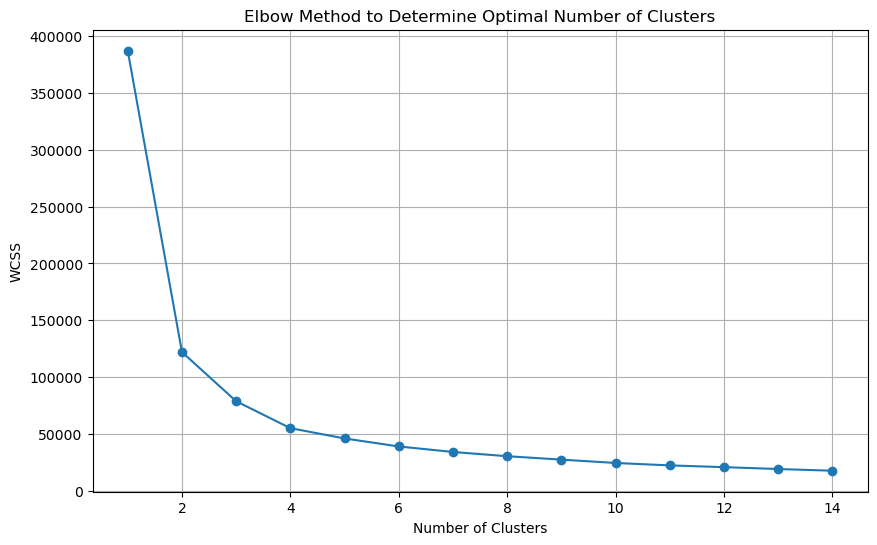

Cluster plot for 2018:


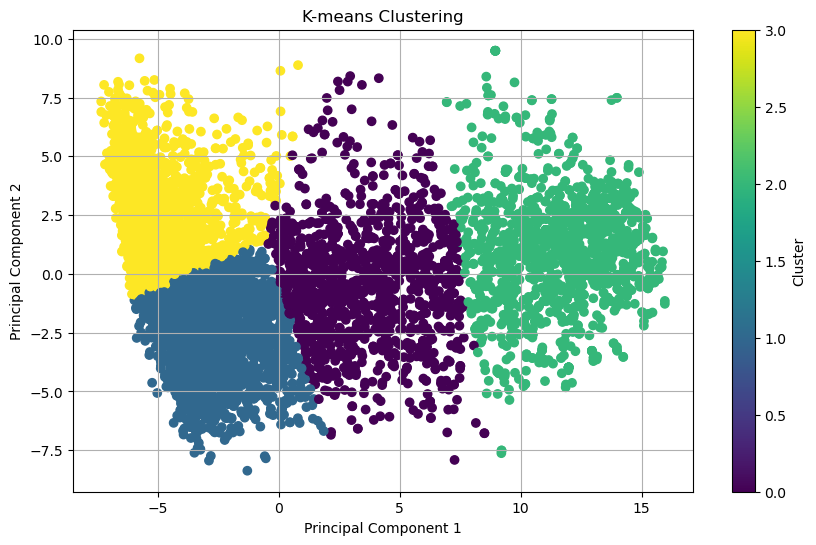

Silhouette plot for 2018:


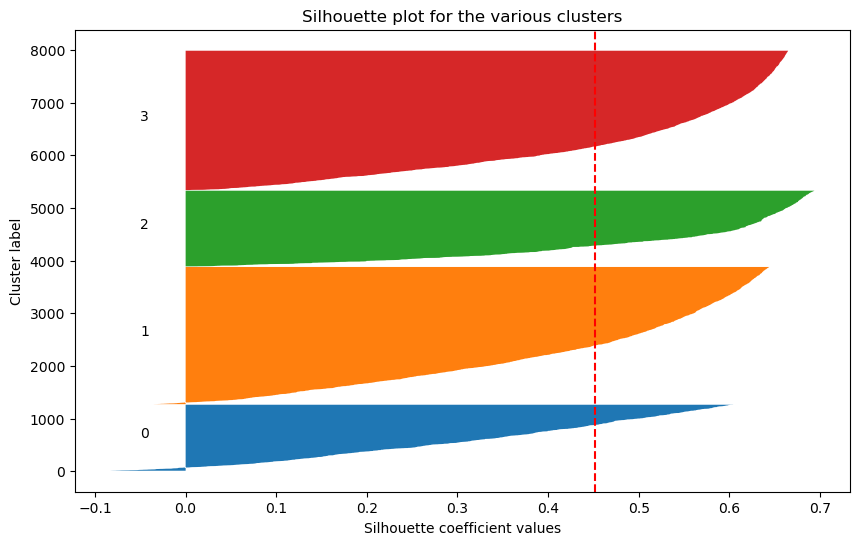


Performing K-means clustering for 2019 dataset...



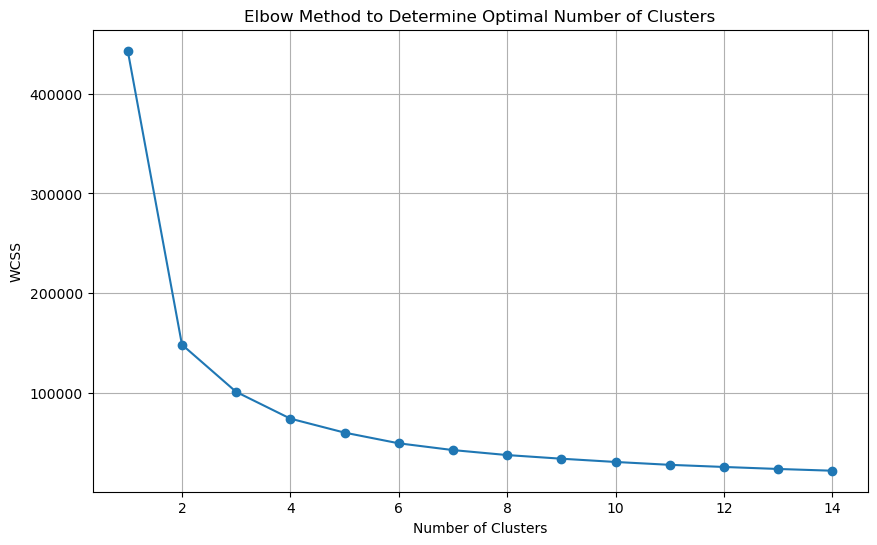

Cluster plot for 2019:


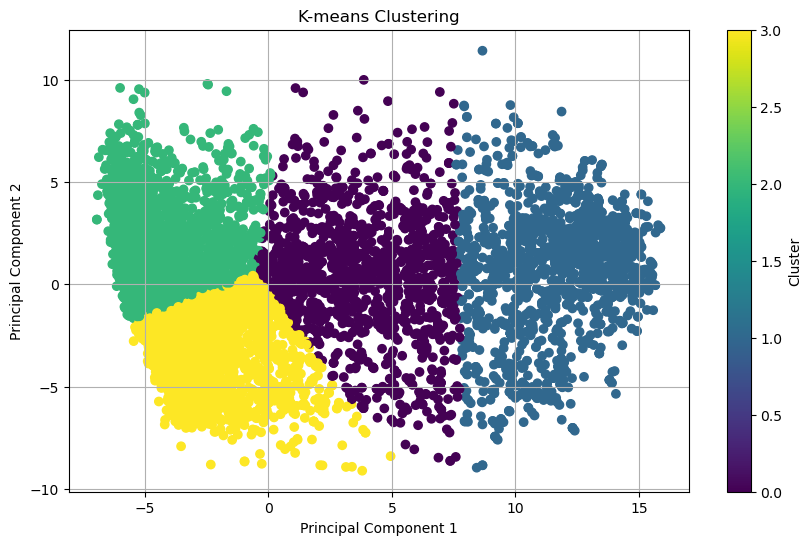

Silhouette plot for 2019:


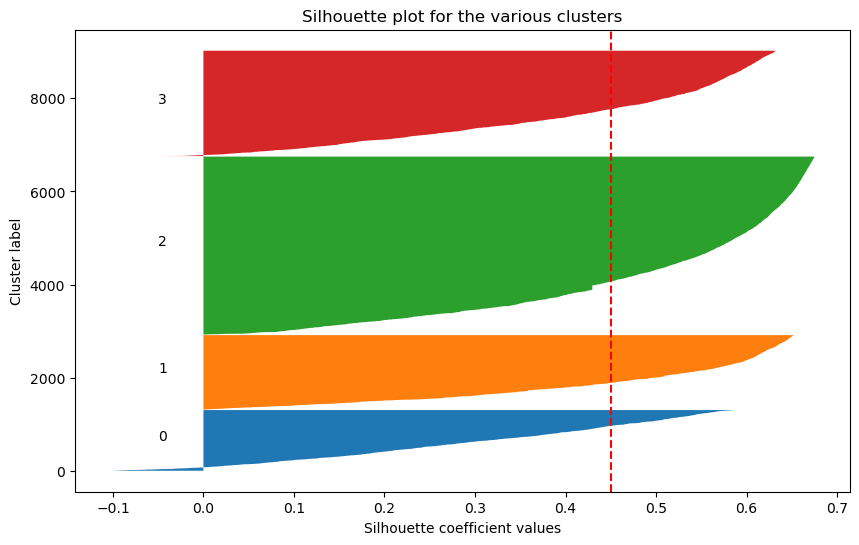


Performing K-means clustering for 2020 dataset...



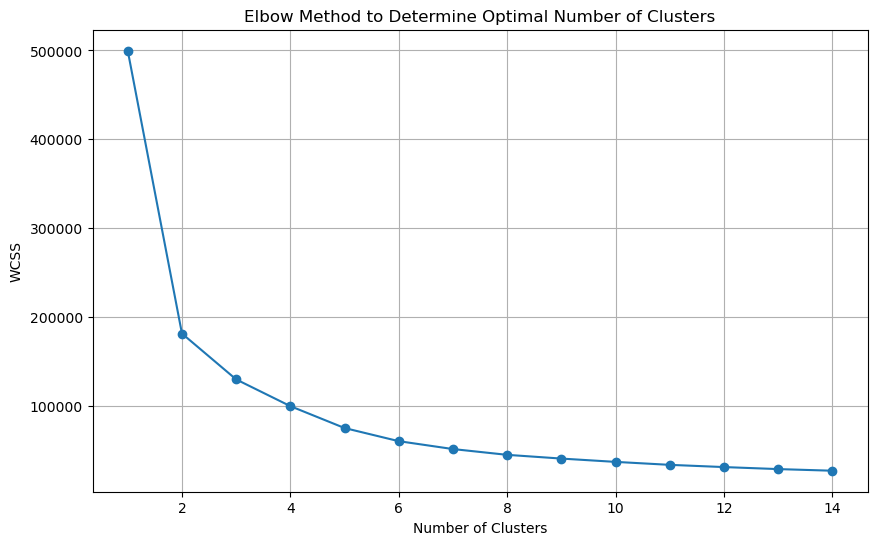

Cluster plot for 2020:


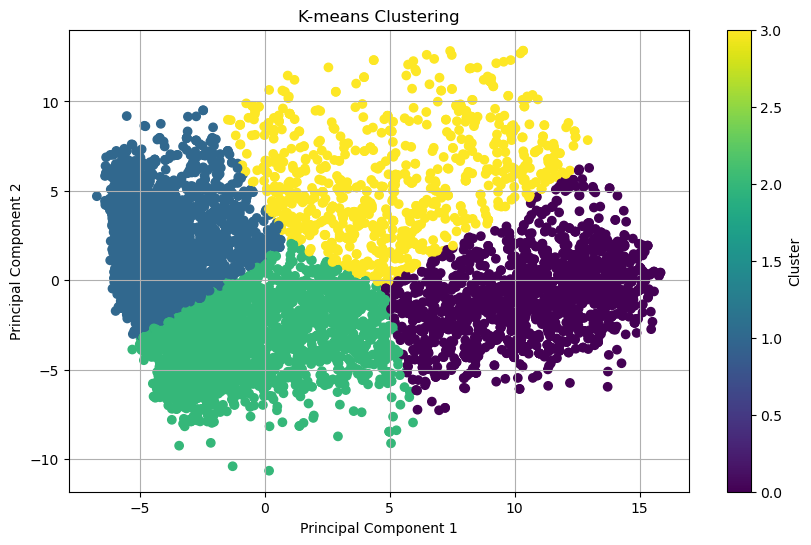

Silhouette plot for 2020:


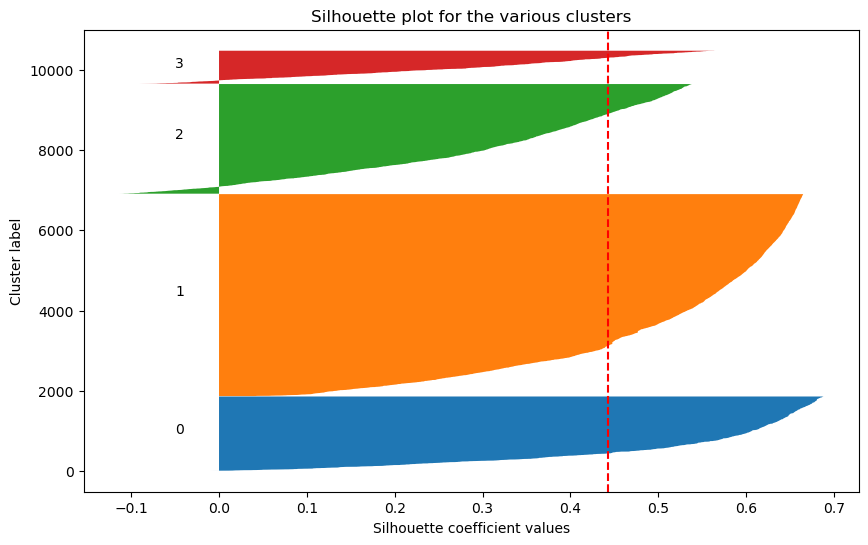


Performing K-means clustering for 2021 dataset...



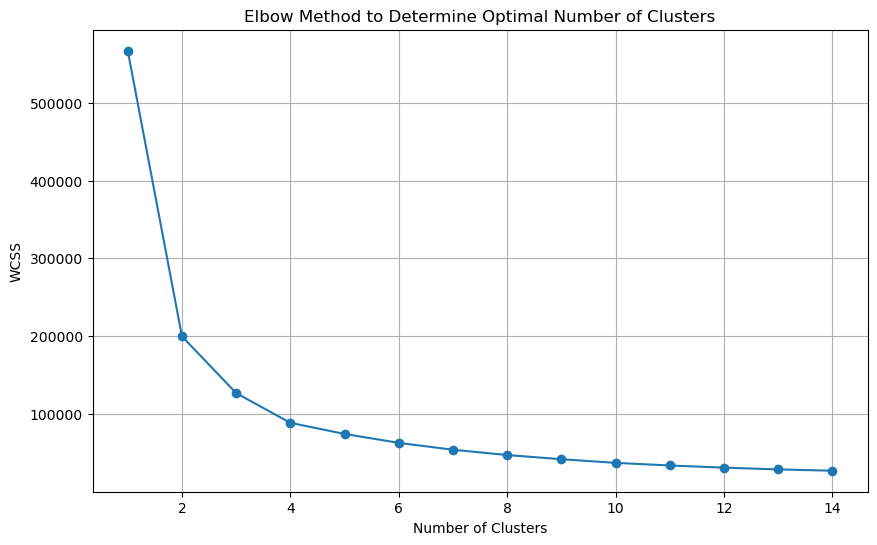

Cluster plot for 2021:


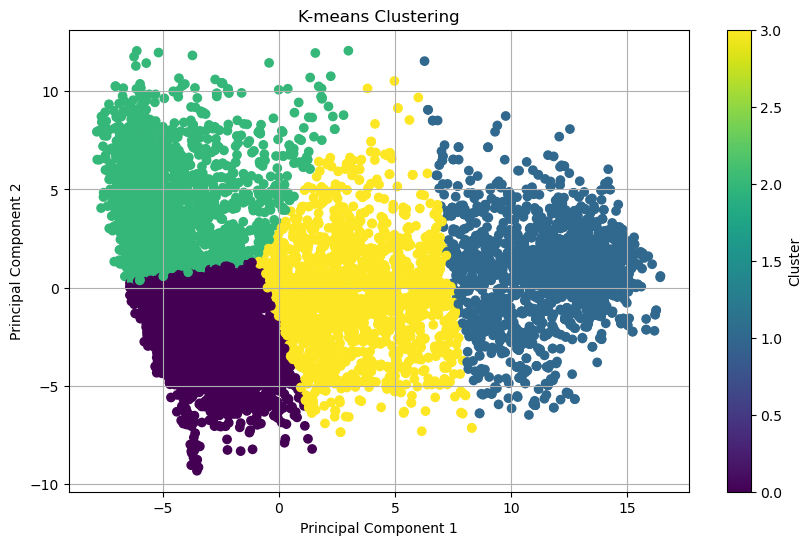

Silhouette plot for 2021:


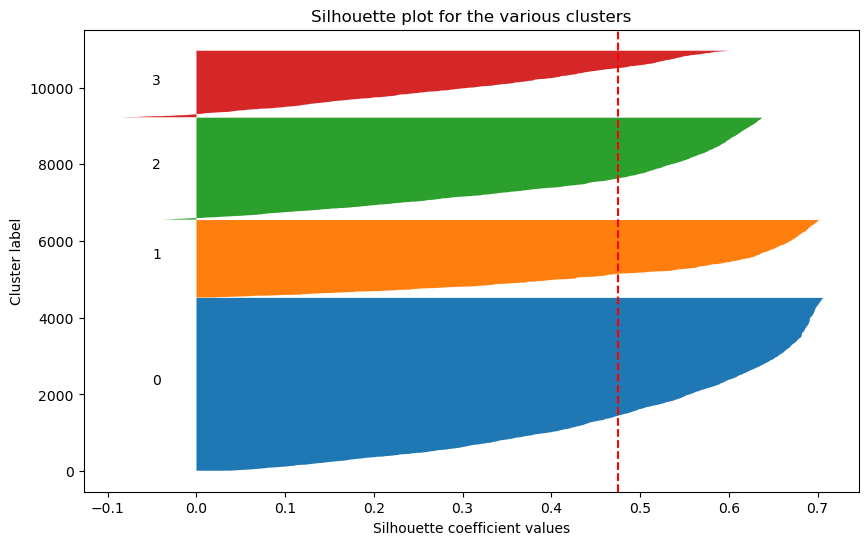


Performing K-means clustering for 2022 dataset...



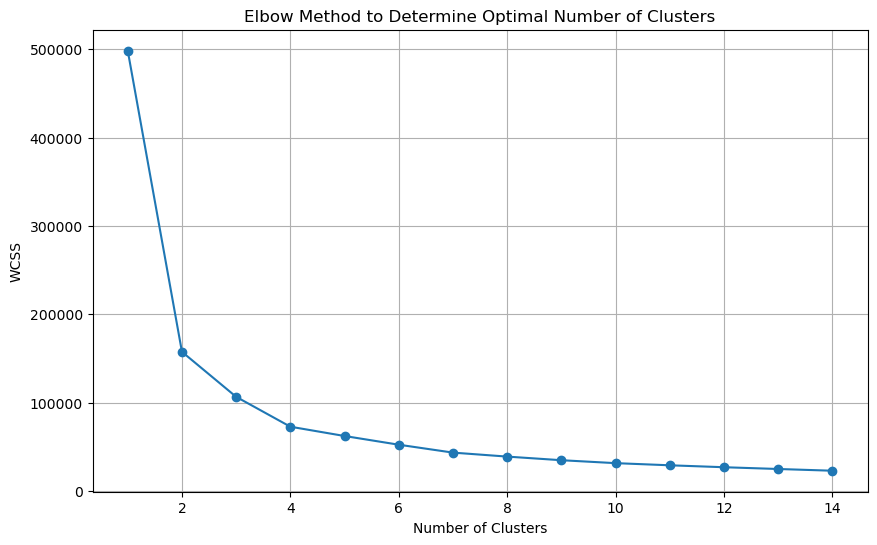

Cluster plot for 2022:


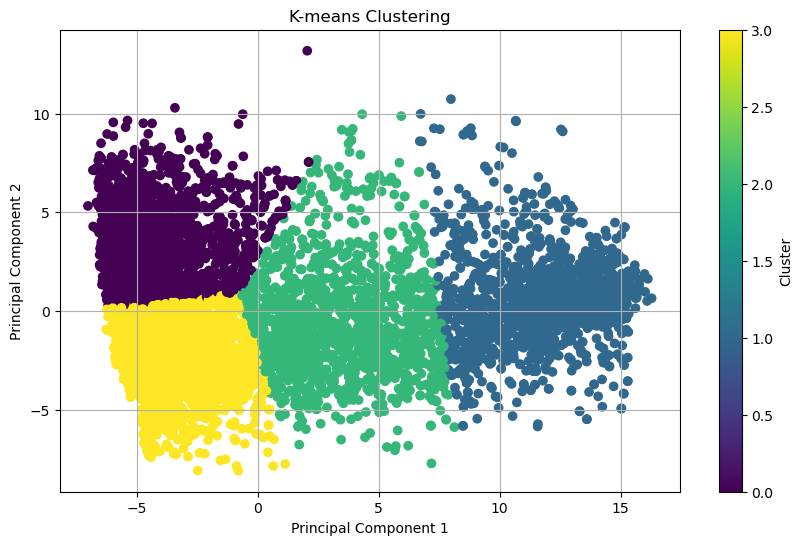

Silhouette plot for 2022:


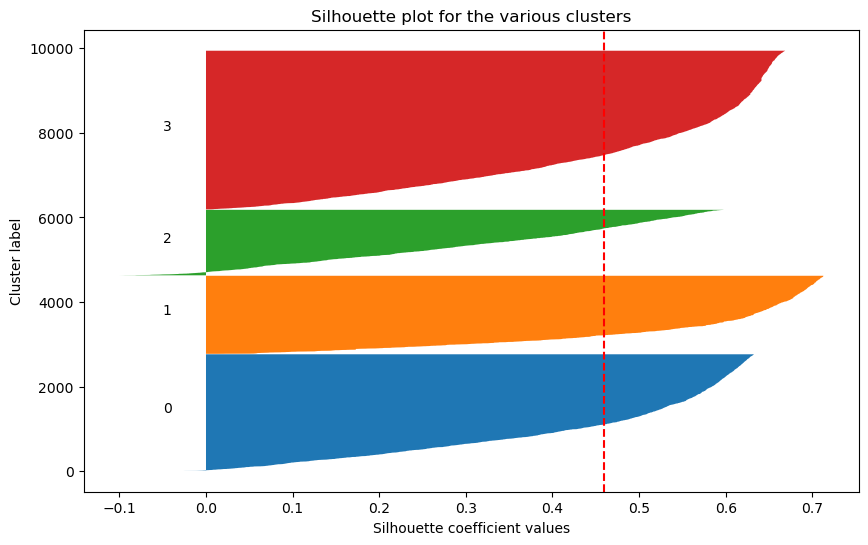


Performing K-means clustering for 2023 dataset...



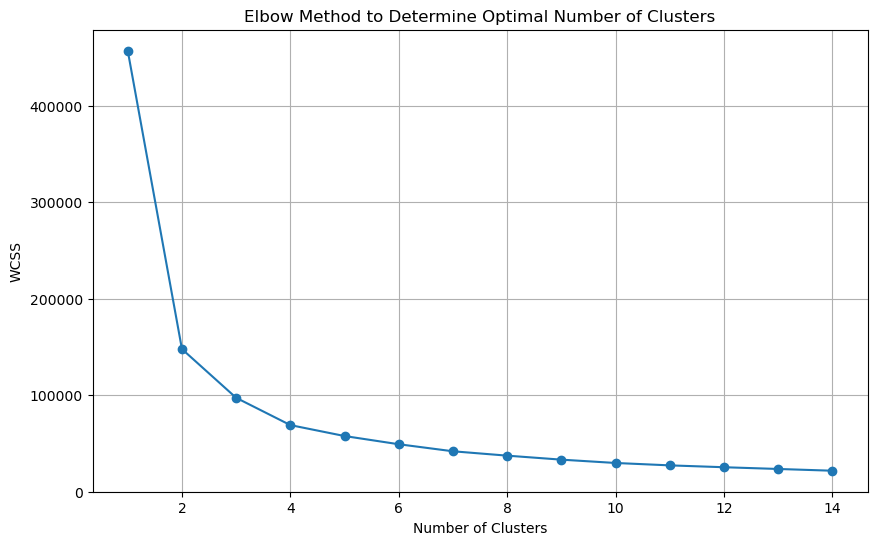

Cluster plot for 2023:


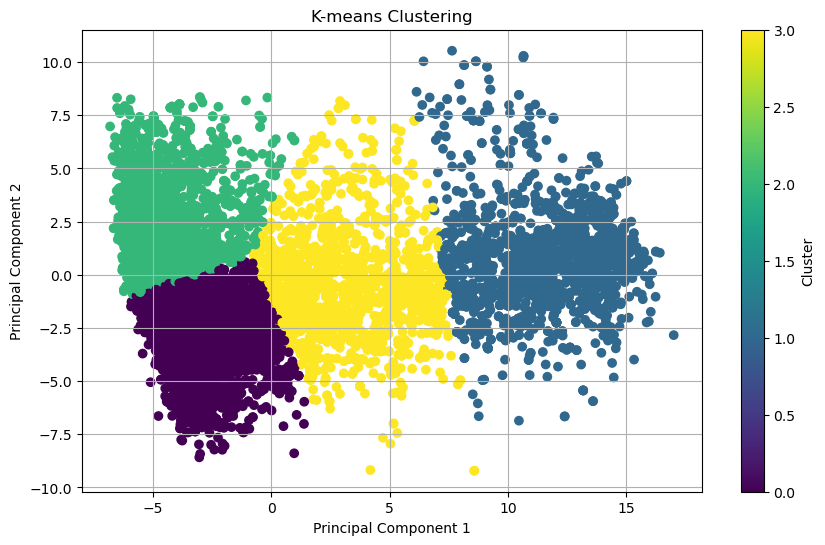

Silhouette plot for 2023:


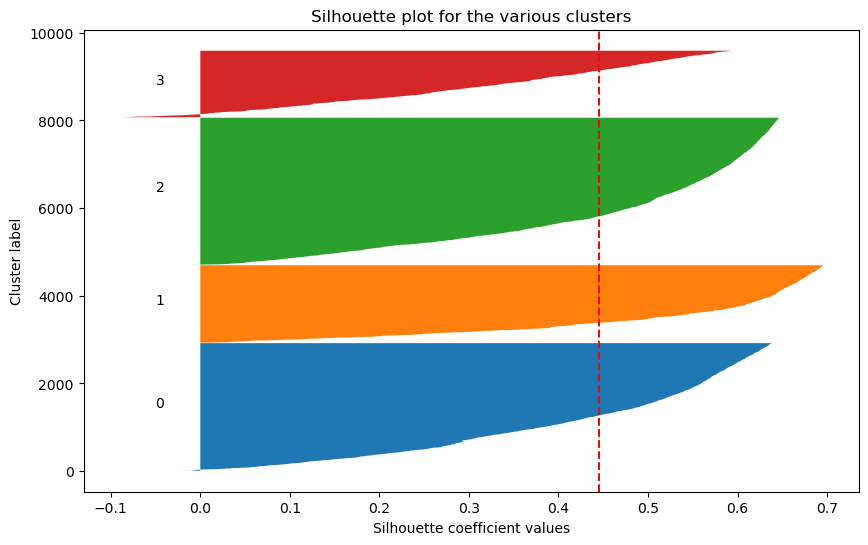

In [18]:
# Loop through each dataset and perform K-means clustering analysis
clustering_results = {}

for year, df in full_df.items():
    try:
        print(f"\nPerforming K-means clustering for {year} dataset...\n")
        
        # Perform K-means clustering analysis
        clusters, cluster_plot, silhouette_avg, silhouette_values = kmeans_clustering_analysis(df)
        
        # Store the clustering results
        clustering_results[year] = {
            'clusters': clusters,
            'cluster_plot': cluster_plot,
            'silhouette_avg': silhouette_avg,
            'silhouette_values': silhouette_values
        }
        
        # Display the cluster plot
        print(f"Cluster plot for {year}:")
        cluster_plot.show()
        plt.close()  # Close the figure to avoid too many open figures

        # Plot silhouette scores
        print(f"Silhouette plot for {year}:")
        plot_silhouette_scores(clusters, silhouette_values, num_clusters=4, silhouette_avg=silhouette_avg)

    except Exception as e:
        print(f"Error performing clustering analysis on {year}: {e}")


### Clustering Analysis Process
1. We applied K-means clustering to datasets spanning from the year 2000 to 2023.
2. For each year, we conducted clustering using K-means, selecting 2 clusters per dataset for simplicity and clear interpretability.
3. Silhouette analysis was performed alongside the clustering to evaluate the quality of the clusters.
4. Cluster plots and silhouette plots were generated for visual analysis to assess how well the data points grouped into clusters.


### Conclusions from the Clustering Analysis
1. **Clustering Effectiveness**: The silhouette plots for each year provide insight into the clustering quality. A higher silhouette score indicates better-defined clusters, whereas lower scores suggest overlapping or less distinct clusters. From the silhouette plots, we observe variability in clustering quality across different years.
  
2. **Cluster Separation**: In years such as 2002 and 2003, the silhouette scores were relatively high, implying well-separated clusters. However, in other years like 2007 and 2009, the clusters showed less distinct separation, as reflected in the silhouette scores, indicating potential overlap between clusters (could it be because of 2008 crisis?).

3. **Cluster Composition**: The cluster plots reveal some consistent patterns, such as the presence of well-defined clusters based on key financial variables. These clusters may suggest meaningful groupings of companies that exhibit similar financial behaviors during certain periods, potentially indicating economic cycles or market conditions.

## 3. Target Variable Engineering

In this step, we will create a new **target variable** that identifies stocks that outperform the S&P 500 by more than 2%. Target variable engineering is critical in defining the outcome we want to predict and helps align the model’s learning process with our project’s goal of selecting high-performing stocks.

#### Why Target Variable Engineering?

- **Align with the Project Goal**: The ultimate objective of this project is to build a portfolio of stocks that consistently beats the market. By creating a target variable that reflects stocks outperforming the S&P 500 by more than 2%, we focus the model’s learning on identifying those high-value stocks.
- **Simplify the Prediction Task**: By defining a clear target (outperformance of 2% over the S&P 500), we make the prediction task binary (outperform vs. not outperform), which can improve model accuracy and interpretability.
- **Improve Model Focus**: With a well-defined target, the model will be better able to focus on stocks with the highest potential for positive returns, helping us achieve the goal of beating the market.

#### Steps:
1. **Calculate S&P 500 Performance**: We will use historical data to calculate the S&P 500 returns for the same time period as the stocks in the dataset.
2. **Compare Stock Performance to S&P 500**: For each stock, we will compare its annual performance to the S&P 500. If a stock's performance exceeds the S&P 500 by more than 2%, it will be labeled as a **1** (outperform). Otherwise, it will be labeled as **0** (underperform).
3. **Create the Binary Target Variable**: The target variable will be a binary feature, where 1 represents stocks that outperform the S&P 500 by more than 2%, and 0 represents stocks that do not.

By engineering this target variable, we create a clear objective for the model to focus on: selecting stocks with the highest potential to outperform the market by a significant margin.


In [24]:
# Function to get annual returns for the S&P 500 from Yahoo Finance
def get_sp500_returns(start_year, end_year):
    sp500 = yf.Ticker("^GSPC")
    # Fetch data starting from the year before the first year to calculate percentage change correctly
    sp500_data = sp500.history(period="1d", start=f"{start_year-1}-01-01", end=f"{end_year}-12-31")
    
    # Calculate the annual returns for each year
    sp500_annual_returns = sp500_data['Close'].resample('Y').ffill().pct_change() * 100  # Convert to percentage
    sp500_annual_returns.index = sp500_annual_returns.index.year  # Change index to just the year
    
    # Drop the first year (start_year - 1), as we only care about returns starting from the first full year
    sp500_annual_returns = sp500_annual_returns.loc[start_year:]
    
    return sp500_annual_returns

# Fetch S&P 500 annual returns from 2000 to 2024 (starting from 2000 to calculate the percentage change)
sp500_returns = get_sp500_returns(2000, 2024)

# Define the outperformance threshold and initialize a list to hold all dataframes
outperformance_threshold = 2
all_dfs = []

# Collect all unique sectors across the datasets
all_sectors = set()
for year, df in full_df.items():
    if 'sector' in df.columns:
        all_sectors.update(df['sector'].fillna('Unknown').unique())

all_sectors = sorted(all_sectors)
print(f"All unique sectors across datasets: {all_sectors}")

# Process each year's dataset
for year, df in full_df.items():
    print(f"\nProcessing dataset for {year}...")

    # Fill missing values in 'sector' with 'Unknown'
    if 'sector' in df.columns:
        df['sector'] = df['sector'].fillna('Unknown')
    
    # Calculate the corresponding S&P 500 return
    next_year = int(year) + 1
    if next_year in sp500_returns.index:
        sp500_return = sp500_returns[next_year]
        target_threshold = sp500_return + outperformance_threshold
        
        # Check if 'PRICE VAR [%]' exists and create 'Outperform'
        if 'PRICE VAR [%]' in df.columns:
            df['Outperform'] = np.where(df['PRICE VAR [%]'] > target_threshold, 1, 0)
        else:
            print(f"'PRICE VAR [%]' column missing for {year}, skipping target creation.")
        
        # Convert 'sector' to dummy variables
        if 'sector' in df.columns:
            sector_dummies = pd.get_dummies(df['sector'], prefix='Sector')
            
            # Ensure all sectors are present, adding missing ones as columns filled with 0
            for sector in all_sectors:
                if f"Sector_{sector}" not in sector_dummies.columns:
                    sector_dummies[f"Sector_{sector}"] = 0
                
            # Ensure all sector dummy variables are either 0 or 1 (convert False/True)
            sector_dummies = sector_dummies.astype(int)
            
            df = pd.concat([df, sector_dummies], axis=1).drop(columns=['sector'])
        
        # Drop specified columns
        columns_to_drop = ['country', 'ipoDate', 'isEtf', 'isFund', 'isAdr', 'industry']
        df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
        
        # Fill NaN values in the dataset with 0
        df = df.fillna(0)
        
        # Check for any remaining NaN values after processing
        print(f"Remaining missing values in {year} after processing:")
        print(df.isna().sum())
        
        # Append the processed dataframe to the list
        all_dfs.append(df)
    else:
        print(f"S&P 500 return data for {next_year} not available.")

# Merge all datasets into one
merged_df = pd.concat(all_dfs, ignore_index=True)

# Define the output path
output_path = f"data/cleaned_data/modeling_data/full_Financial_Data_for_modeling.csv"

# Save the merged dataset to the specified output path
os.makedirs(os.path.dirname(output_path), exist_ok=True)
merged_df.to_csv(output_path, index=False)

print(f"Saved merged dataset with target variable and dummy variables to {output_path}")

# Preview the first 50 rows of the merged dataset
merged_df.head(50)

/tmp/ipykernel_4837/197539636.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sp500_annual_returns = sp500_data['Close'].resample('Y').ffill().pct_change() * 100  # Convert to percentage


All unique sectors across datasets: ['Basic Materials', 'Communication Services', 'Consumer Cyclical', 'Consumer Defensive', 'Consumer Services', 'Energy', 'Financial Services', 'Healthcare', 'Industrials', 'Real Estate', 'Technology', 'Unknown', 'Utilities']

Processing dataset for 2000...
Remaining missing values in 2000 after processing:
symbol                         0
year                           0
cashAndCashEquivalents         0
shortTermInvestments           0
cashAndShortTermInvestments    0
                              ..
Sector_Real Estate             0
Sector_Technology              0
Sector_Unknown                 0
Sector_Utilities               0
Sector_Consumer Services       0
Length: 227, dtype: int64

Processing dataset for 2001...
Remaining missing values in 2001 after processing:
symbol                         0
year                           0
cashAndCashEquivalents         0
shortTermInvestments           0
cashAndShortTermInvestments    0
                    

symbol    year  cashAndCashEquivalents  shortTermInvestments  \
0   0HRJ.L  2000.0            1.756821e+08              114315.0   
1   0HST.L  2000.0            2.700000e+07                   0.0   
2   0JVQ.L  2000.0            1.756821e+08              114315.0   
3   0KXA.L  2000.0            1.756821e+08                   0.0   
4   0LWH.L  2000.0            1.140000e+08                   0.0   
5   0Q19.L  2000.0            0.000000e+00                   0.0   
6   0R3C.L  2000.0            1.756821e+08                   0.0   
7   7HP.DE  2000.0            1.756821e+08              114315.0   
8        A  2000.0            1.756821e+08                   0.0   
9     AACS  2000.0            3.488500e+04                   0.0   
10    AAIC  2000.0            5.233700e+07                   0.0   
11   AAIIQ  2000.0            1.441000e+06                   0.0   
12    AAME  2000.0            3.190000e+07                   0.0   
13    AAON  2000.0            1.700000e+04                   0.0   
14     AAP  2000.0            1.800900e+07                   0.0   
15    AAPL  2000.0            1.756821e+08              114315.0   
16    AASP  2000.0            1.505560e+05                   0.0   
17    AATC  2000.0            1.780000e+06                   0.0   
18      AB  2000.0            1.756821e+08              114315.0   
19     ABC  2000.0            1.208180e+08                   0.0   
20    ABCB  2000.0            4.336300e+07                   0.0   
21    ABCP  2000.0            4.844000e+06              114315.0   
22    ABEO  2000.0            8.415000e+06              114315.0   
23    ABIO  2000.0            2.699000e+06                   0.0   
24     ABM  2000.0            2.000000e+06                   0.0   
25    ABMC  2000.0            1.207000e+06               74000.0   
26    ABMD  2000.0            1.019170e+08              114315.0   
27     ABT  2000.0            1.756821e+08              114315.0   
28  ABT.SW  2000.0            1.756821e+08              114315.0   
29    ABVG  2000.0            6.546000e+03                   0.0   
30    ACCO  2000.0            9.137000e+06                   0.0   
31    ACCR  2000.0            1.545200e+04              100000.0   
32    ACFN  2000.0            1.087700e+07              114315.0   
33    ACGI  2000.0            5.515000e+03                   0.0   
34    ACGN  2000.0            1.532155e+06              114315.0   
35    ACIW  2000.0            2.340000e+07              114315.0   
36    ACLS  2000.0            1.681570e+08                   0.0   
37   ACMTA  2000.0            7.446941e+06              114315.0   
38    ACNB  2000.0            1.859700e+07                   0.0   
39    ACNT  2000.0            4.670000e+02                   0.0   
40     ACU  2000.0            2.151000e+04                   0.0   
41    ACUR  2000.0            6.970000e+05                   0.0   
42    ADBE  2000.0            1.756821e+08              114315.0   
43     ADC  2000.0            1.119072e+06                   0.0   
44    ADGO  2000.0            6.493400e+04                   0.0   
45     ADI  2000.0            1.756821e+08              114315.0   
46    ADLI  2000.0            1.549747e+06                   0.0   
47     ADM  2000.0            1.756821e+08              114315.0   
48  ADM.DE  2000.0            1.756821e+08              114315.0   
49    ADMP  2000.0            8.838192e+06              114315.0   

    cashAndShortTermInvestments  netReceivables  otherCurrentAssets  \
0                   245707600.0     387966250.0          88063455.0   
1                    27000000.0     387966250.0          88063455.0   
2                   245707600.0     160985000.0          88063455.0   
3                   190000000.0     387966250.0          88063455.0   
4                   114000000.0     387966250.0          88063455.0   
5                           0.0             0.0                 0.0   
6                   245707600.0     38

In [26]:
sp500_returns.head()

Date
2000   -10.139185
2001   -13.042693
2002   -23.365964
2003    26.380400
2004     8.993452
Name: Close, dtype: float64

In [28]:
df_test = pd.read_csv('data/cleaned_data/modeling_data/full_Financial_Data_for_modeling.csv')
print(df_test.shape)
df_test.columns.tolist()

(134450, 227)


['symbol',
 'year',
 'cashAndCashEquivalents',
 'shortTermInvestments',
 'cashAndShortTermInvestments',
 'netReceivables',
 'otherCurrentAssets',
 'totalCurrentAssets',
 'propertyPlantEquipmentNet',
 'goodwill',
 'goodwillAndIntangibleAssets',
 'taxAssets',
 'otherNonCurrentAssets',
 'totalNonCurrentAssets',
 'accountPayables',
 'shortTermDebt',
 'taxPayables',
 'otherCurrentLiabilities',
 'totalCurrentLiabilities',
 'deferredRevenueNonCurrent',
 'deferrredTaxLiabilitiesNonCurrent',
 'totalNonCurrentLiabilities',
 'totalLiabilities',
 'preferredStock',
 'commonStock',
 'retainedEarnings',
 'totalStockholdersEquity',
 'totalInvestments',
 'totalDebt',
 'minorityInterest',
 'capitalLeaseObligations',
 'totalEquity',
 'revenue',
 'costOfRevenue',
 'grossProfit',
 'grossProfitRatio',
 'ResearchAndDevelopmentExpenses',
 'GeneralAndAdministrativeExpenses',
 'SellingAndMarketingExpenses',
 'SellingGeneralAndAdministrativeExpenses',
 'otherExpenses',
 'operatingExpenses',
 'costAndExpenses',
 

### 4. Next Steps: Modeling Classification

With the data preprocessed, outliers handled, features engineered, and the target variable created, the next step in this project will be to build and evaluate **classification models**. The goal is to predict whether a stock will **outperform** the S&P 500 by more than 2% based on the financial indicators.

We will implement and evaluate several classification models, including:

1. **Logistic Regression**:
   - A simple and interpretable linear model that will serve as a baseline for classification performance.

2. **Random Forest Classifier**:
   - A robust ensemble model that leverages decision trees and provides feature importance, which may be useful for understanding which indicators contribute the most to stock outperformance.

3. **Gradient Boosting Classifier (e.g., XGBoost, LightGBM)**:
   - Advanced boosting models that can handle complex patterns and interactions between features, potentially improving performance.

4. **Support Vector Machines (SVM)**:
   - A powerful model that aims to find the optimal hyperplane separating outperforming stocks from underperforming ones.

5. **K-Nearest Neighbors (KNN)**:
   - A simple yet effective method that classifies stocks based on their similarity to neighboring data points.

6. **Artificial Neural Networks (Sequential ANN)**:
   - A deep learning model that can capture non-linear relationships in the data. We will build a **Sequential ANN** to model complex interactions between financial indicators.

### Key Steps in the Modeling Process:
- **Model Training**: Train each model using the cleaned and engineered dataset.
- **Model Evaluation**: Evaluate the models using standard classification metrics such as **accuracy**, **precision**, **recall**, **F1 score**, and **AUC-ROC**.
- **Model Comparison**: Compare the performance of all models and select the best-performing model for predicting stock outperformance.
